<a href="https://colab.research.google.com/github/Renggobawaniw/MODEL-KARTU-SKOR-KREDIT-RUMAH-RENGGO-BAWANI-W-HOME-CREDIT/blob/main/RENGGO_BAWANI_WIJAYANINGRUM_HOME_CREDIT_INDONESIA_MAGANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PERKENALAN DIRI
Nama : Renggo Bawani Wijayaningrum
Instansi : Universitas Muhammadiyah Surakarata
Email : renggobawaniw@gmail.com
Program : Home Credit Indonesia Data Science



# Data set :
1. /content/application_train.csv
2. /content/application_test.csv


# PROBLEM STATEMENT DAN BACKGROUND

Topik : MODEL SKOR KREDIT RUMAH TANGGA

Langkah-langkah dalam menganalisis sebuah data diperlukan adanya sebuah penghapusan data jika data tersebut mengalami sebuah sistem yang acak pada data csv nya maka dari itu kita akan mengimport data terlebih dahulu kemudian menghapus data terlebih dahulu lalu . latar belakang dari objek tersebut adalah bagaimana kita bisa memanjemen aplikasi menjadi mudah diakses dan bisa untuk aktivutas pembayaran dengan mudah dan teratur efetif serta efisien.

Banyak orang kesulitan mendapatkan pinjaman karena riwayat kredit tidak mencukupi atau tidak ada. Home Credit berupaya memperluas inklusi keuangan bagi masyarakat yang tidak memiliki rekening bank dengan memberikan pengalaman meminjam yang positif dan aman. Untuk memastikan populasi yang kurang terlayani ini memiliki pengalaman pemberian pinjaman yang positif. Home Credit menggunakan berbagai data alternatif untuk memprediksi kemampuan pembayaran nasabahnya. Hal ini akan memastikan bahwa nasabah yang mampu membayar kembali tidak ditolak dan pinjaman diberikan dengan pokok pinjaman, jatuh tempo, dan kalender pembayaran yang akan memberdayakan nasabah mereka untuk berhasil.

Tujuan:

Identifikasi karakteristik calon nasabah yang akan mengalami kesulitan dalam membayar kembali pinjamannya.
Memprediksi kemampuan pembayaran klien.

Tindakan:

1. Lakukan pembersihan data, dan visualisasi untuk wawasan bisnis.
2. Bangun model dengan algoritma pembelajaran mesin.
3. Memprediksi kemampuan pembayaran klien pada pengujian data aplikasi dengan model pembelajaran mesin terbaik.
4. Memberikan rekomendasi bagi perusahaan untuk meningkatkan keberhasilan kliennya dalam mengajukan pinjaman.


## IMPORT DATA

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import keras
import seaborn as sns
from imblearn.over_sampling import SMOTE
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TextVectorization
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# READING DATA

In [ ]:
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')

<ipython-input-3-a8013fc71edd>:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


In [ ]:
df.head(3)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  

[3 rows x 121 columns]

# Data Aplication Train

In [ ]:
# data application (train)
df_train = pd.read_csv("/content/application_train.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

This dataset has 40782 rows dan 122 columns.



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Fitur TARGET menentukan apakah klien mengalami kesulitan pembayaran yang berarti ia mengalami keterlambatan pembayaran lebih dari X hari pada setidaknya satu dari Y angsuran pertama pinjaman. Kasus tersebut ditandai sebagai 1 sedangkan kasus lainnya ditandai sebagai 0.

# DATA APLICATION TEST

In [133]:
# data application (test)
df_train = pd.read_csv("/content/application_test.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_train.shape)
df_train.head()

This dataset has 5792 rows dan 121 columns.



SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...              0.0              0.0              0.0              0.0   
1  ...              0.0              0.0              0.0              0.0   
2  ...              0.0              0.0              0.0              0.0   
3  ...              0.0              0.0              0.0              0.0   
4  ...              0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [ ]:
# Step 1: Load the dataset
# Assume 'application_data.csv' contains the dataset
data = pd.read_csv('/content/application_test.csv')


In [ ]:
# Step 1: Load the dataset
# Assume 'application_data.csv' contains the dataset
data = pd.read_csv('/content/application_train.csv')

In [ ]:
import pandas as pd

# Load the uploaded CSV file to analyze its structure and content
file_path = '/content/application_test.csv'

# Read the CSV file, explicitly specifying the delimiter and error handling
data = pd.read_csv(file_path, delimiter=';', on_bad_lines='warn') # Changed delimiter to ';' and added error handling
# or you can skip the problematic lines
# data = pd.read_csv(file_path, delimiter=';', error_bad_lines=False)

# Display the first few rows and summary of the data
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(40), object(17)
memory usage: 45.0+ MB


<ipython-input-10-ebbd0478cfa7>:7: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';', on_bad_lines='warn') # Changed delimiter to ';' and added error handling


(None,
    SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
 0      100001         Cash loans           F            N               Y   
 1      100005         Cash loans           M            N               Y   
 2      100013         Cash loans           M            Y               Y   
 3      100028         Cash loans           F            N               Y   
 4      100038         Cash loans           M            Y               N   
 
    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
 0             0          135000.0    568800.0      20560.5         450000.0   
 1             0           99000.0    222768.0      17370.0         180000.0   
 2             0          202500.0    663264.0      69777.0         630000.0   
 3             2          315000.0   1575000.0      49018.5        1575000.0   
 4             1          180000.0    625500.0      32067.0         625500.0   
 
    ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19

In [ ]:
df.rename(columns={'ï»¿ProductName': 'ProductName'}, inplace=True)
df.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [ ]:
print(df.shape)

(48744, 121)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(40), object(17)
memory usage: 45.0+ MB


In [ ]:
print(df.columns.tolist())

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG

In [ ]:
df.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [ ]:
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')
df.head(3)

<ipython-input-9-33d6f240abc3>:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...              0.0              0.0              0.0              0.0   
1  ...              0.0              0.0              0.0              0.0   
2  ...              0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  

[3 rows x 121 columns]

In [ ]:
import pandas as pd

def find_loan_id_by_condition(loan_data, condition_func):
    """
    Fungsi untuk menemukan ID pinjaman berdasarkan kondisi tertentu.

    Parameters:
    loan_data (DataFrame): Data frame yang berisi data pinjaman
    condition_func (function): Fungsi untuk menentukan kondisi yang harus dipenuhi untuk menemukan ID pinjaman

    Returns:
    list: Daftar ID pinjaman yang memenuhi kondisi
    """
    # Menyaring data yang memenuhi kondisi
    filtered_loans = loan_data[condition_func(loan_data)]

    # Mengembalikan daftar ID pinjaman yang memenuhi kondisi
    return filtered_loans['loan_id'].tolist()

# Contoh data pinjaman
data = {
    'loan_id': [101, 102, 103, 104, 105],
    'amount': [5000000, 10000000, 15000000, 2000000, 3000000],
    'late_payment_days': [0, 5, 0, 2, 10],
    'loan_type': ['cash', 'revolving', 'cash', 'revolving', 'cash']
}



In [ ]:
import pandas as pd

def calculate_target_variable(payment_data, X, Y):
    """
    Fungsi untuk menghitung variabel target berdasarkan keterlambatan pembayaran.

    Parameters:
    payment_data (DataFrame): Data frame dengan kolom 'installment' (nomor cicilan) dan 'late_payment_days' (jumlah hari keterlambatan)
    X (int): Batas jumlah hari keterlambatan untuk dianggap terlambat
    Y (int): Jumlah cicilan yang akan diperiksa (cicilan pertama hingga Y)

    Returns:
    int: 1 jika ada keterlambatan lebih dari X hari pada salah satu cicilan pertama hingga Y, 0 jika tidak ada
    """

    # Filter untuk cicilan pertama hingga Y
    early_installments = payment_data[payment_data['installment'] <= Y]

    # Periksa apakah ada keterlambatan lebih dari X hari pada cicilan tersebut
    if any(early_installments['late_payment_days'] > X):
        return 1
    else:
        return 0

# Contoh data
data = {
    'installment': [1, 2, 3, 4, 5],
    'late_payment_days': [0, 5, 0, 2, 0]  # Contoh keterlambatan (dalam hari)
}

# Membuat DataFrame dari data
payment_data = pd.DataFrame(data)

# Menentukan batas keterlambatan (X) dan jumlah cicilan yang akan diperiksa (Y)
X = 3  # Keterlambatan lebih dari 3 hari dianggap keterlambatan
Y = 4  # Mengecek cicilan pertama hingga cicilan ke-4

# Menghitung variabel target
target = calculate_target_variable(payment_data, X, Y)
print("Target variable:", target)

Target variable: 1


In [ ]:
def identify_loan_type(amount, is_revolving_credit, repayment_period):
    """
    Fungsi untuk mengidentifikasi apakah pinjaman berupa cash atau revolving

    Parameters:
    amount (float): Jumlah pinjaman
    is_revolving_credit (bool): Apakah pinjaman adalah jenis revolving (True) atau tidak (False)
    repayment_period (int): Jangka waktu pinjaman dalam bulan

    Returns:
    str: Jenis pinjaman ('Cash' atau 'Revolving')
    """

    if is_revolving_credit:
        return "Revolving"

    # Pinjaman Cash biasanya diberikan dalam jumlah sekali bayar dan dengan periode tetap
    if amount > 0 and repayment_period > 0:
        return "Cash"

    return "Unknown"  # Jika tidak memenuhi kriteria

# Contoh penggunaan
amount = 5000000  # Jumlah pinjaman
is_revolving_credit = False  # Bukan revolving credit
repayment_period = 12  # Periode 12 bulan

loan_type = identify_loan_type(amount, is_revolving_credit, repayment_period)
print("Jenis Pinjaman:", loan_type)

Jenis Pinjaman: Cash


In [ ]:
import pandas as pd

def find_gender_of_client(client_data, client_id):
    """
    Fungsi untuk menemukan gender klien berdasarkan ID klien.

    Parameters:
    client_data (DataFrame): Data frame yang berisi data klien
    client_id (int): ID klien yang ingin dicari gendernya

    Returns:
    str: Gender klien ('Male', 'Female', atau 'Unknown')
    """
    # Mencari baris yang memiliki ID klien yang diberikan
    client = client_data[client_data['client_id'] == client_id]

    # Mengecek apakah klien ditemukan, jika tidak ditemukan kembalikan 'Unknown'
    if not client.empty:
        return client['gender'].iloc[0]
    else:
        return 'Unknown'

# Contoh data klien
data = {
    'client_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'gender': ['Female', 'Male', 'Male', 'Male', 'Female']
}


# Menemukan gender klien
gender = find_gender_of_client(client_data, client_id_to_find)
print(f"Gender klien dengan ID {client_id_to_find}: {gender}")

Gender klien dengan ID 3: Male


## DATA LOADING AND CLEANING

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Step 2: Data Preprocessing
# Handle missing values
# Select only numeric columns for median calculation
numeric_data = data.select_dtypes(include=np.number)
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median())

In [ ]:
import pandas as pd # Import the pandas library

# Load data
df = pd.read_csv('/content/bureau.csv', encoding='ISO-8859-1', delimiter=';')
df.head(5)

<ipython-input-5-c7d2ca0cb13a>:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/bureau.csv', encoding='ISO-8859-1', delimiter=';')


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG AMT_CREDIT_SUM  \
0                    NaN                 0.0        91323.0   
1                    NaN                 0.0       225000.0   
2                    NaN                 0.0       464323.5   
3                    NaN                 0.0        90000.0   
4                77674.5                 0.0      2700000.0   

  AMT_CREDIT_SUM_DEBT AMT_CREDIT_SUM_LIMIT AMT_CREDIT_SUM_OVERDUE  \
0                 0.0                  NaN                    0.0   
1            171342.0                  NaN                    0.0   
2                 NaN                  NaN                    0.0   
3                 NaN                  NaN                    0.0   
4                 NaN                  NaN                    0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE AMT_ANNUITY  
0  Consumer credit              -131.0         NaN  
1      Credit card               -20.0         NaN  
2  Consumer credit               -16.0         NaN  
3      Credit card               -16.0         NaN  
4  Consumer credit               -21.0         NaN

from matplotlib import pyplot as plt
_df_0['SK_ID_BUREAU'].plot(kind='hist', bins=20, title='SK_ID_BUREAU')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DAYS_CREDIT'].plot(kind='hist', bins=20, title='DAYS_CREDIT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['DAYS_CREDIT_ENDDATE'].plot(kind='hist', bins=20, title='DAYS_CREDIT_ENDDATE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['DAYS_ENDDATE_FACT'].plot(kind='hist', bins=20, title='DAYS_ENDDATE_FACT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('CREDIT_ACTIVE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('AMT_CREDIT_MAX_OVERDUE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('AMT_CREDIT_SUM').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('AMT_CREDIT_SUM_DEBT').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='SK_ID_BUREAU', y='DAYS_CREDIT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='DAYS_CREDIT', y='DAYS_CREDIT_ENDDATE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='DAYS_CREDIT_ENDDATE', y='DAYS_ENDDATE_FACT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='DAYS_ENDDATE_FACT', y='DAYS_CREDIT_UPDATE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_CURR']
  ys = series['DAYS_CREDIT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('SK_ID_CURR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CREDIT_ACTIVE')):
  _plot_series(series, series_name, i)
  fig.legend(title='CREDIT_ACTIVE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('DAYS_CREDIT')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_CURR']
  ys = series['DAYS_CREDIT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('SK_ID_CURR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AMT_CREDIT_MAX_OVERDUE')):
  _plot_series(series, series_name, i)
  fig.legend(title='AMT_CREDIT_MAX_OVERDUE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('DAYS_CREDIT')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_CURR']
  ys = series['DAYS_CREDIT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('SK_ID_CURR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AMT_CREDIT_SUM')):
  _plot_series(series, series_name, i)
  fig.legend(title='AMT_CREDIT_SUM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('DAYS_CREDIT')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_CURR']
  ys = series['DAYS_CREDIT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('SK_ID_CURR', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('AMT_CREDIT_SUM_DEBT')):
  _plot_series(series, series_name, i)
  fig.legend(title='AMT_CREDIT_SUM_DEBT', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('DAYS_CREDIT')

from matplotlib import pyplot as plt
_df_16['SK_ID_BUREAU'].plot(kind='line', figsize=(8, 4), title='SK_ID_BUREAU')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['DAYS_CREDIT'].plot(kind='line', figsize=(8, 4), title='DAYS_CREDIT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['DAYS_CREDIT_ENDDATE'].plot(kind='line', figsize=(8, 4), title='DAYS_CREDIT_ENDDATE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['DAYS_ENDDATE_FACT'].plot(kind='line', figsize=(8, 4), title='DAYS_ENDDATE_FACT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AMT_CREDIT_MAX_OVERDUE'].value_counts()
    for x_label, grp in _df_20.groupby('CREDIT_ACTIVE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CREDIT_ACTIVE')
_ = plt.ylabel('AMT_CREDIT_MAX_OVERDUE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AMT_CREDIT_SUM'].value_counts()
    for x_label, grp in _df_21.groupby('AMT_CREDIT_MAX_OVERDUE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AMT_CREDIT_MAX_OVERDUE')
_ = plt.ylabel('AMT_CREDIT_SUM')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['AMT_CREDIT_SUM_DEBT'].value_counts()
    for x_label, grp in _df_22.groupby('AMT_CREDIT_SUM')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AMT_CREDIT_SUM')
_ = plt.ylabel('AMT_CREDIT_SUM_DEBT')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CREDIT_TYPE'].value_counts()
    for x_label, grp in _df_23.groupby('AMT_CREDIT_SUM_DEBT')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('AMT_CREDIT_SUM_DEBT')
_ = plt.ylabel('CREDIT_TYPE')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['CREDIT_ACTIVE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='SK_ID_BUREAU', y='CREDIT_ACTIVE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['AMT_CREDIT_MAX_OVERDUE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='SK_ID_BUREAU', y='AMT_CREDIT_MAX_OVERDUE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['AMT_CREDIT_SUM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='SK_ID_BUREAU', y='AMT_CREDIT_SUM', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['AMT_CREDIT_SUM_DEBT'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='SK_ID_BUREAU', y='AMT_CREDIT_SUM_DEBT', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd # Import the pandas library

# Load data
df = pd.read_csv('/content/bureau_balance.csv', encoding='ISO-8859-1', delimiter=';')
df.head(5)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448             0.0      C
1       5715448            -1.0      C
2       5715448            -2.0      C
3       5715448            -3.0      C
4       5715448            -4.0      C

from matplotlib import pyplot as plt
_df_28['MONTHS_BALANCE'].plot(kind='hist', bins=20, title='MONTHS_BALANCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_BUREAU']
  ys = series['MONTHS_BALANCE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('SK_ID_BUREAU', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_BUREAU')
_ = plt.ylabel('MONTHS_BALANCE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SK_ID_BUREAU']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SK_ID_BUREAU'}, axis=1)
              .sort_values('SK_ID_BUREAU', ascending=True))
  xs = counted['SK_ID_BUREAU']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('SK_ID_BUREAU', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_BUREAU')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_31['MONTHS_BALANCE'].plot(kind='line', figsize=(8, 4), title='MONTHS_BALANCE')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd # Import the pandas library

# Load data
df = pd.read_csv('/content/credit_card_balance.csv', encoding='ISO-8859-1', delimiter=';')
df.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6        56.97   
1     2582071      363914              -1   63.975.555   
2     1740877      371185              -7   31.815.225   
3     1389973      337855              -4    236572.11   
4     1891521      126868              -1  453.919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                877.5   
1                    45000                    2250.0               2250.0   
2                   450000                       0.0                  0.0   
3                   225000                    2250.0               2250.0   
4                   450000                       0.0              11547.0   

  AMT_DRAWINGS_OTHER_CURRENT AMT_DRAWINGS_POS_CURRENT AMT_INST_MIN_REGULARITY  \
0                        0.0                    877.5               1.700.325   
1                        0.0                      0.0                  2250.0   
2                        0.0                      0.0                  2250.0   
3                        0.0                      0.0                11795.76   
4                        0.0                  11547.0                22924.89   

   ... AMT_RECIVABLE AMT_TOTAL_RECEIVABLE CNT_DRAWINGS_ATM_CURRENT  \
0  ...           0.0                  0.0                      0.0   
1  ...    64.875.555           64.875.555                      1.0   
2  ...    31.460.085           31.460.085                      0.0   
3  ...     233048.97            233048.97                      1.0   
4  ...   453.919.455          453.919.455                      0.0   

  CNT_DRAWINGS_CURRENT CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                  1.0                        0.0                       1.0   
1                  1.0                        0.0                       0.0   
2                  0.0                        0.0                       0.0   
3                  1.0                        0.0                       0.0   
4                  1.0                        0.0                       1.0   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                       35.0                Active     0.0         0.0  
1                       69.0                Active     0.0         0.0  
2                       30.0                Active     0.0         0.0  
3                       10.0                Active     0.0         0.0  
4                      101.0                Active     0.0         0.0  

[5 rows x 23 columns]

In [ ]:
import pandas as pd # Import the pandas library

# Load data
df = pd.read_csv('/content/HomeCredit_columns_description.csv', encoding='ISO-8859-1', delimiter=';')
df.head(5)

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [ ]:
# Load data
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')

# Print the actual column names in your DataFrame
print(df.columns)

# Check if 'ProductPrice' (or a similar name) is present in the list

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


<ipython-input-21-014e868fd276>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


In [ ]:
# Load data
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')

# Print the actual column names in your DataFrame
print(df.columns)

# Assuming the actual column name is 'ï»¿ProductName', rename it
# Replace 'ï»¿ProductName' with the actual column name if different.
if 'ï»¿ProductName' in df.columns:
  df.rename(columns={'ï»¿ProductName': 'ProductName'}, inplace=True)

# Now you can access or modify the 'ProductPrice' column
df['ProductPrice'] = pd

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


<ipython-input-23-fca0a4f75e81>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


In [ ]:
# Load data
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')

# 1. Print the actual column names to check for 'Rate' or similar names
print(df.columns)

# Load data
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')

# 1. Print the actual column names to check for 'Rate' or similar names
print(df.columns)

# 2. If 'Rate' is not found, try alternative names (e.g., 'InterestRate')
#    Replace 'InterestRate' with the actual column name if found
if 'Rate' in df.columns:
    pass
else:
    pass

<ipython-input-28-d5ef223c0c22>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_RE

<ipython-input-28-d5ef223c0c22>:8: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


In [ ]:
# Load data
df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')

# 1. Print the actual column names to check for 'Sentiment' or similar names
print(df.columns)

# 2. If 'Sentiment' is not found, try alternative names or create the column if necessary
if 'Sentiment' not in df.columns:
    # If you have an alternative column name, replace 'AlternativeColumnName'
    if 'AlternativeColumnName' in df.columns:
        df.rename(columns={'AlternativeColumnName': 'Sentiment'}, inplace=True)
    #If the column is not present and needs to be created
    # Add a new 'Sentiment' column with default values (e.g., NaN or a placeholder)
    else:
        df['Sentiment'] = np.nan  # Or a suitable default value

        print("Column 'Sentiment' was not found and has been created with default values.")

# Now you can access or modify the 'Sentiment' column
print(df['Sentiment'].unique())

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)
Column 'Sentiment' was not found and has been created with default values.
[nan]


<ipython-input-33-159608e7f771>:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/application_test.csv', encoding='ISO-8859-1', delimiter=';')


In [ ]:
# Mengubah nilai "Negative" dan "Positive" menjadi "negative" dan "positive"
# Convert the 'Sentiment' column to string type before using .str.lower()
df['Sentiment'] = df['Sentiment'].astype(str).str.lower()

# Memeriksa nilai unik setelah perubahan
unique_values_sentimen = df['Sentiment'].unique()
print("Nilai unik setelah perubahan:", unique_values_sentimen)

Nilai unik setelah perubahan: ['nan']


In [ ]:
import pandas as pd

# Path to the newly uploaded CSV file
file_path = '/mnt/data/application_test.csv'

# Attempt to load and analyze the file
try:
    data = pd.read_csv(file_path)
    # Displaying the basic information and first few rows of the dataset
    data_info = data.info()
    data_head = data.head()
except Exception as e:
    data_info = str(e)
    data_head = None

data_info, data_head


("[Errno 2] No such file or directory: '/mnt/data/application_test.csv'", None)

In [ ]:
# Reloading the data with settings to handle inconsistent rows
try:
    data_cleaned = pd.read_csv(file_path, error_bad_lines=False, engine='python')
    cleaned_data_info = data_cleaned.info()
    cleaned_data_head = data_cleaned.head()
except Exception as e:
    cleaned_data_info = str(e)
    cleaned_data_head = None

cleaned_data_info, cleaned_data_head


("read_csv() got an unexpected keyword argument 'error_bad_lines'", None)

# EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import keras
import seaborn as sns
from imblearn.over_sampling import SMOTE
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TextVectorization
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('Data types: \n')
df_train.info(verbose=True)

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40782 entries, 0 to 40781
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int6

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(data.info())
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196079 entries, 0 to 196078
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(84), int64(22), object(16)
memory usage: 182.5+ MB
None
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  196079.000000  196079.000000  196079.000000      1.960790e+05   
mean   213688.062597       0.081294       0.417750      1.688778e+05   
std     65605.097775       0.273286       0.724563      2.830264e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    156763.500000       0.000000       0.000000      1.125000e+05   
50%    213826.000000       0.000000       0.000000      1.440000e+05   
75%    270503.500000       0.000000       1.000000      2.025000e+05   
max    327363.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.960790e+05  196079.000000     1.960790e+05   
mean   5.9

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 NAME_TYPE_SUITE           800
OCCUPATION_TYPE         61653
FONDKAPREMONT_MODE     134113
HOUSETYPE_MODE          98522
WALLSMATERIAL_MODE      99737
EMERGENCYSTATE_MODE     92998
dtype: int64


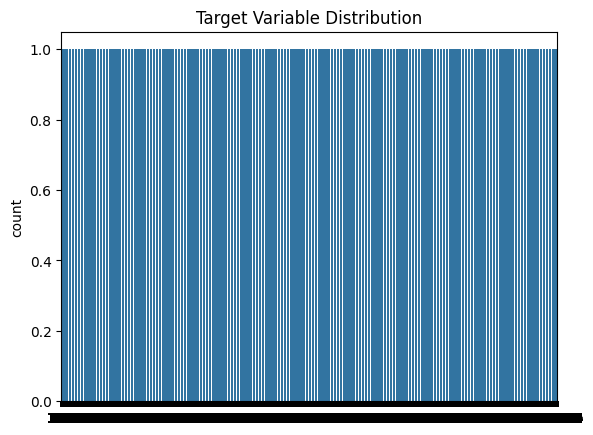

In [ ]:
import seaborn as sns # import seaborn as sns, This line imports the seaborn library and assigns it the alias 'sns'
import matplotlib.pyplot as plt # This line imports the pyplot module from matplotlib and assigns it the alias 'plt'


# Target variable distribution
sns.countplot(data['TARGET']) # Assuming 'data' is your DataFrame and 'TARGET' is the column name
plt.title('Target Variable Distribution') # Set the title of the plot
plt.show() # Display the plot

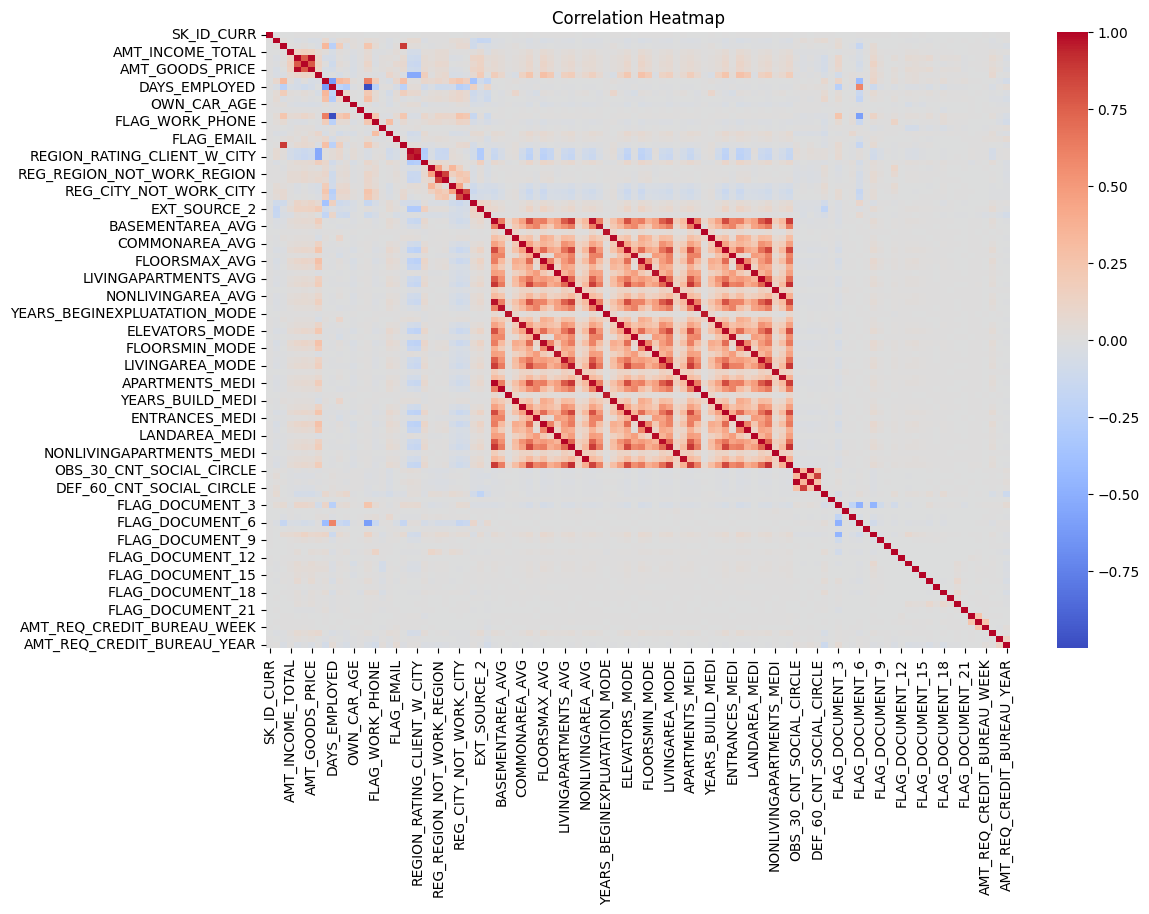

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric features for correlation calculation
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Dari correlation heatmap diatas menunjukan bahwa semua sebagian besar berwarna merah atau tanda area bahaya atau analisa sementara kebanyakan menggunakan sistem kredit dalam hal pembayaran

# DATA STORYTELING

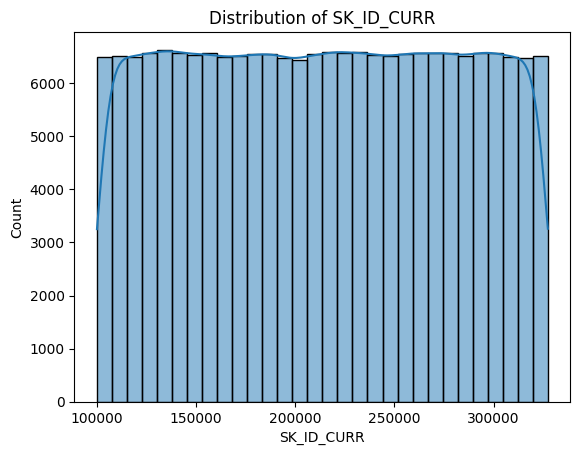

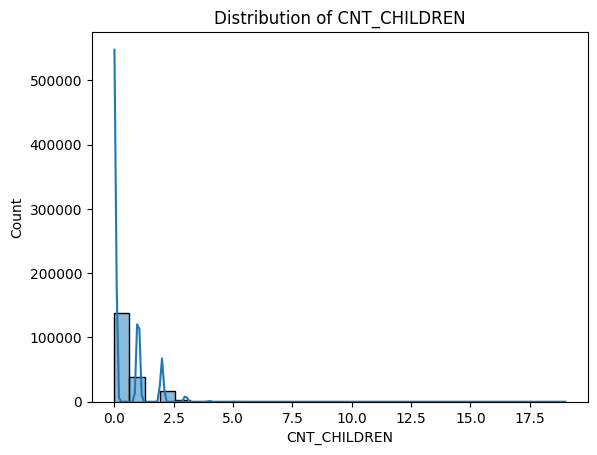

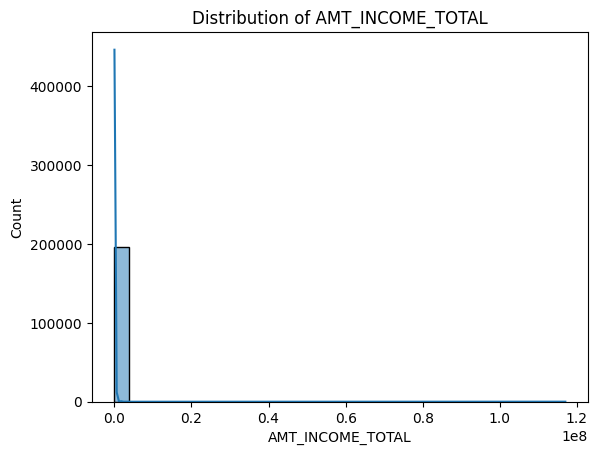

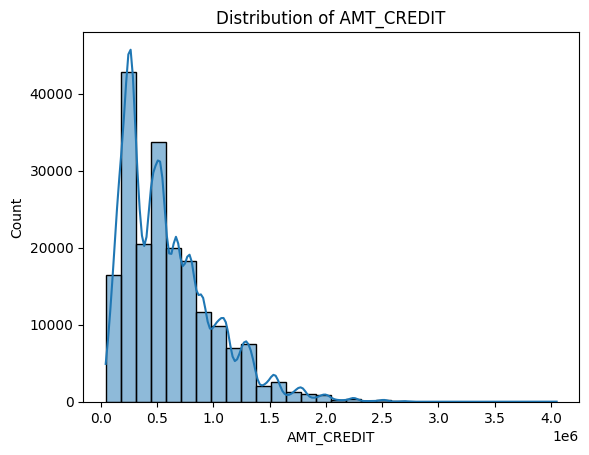

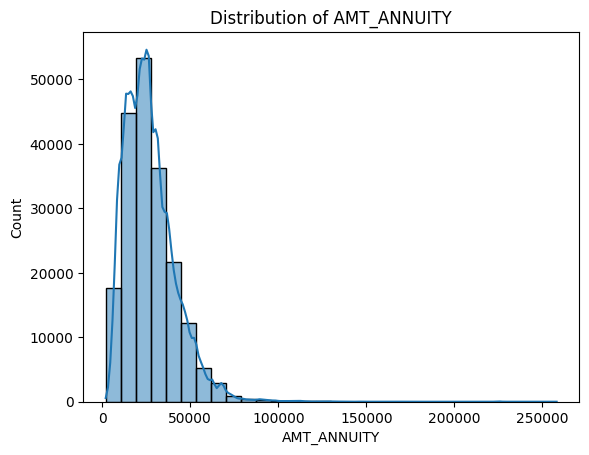

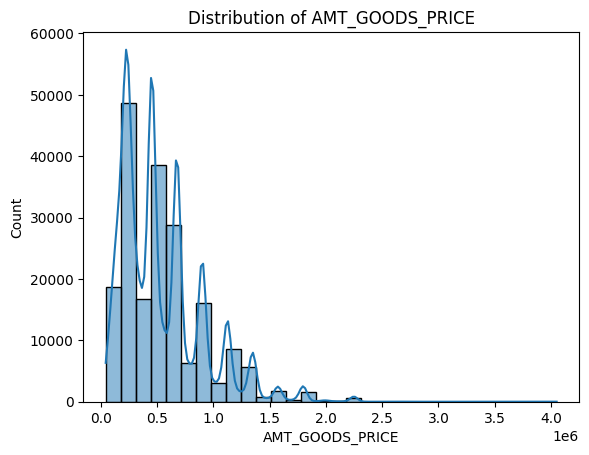

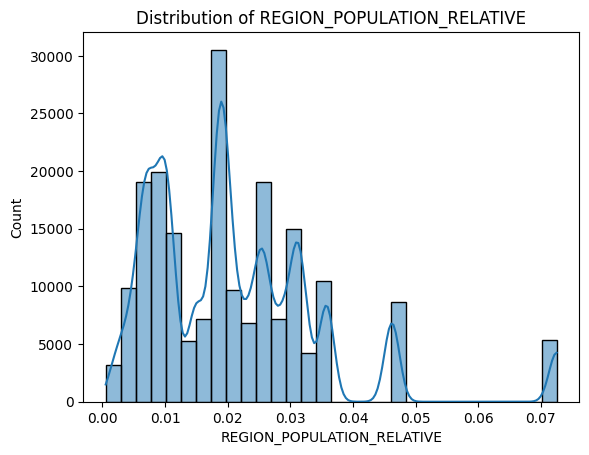

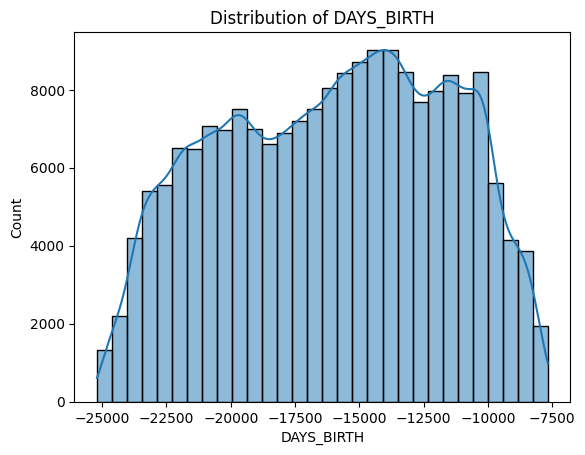

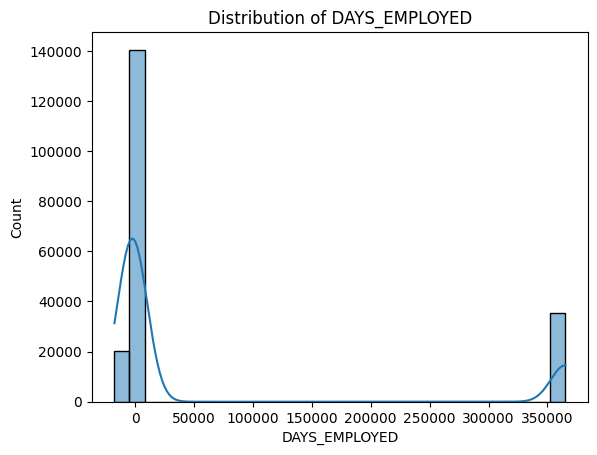

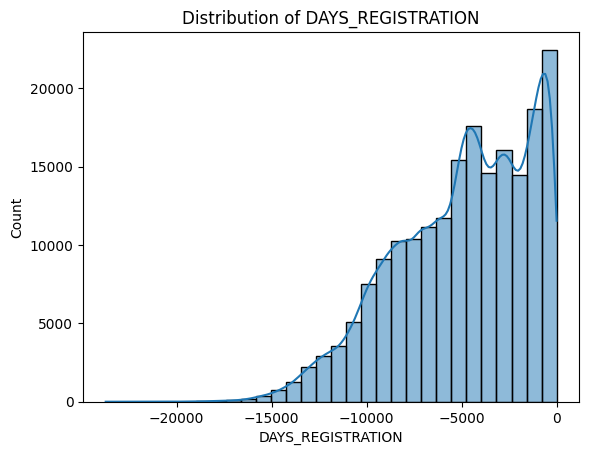

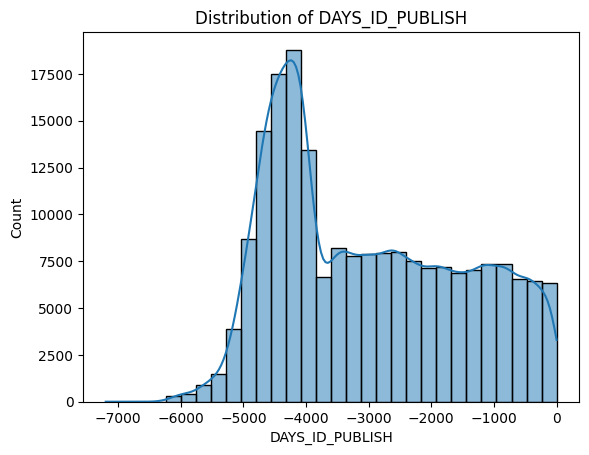

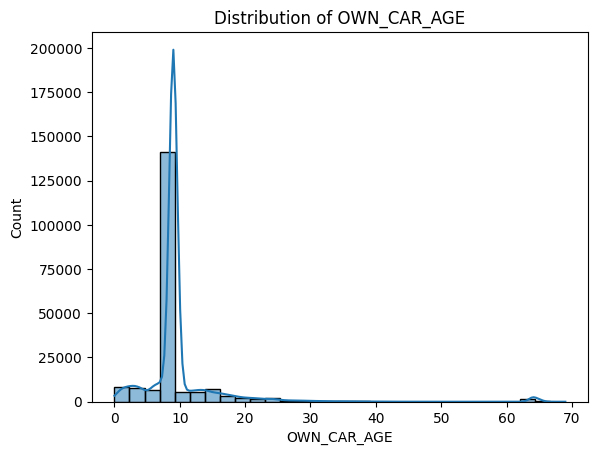

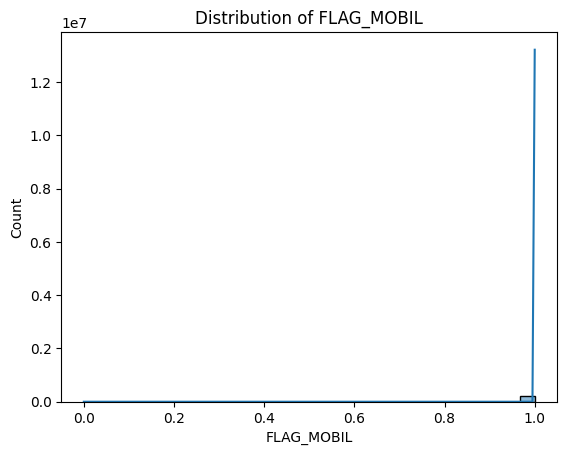

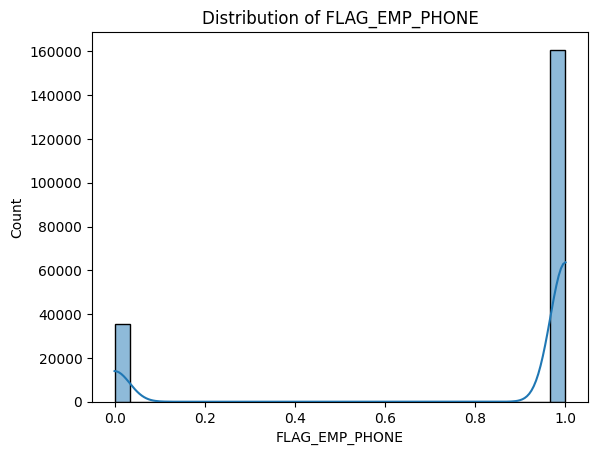

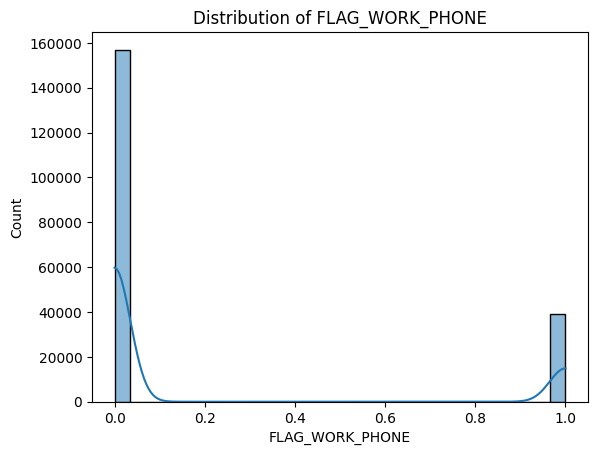

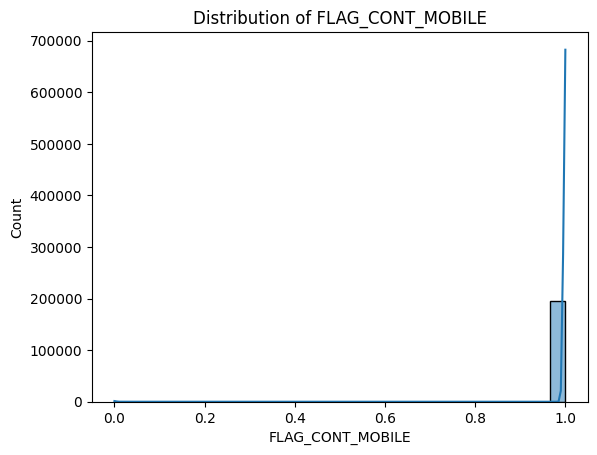

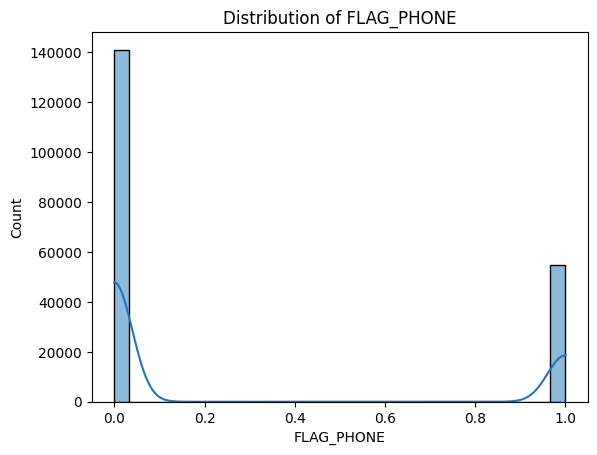

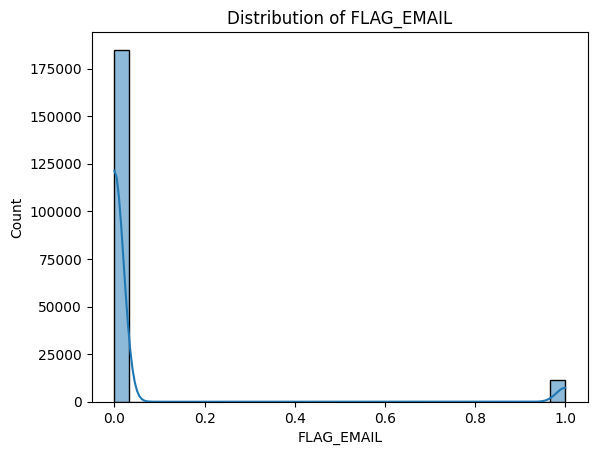

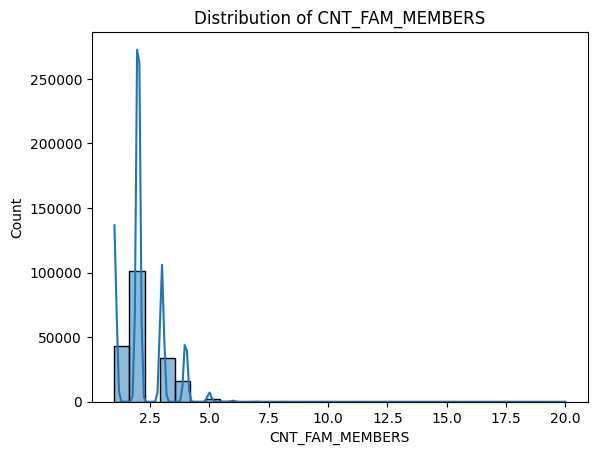

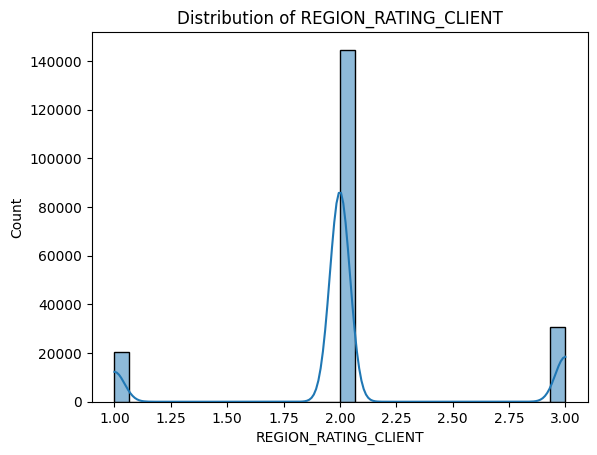

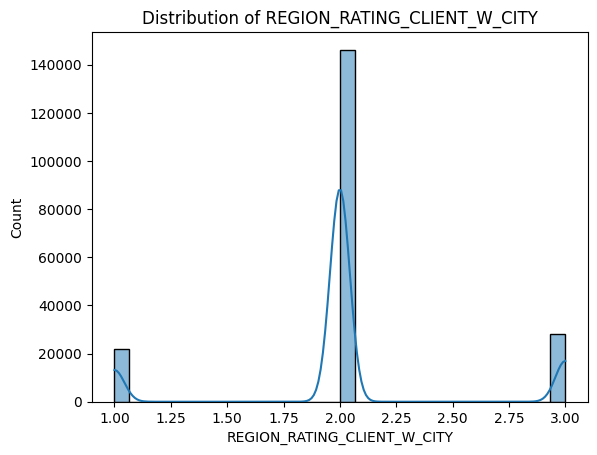

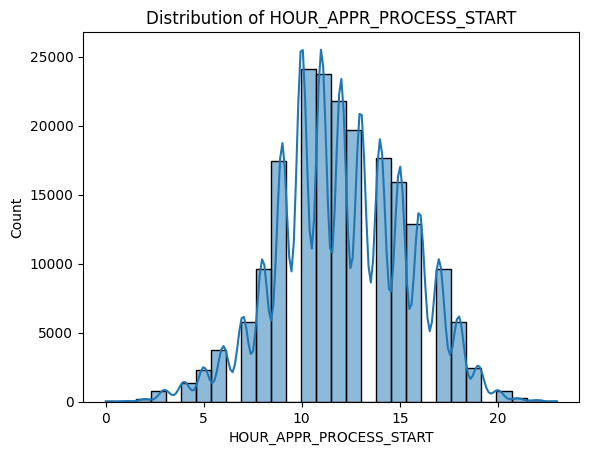

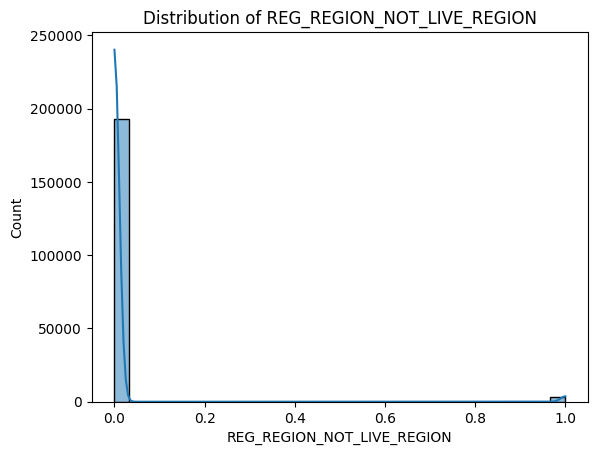

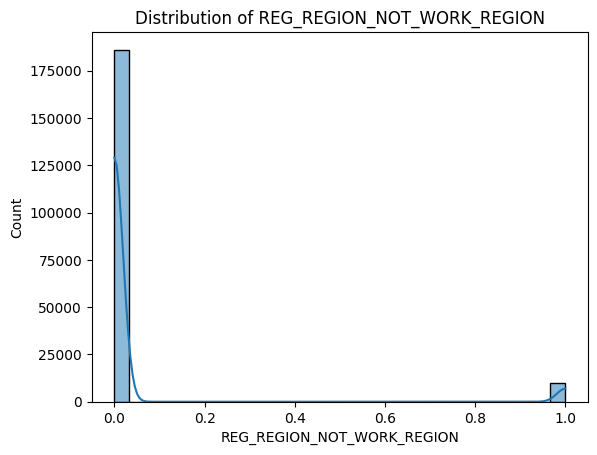

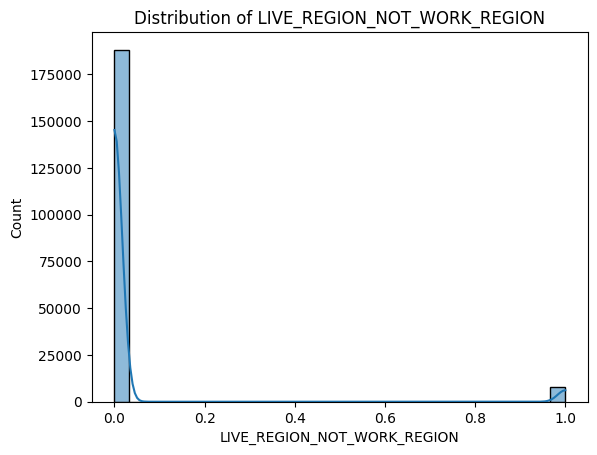

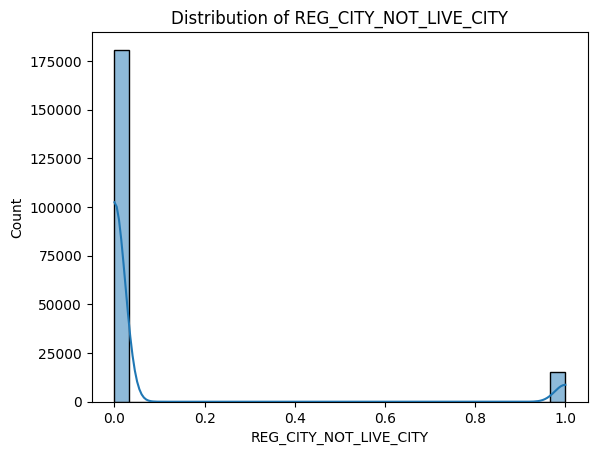

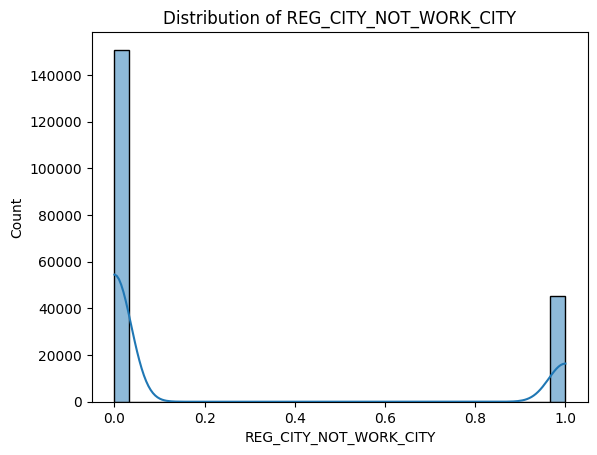

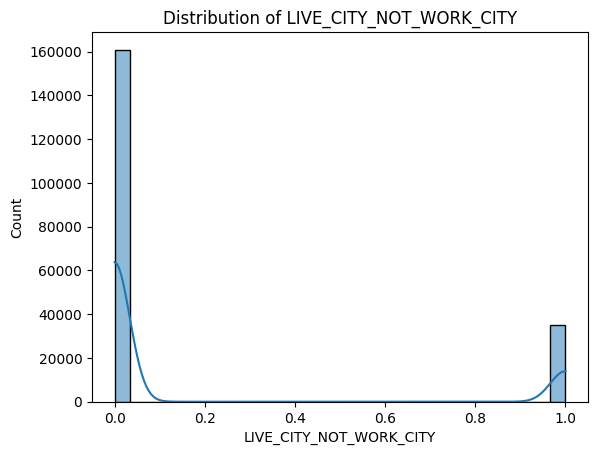

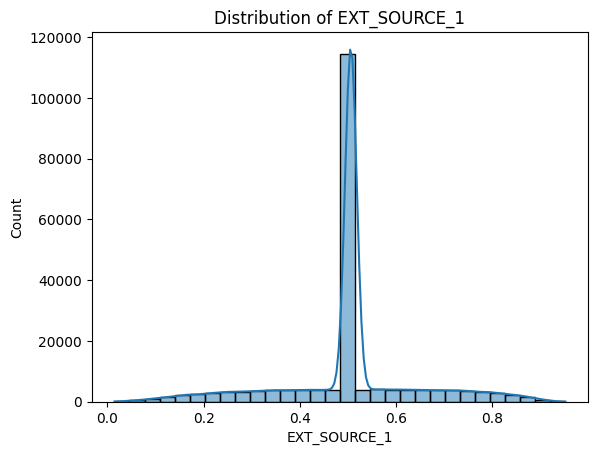

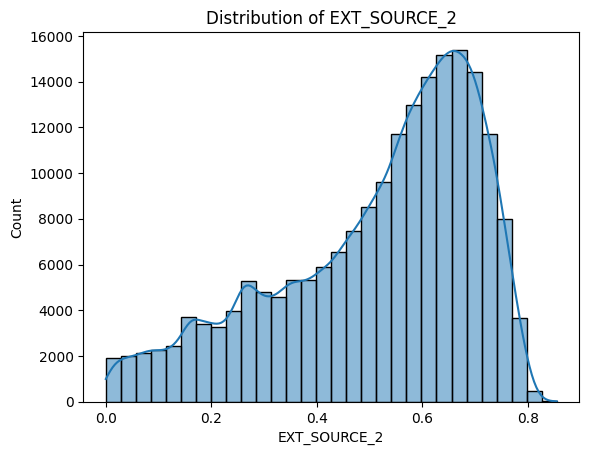

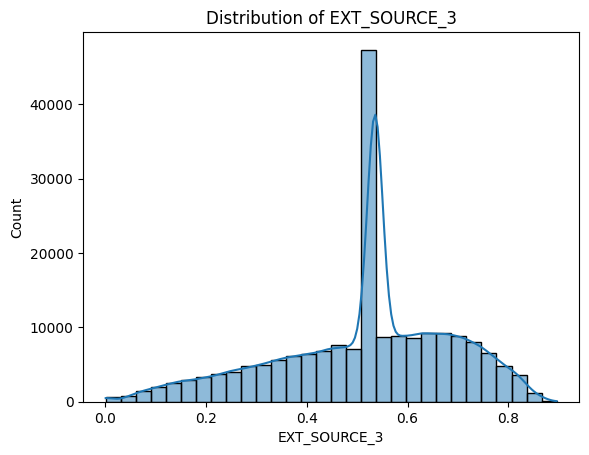

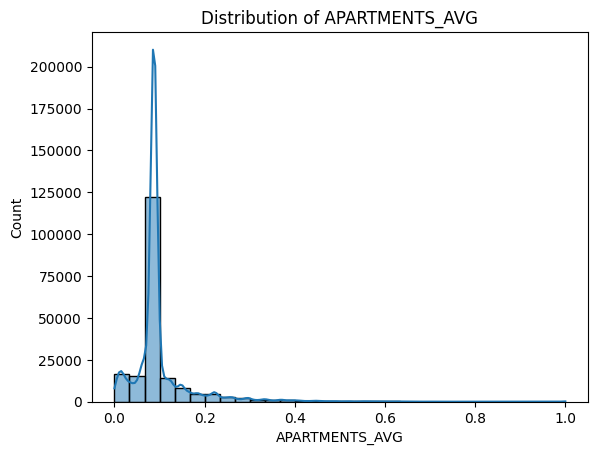

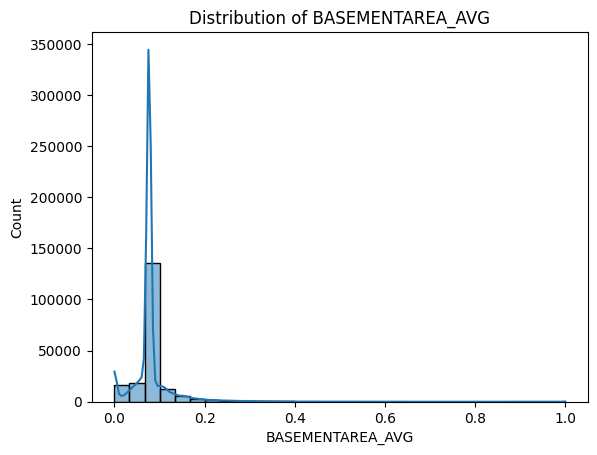

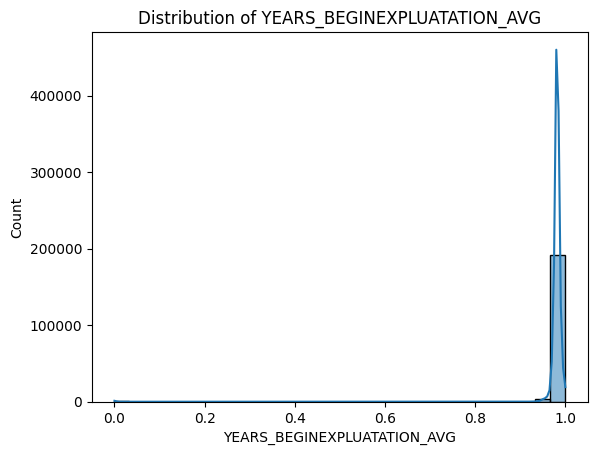

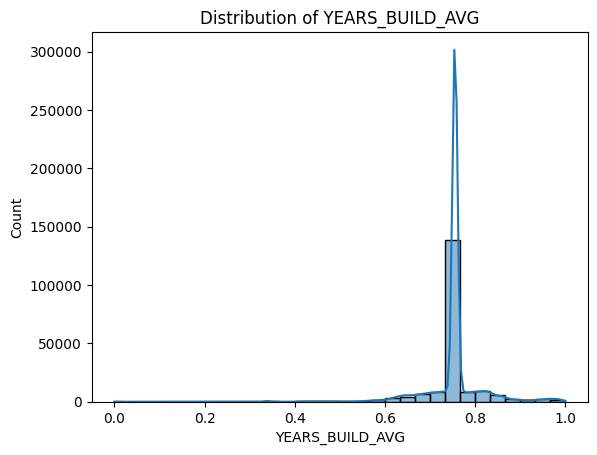

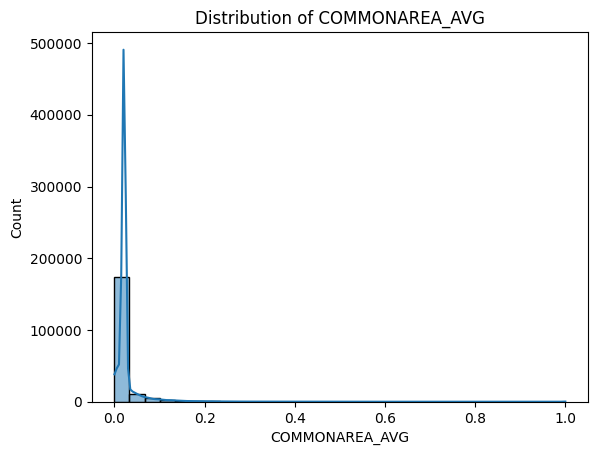

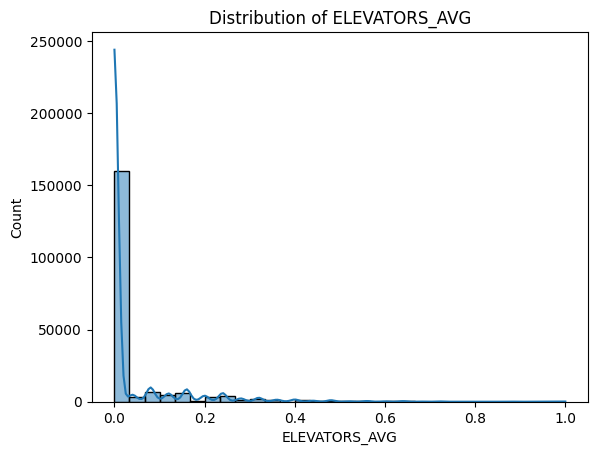

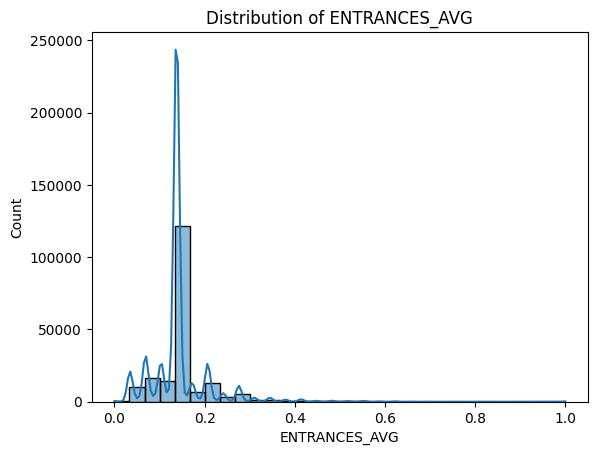

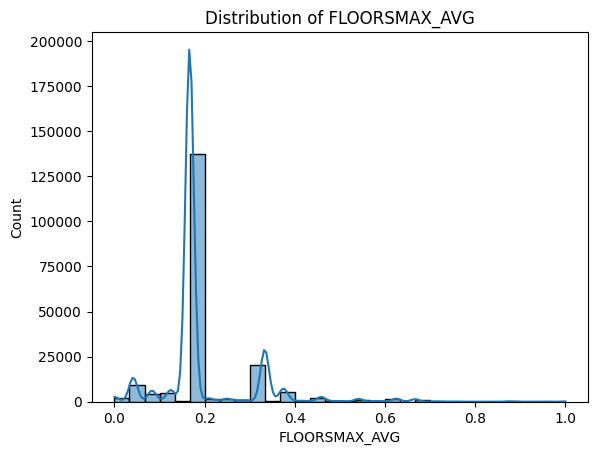

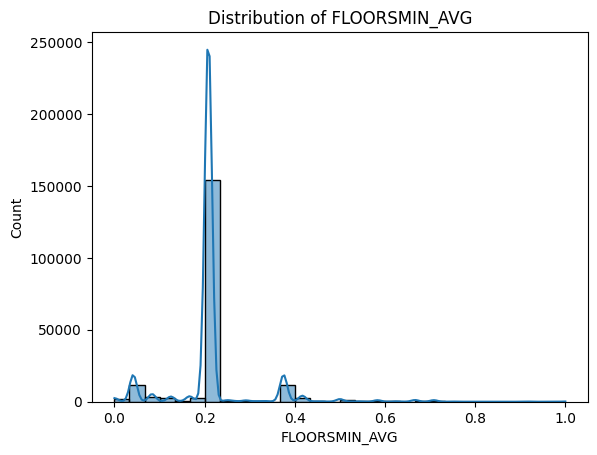

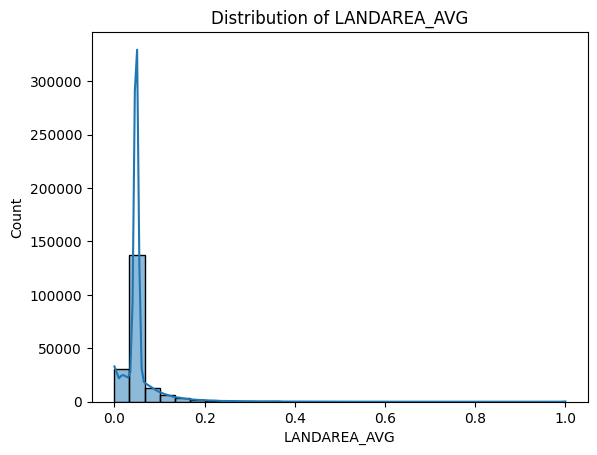

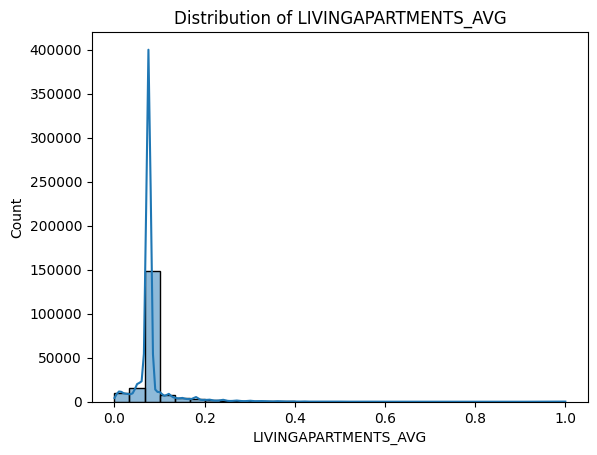

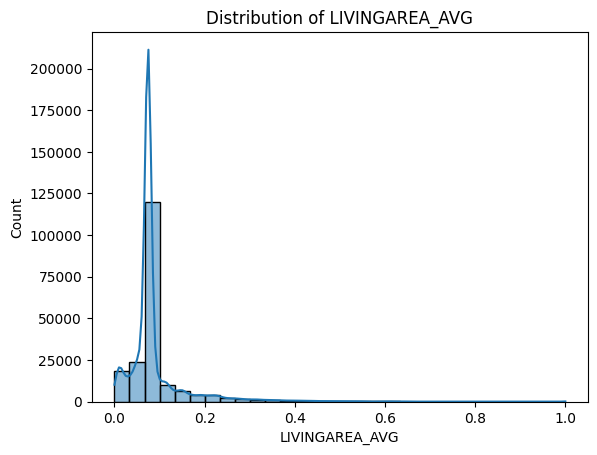

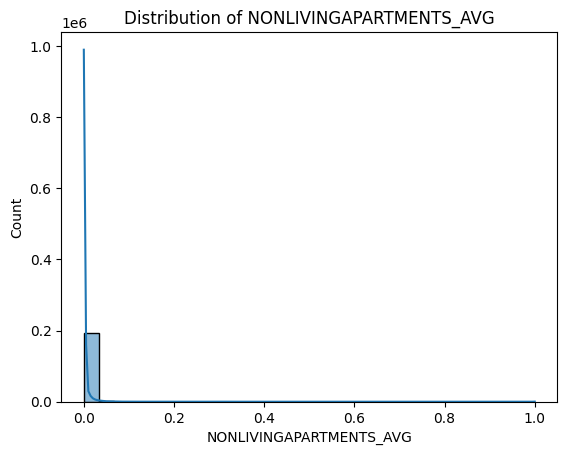

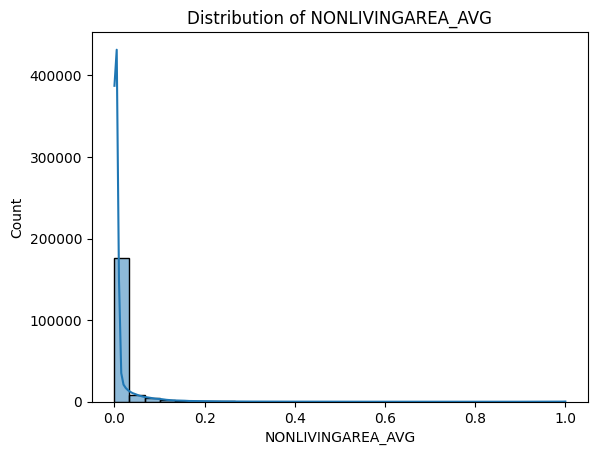

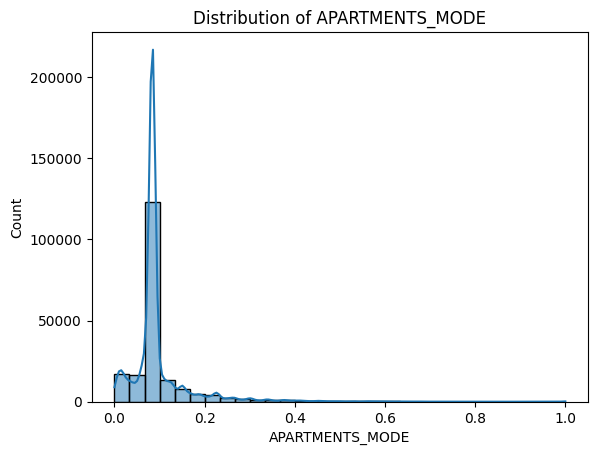

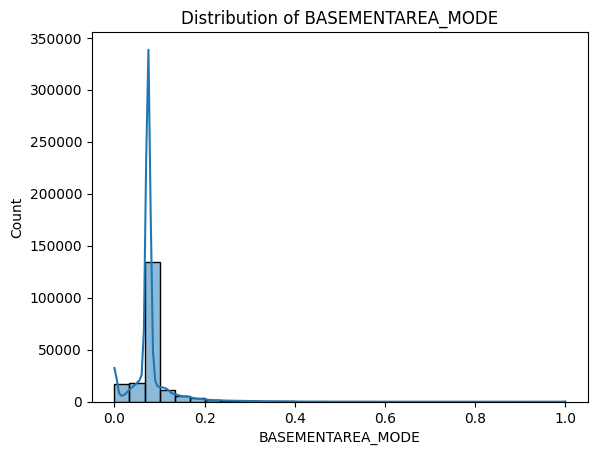

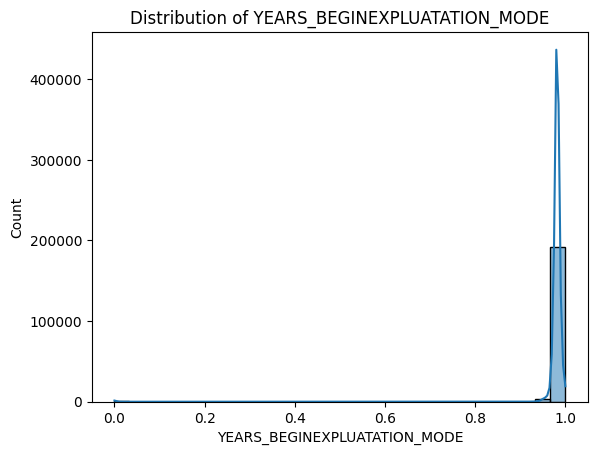

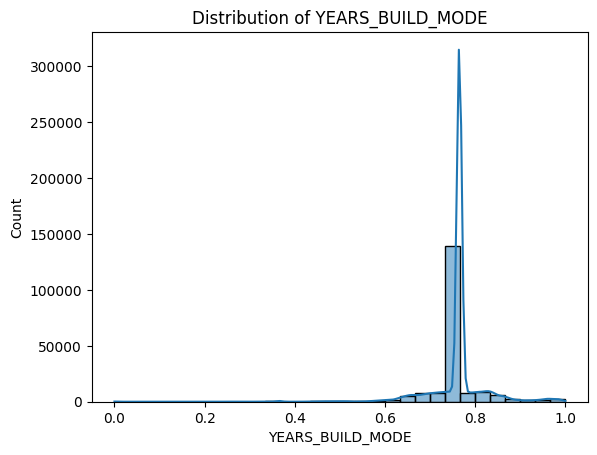

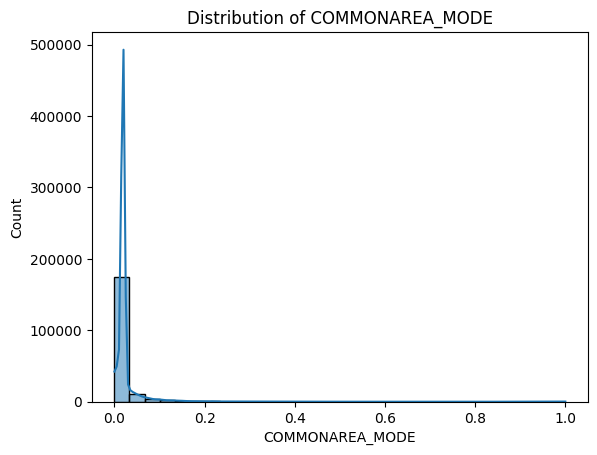

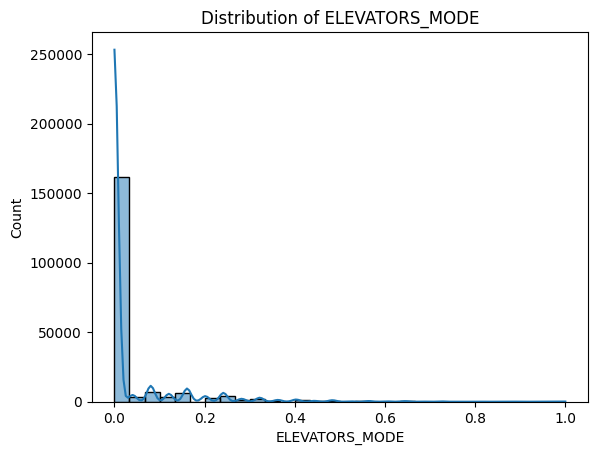

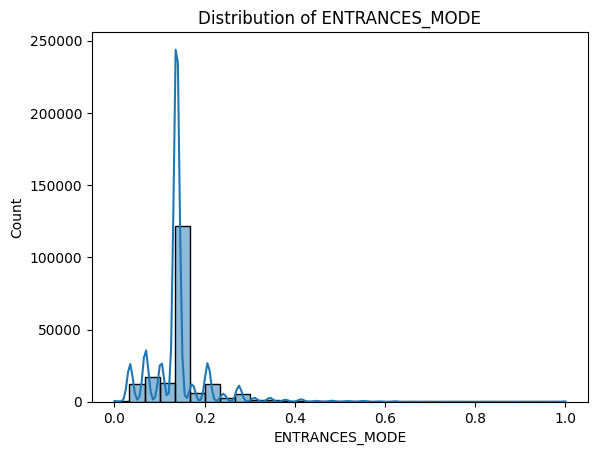

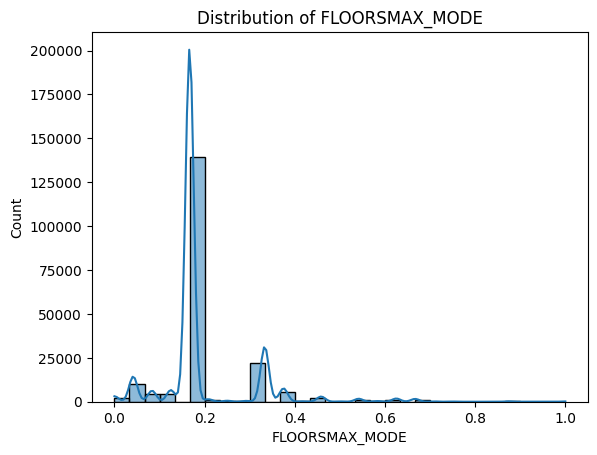

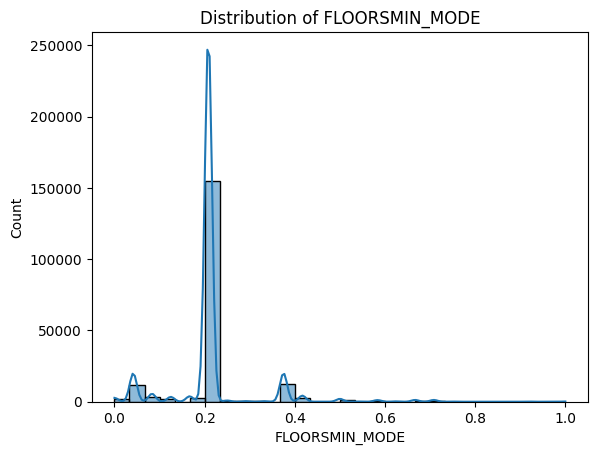

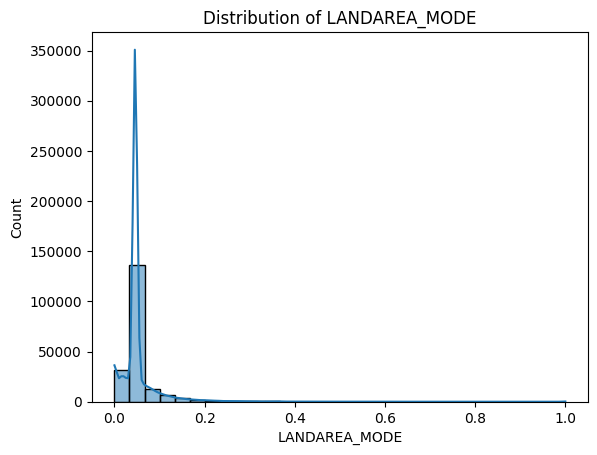

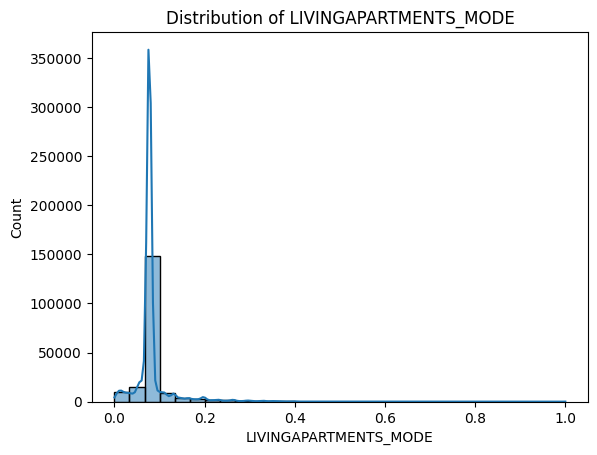

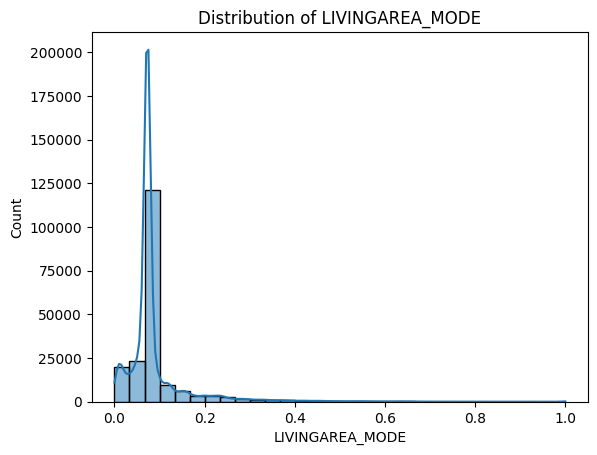

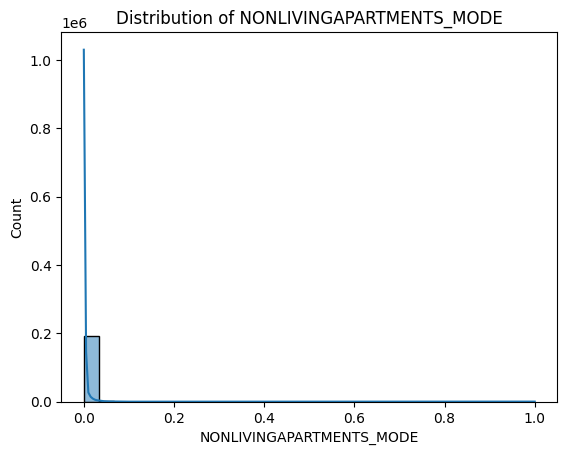

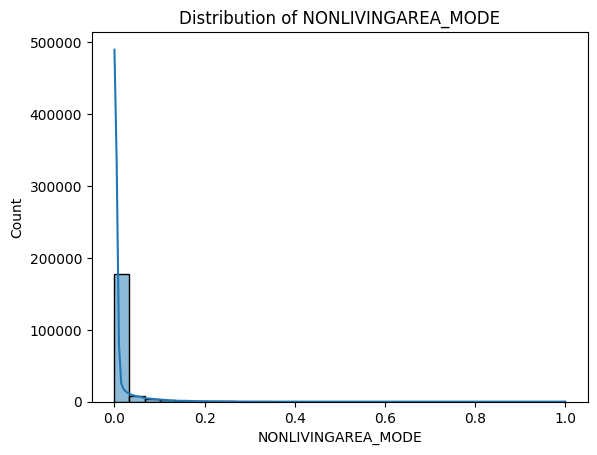

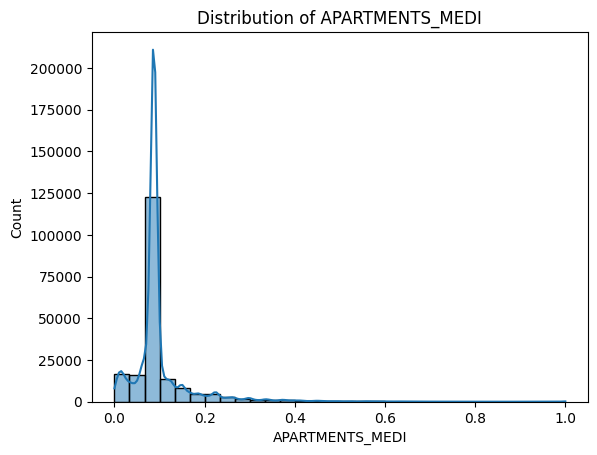

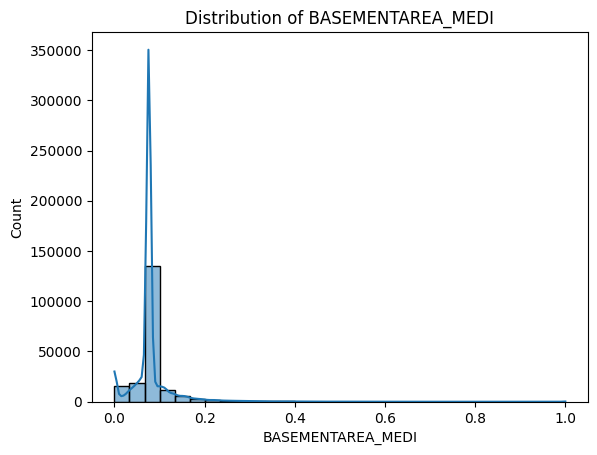

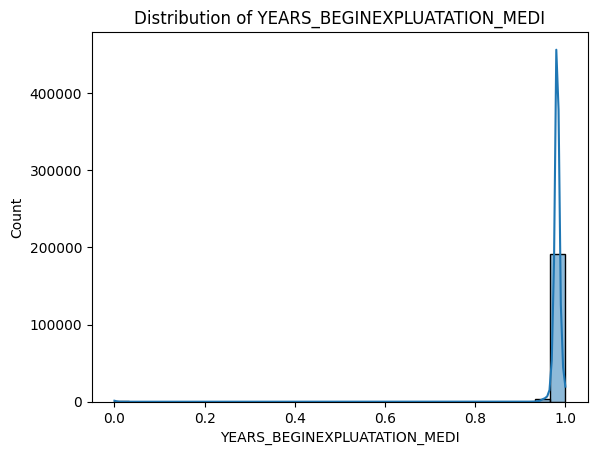

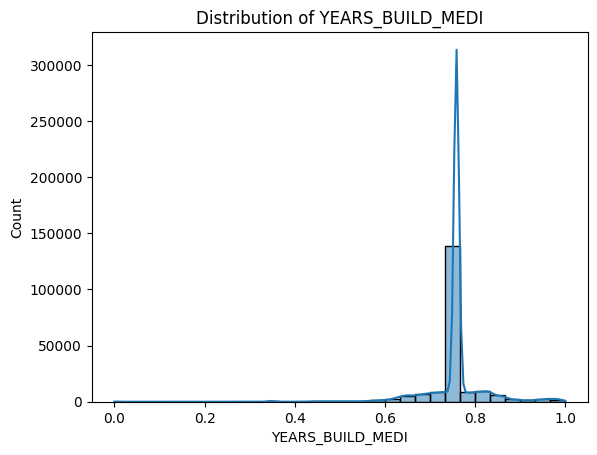

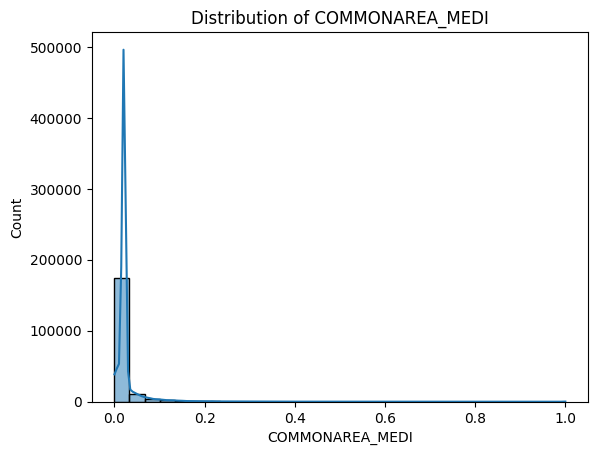

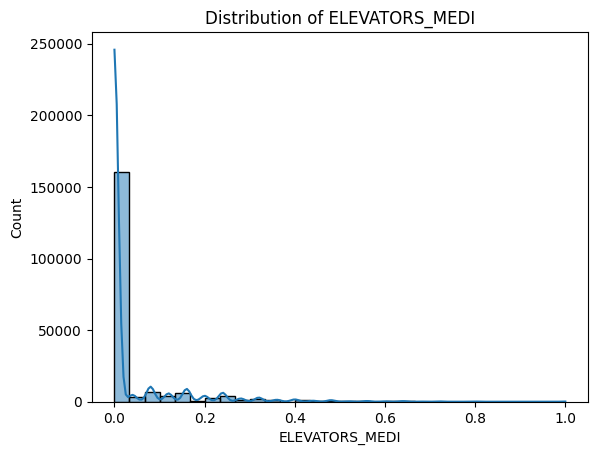

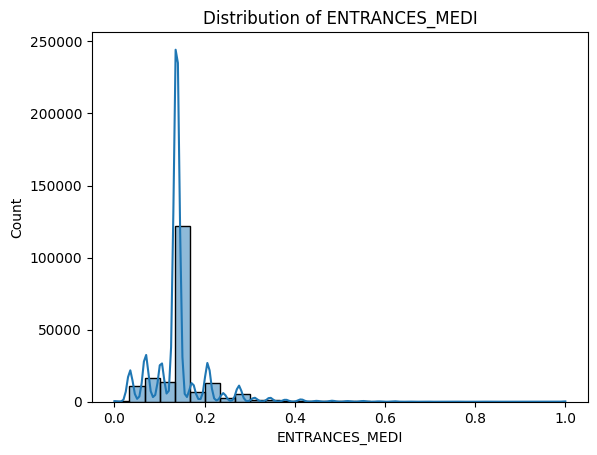

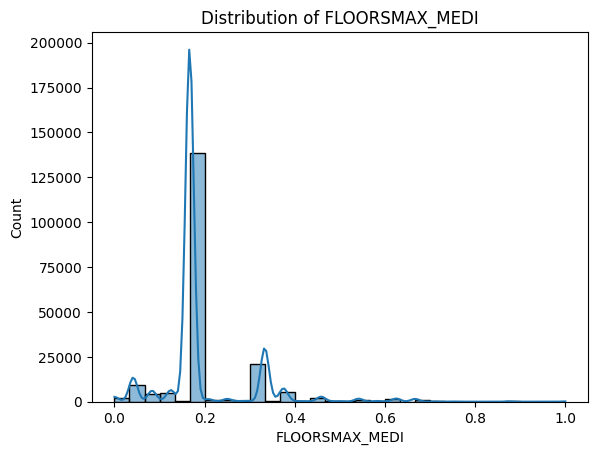

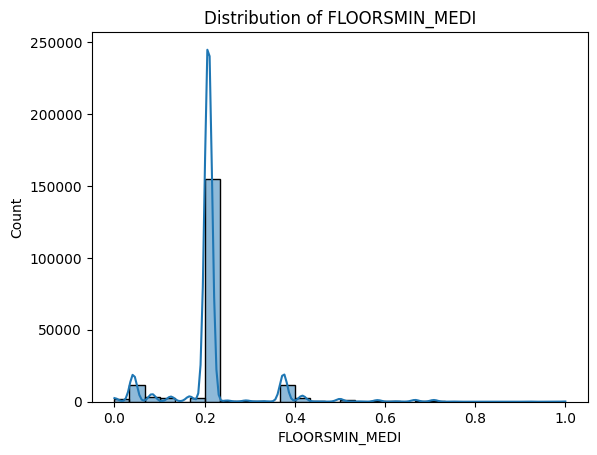

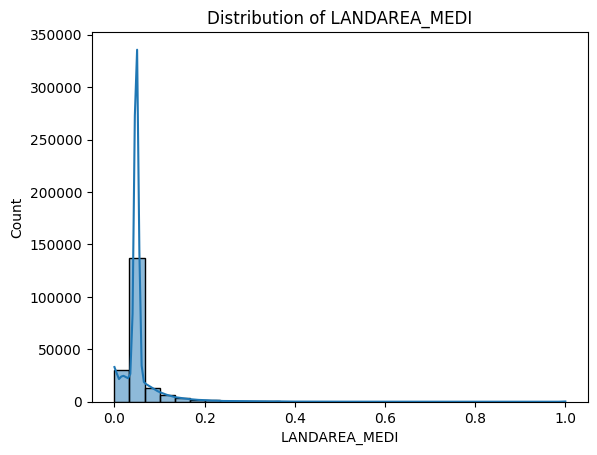

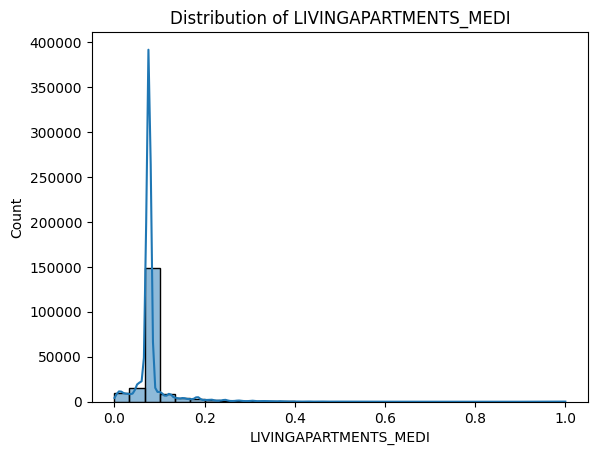

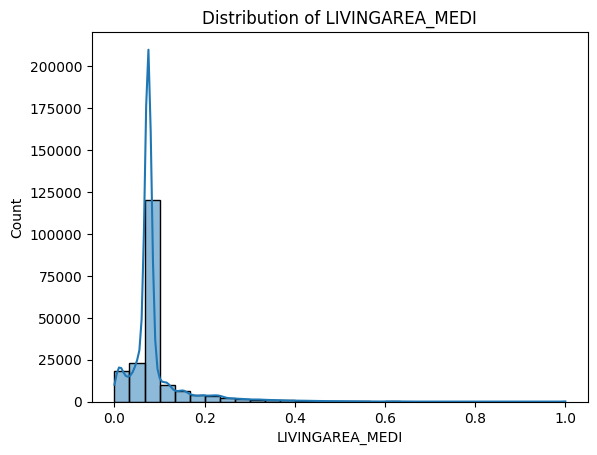

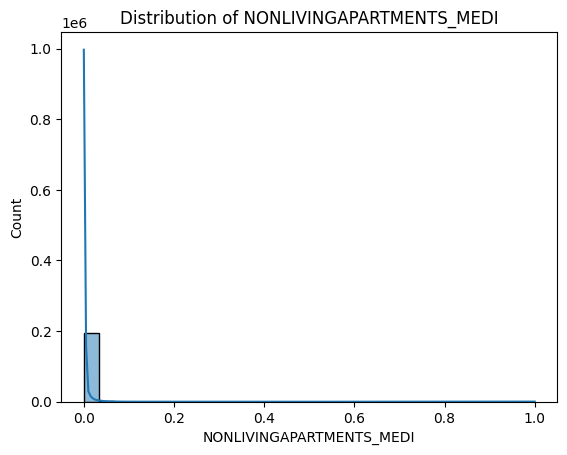

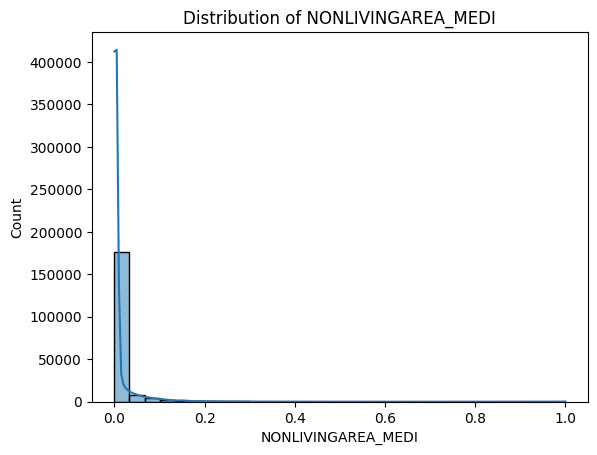

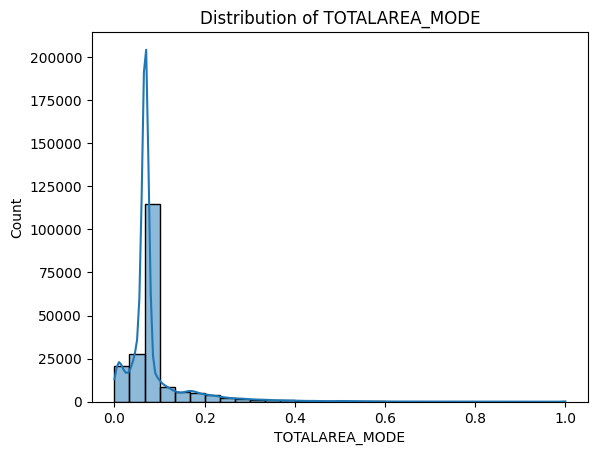

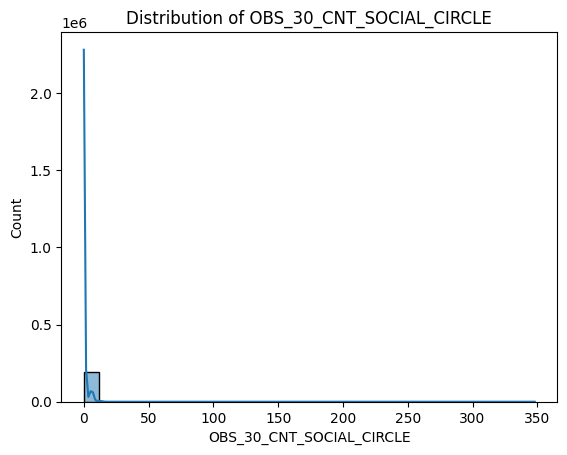

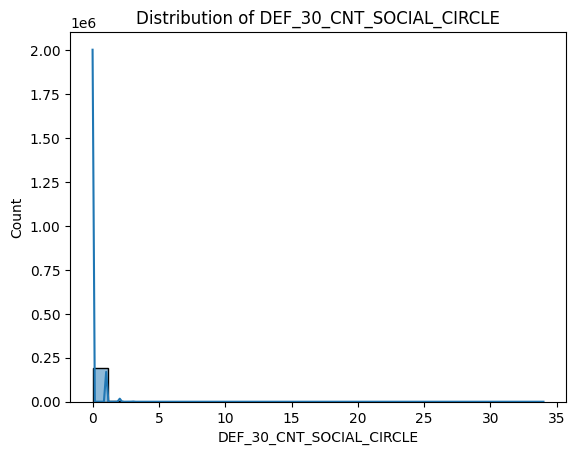

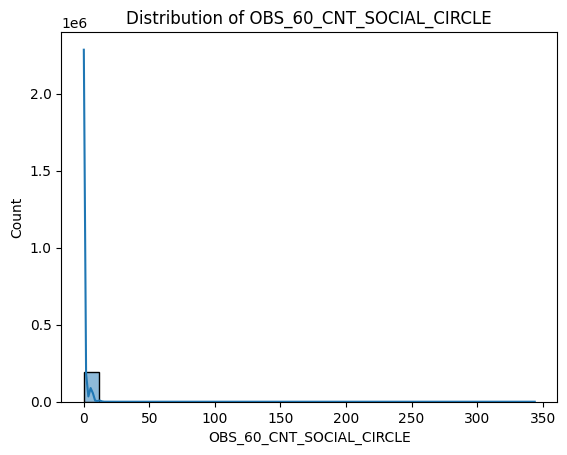

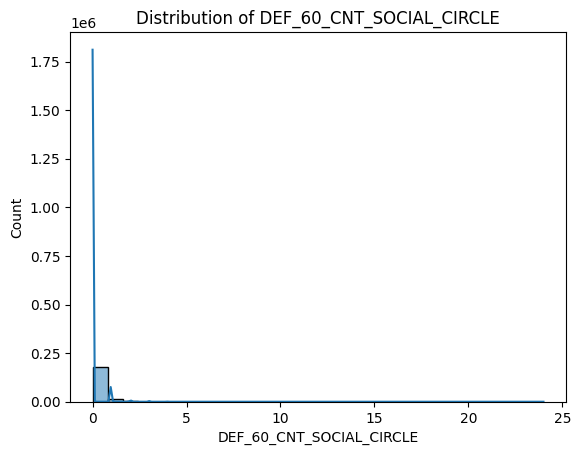

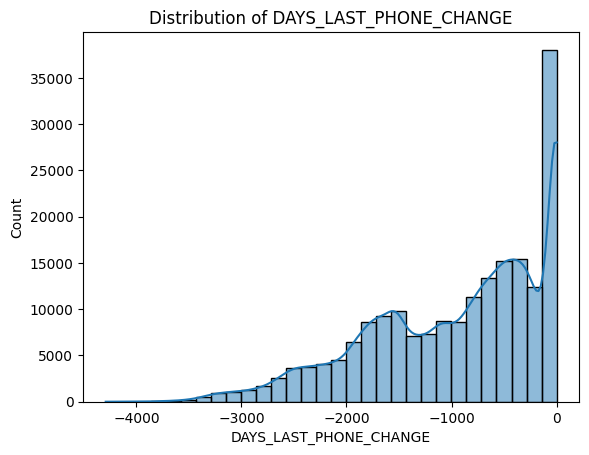

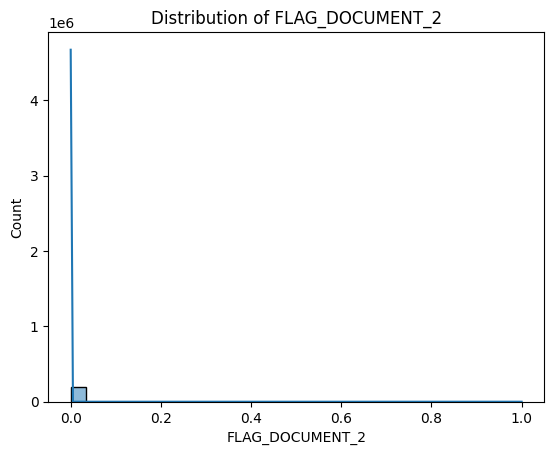

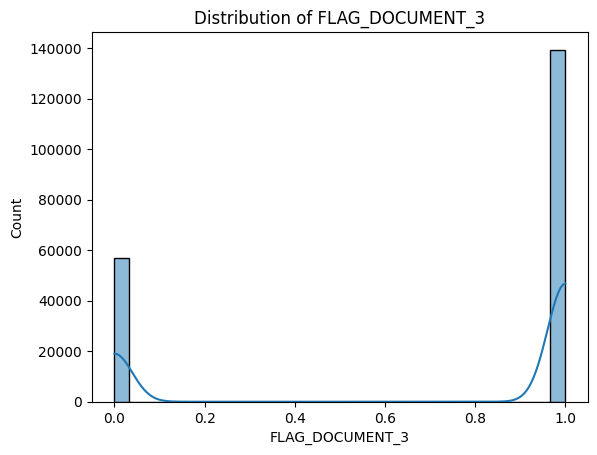

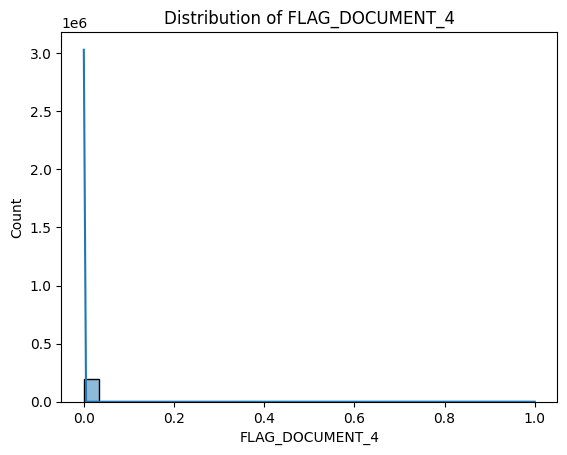

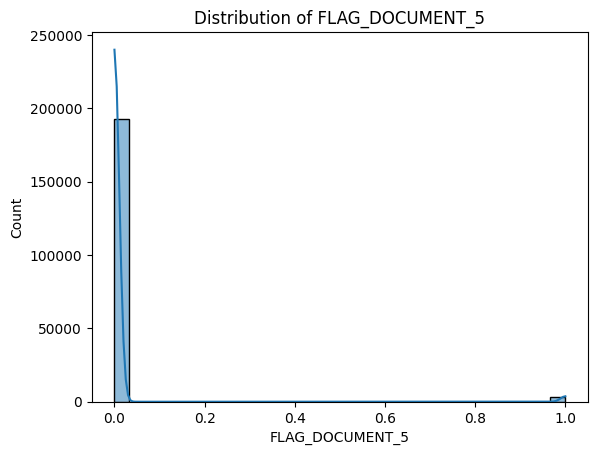

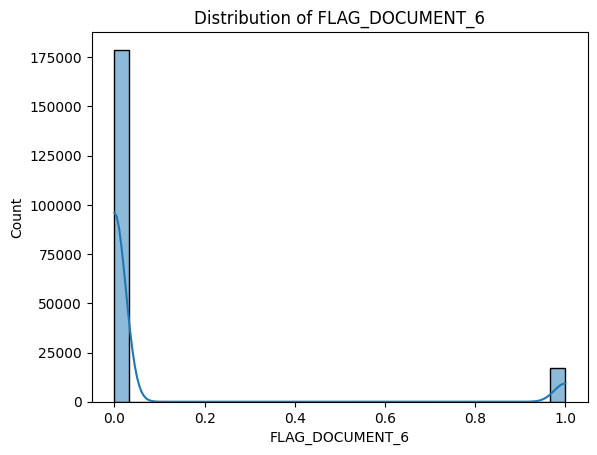

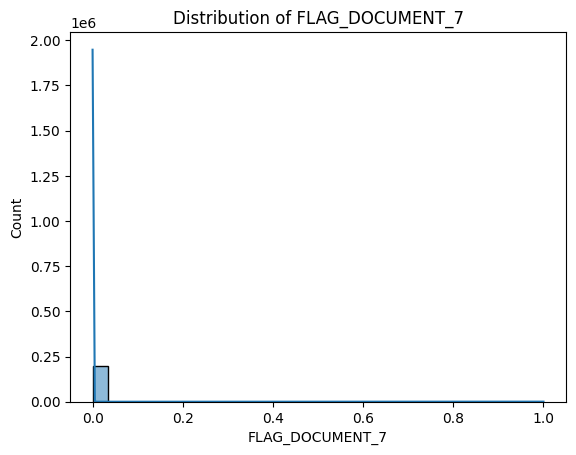

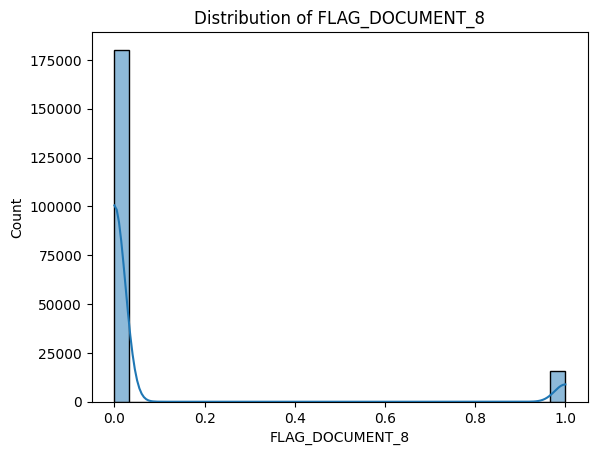

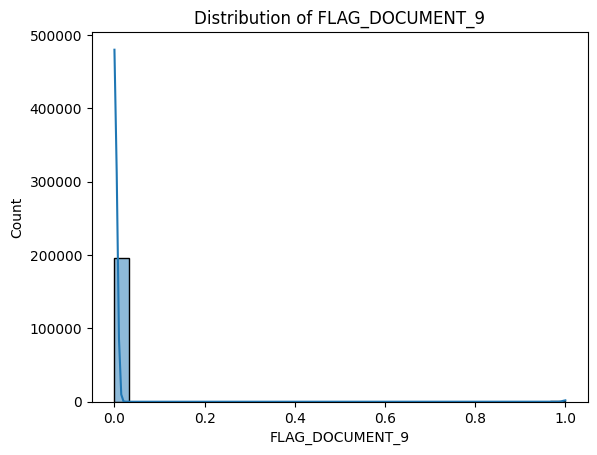

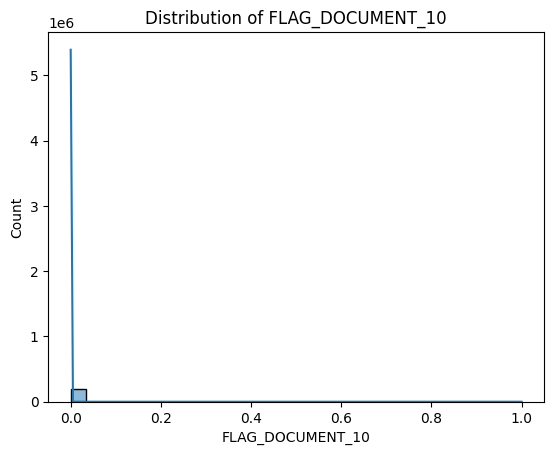

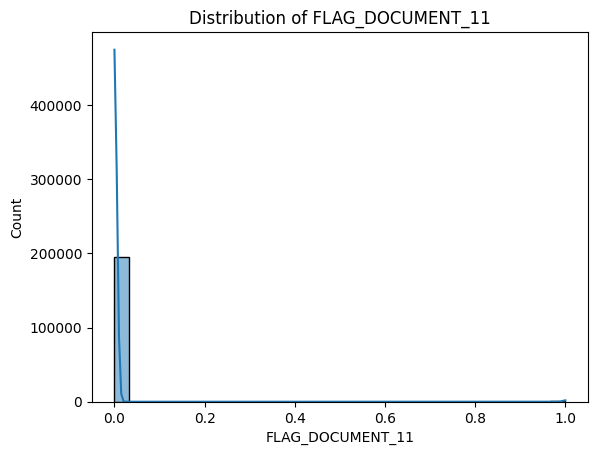

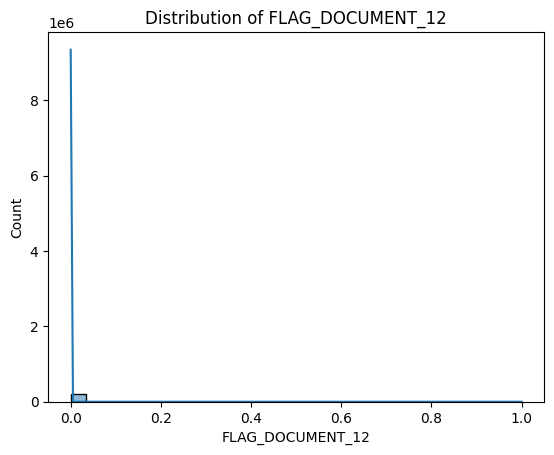

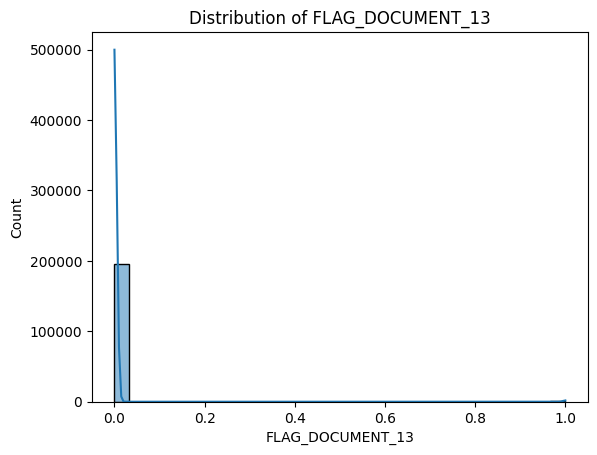

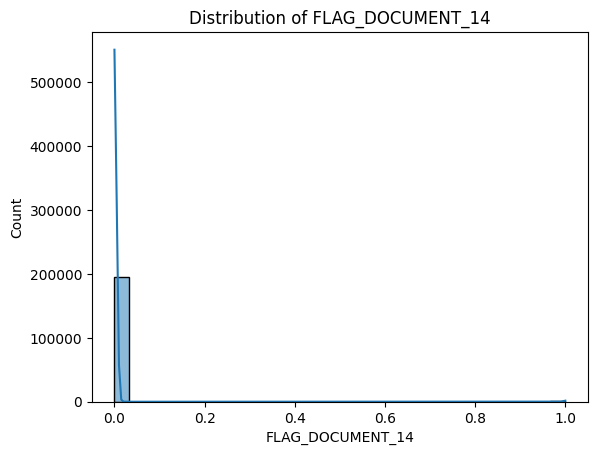

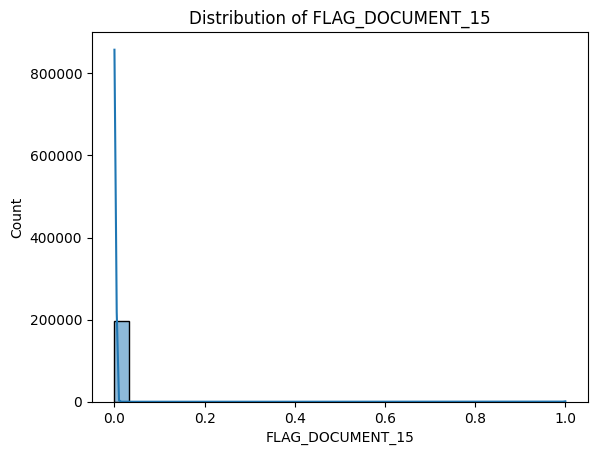

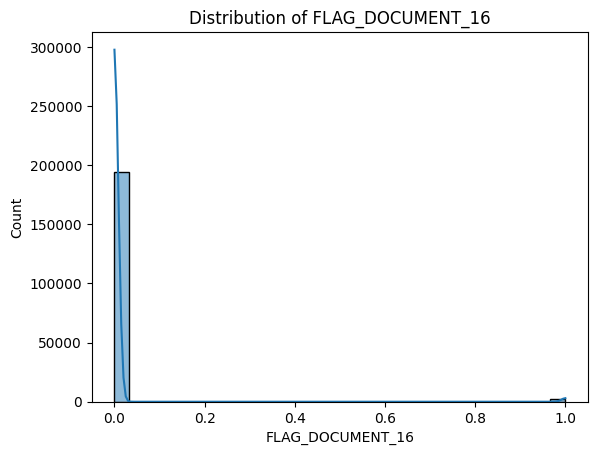

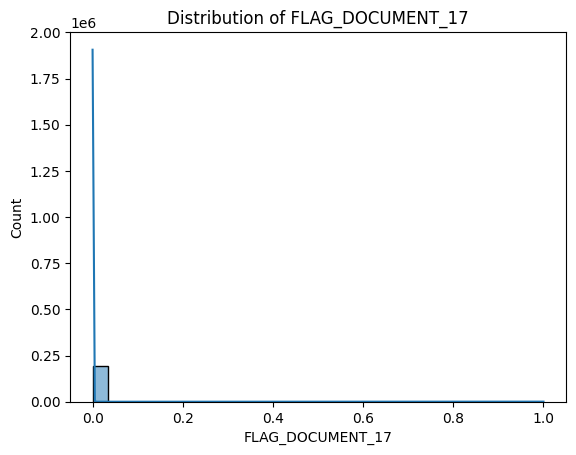

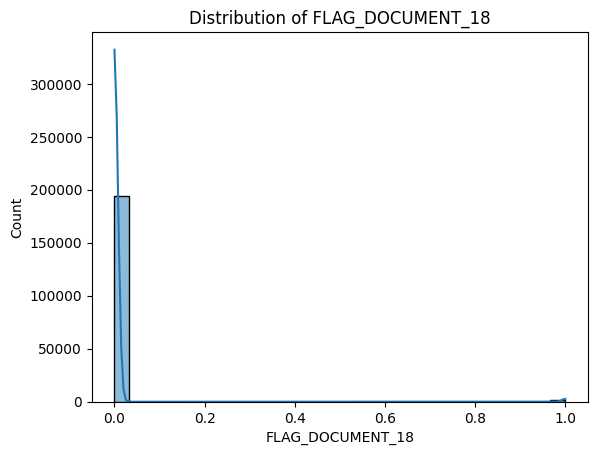

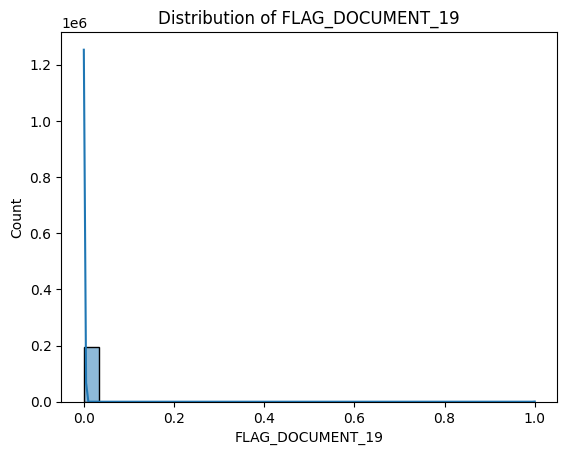

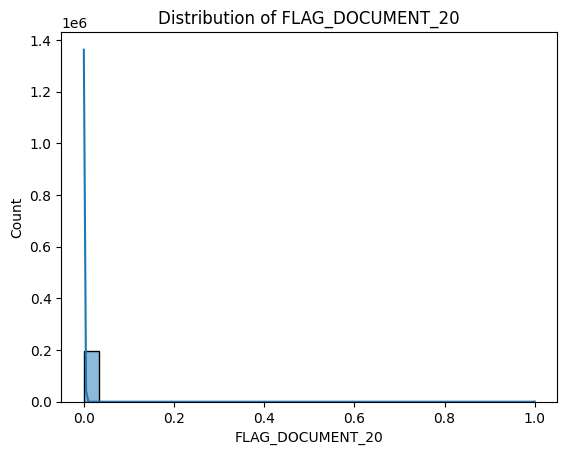

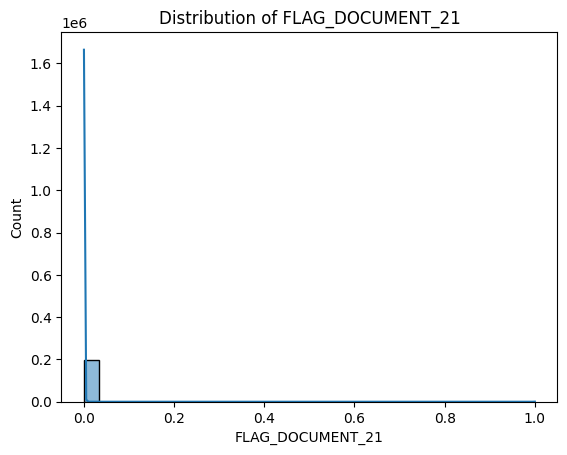

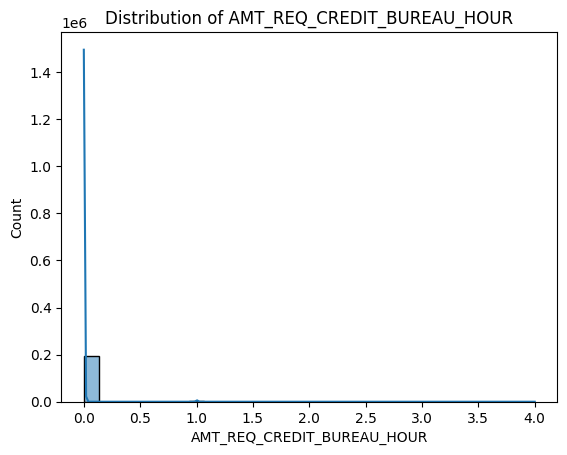

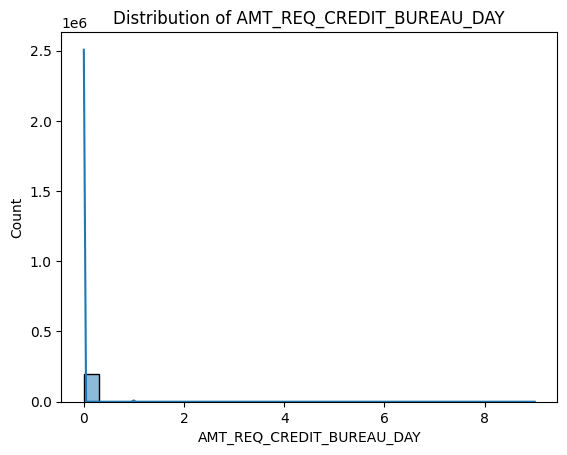

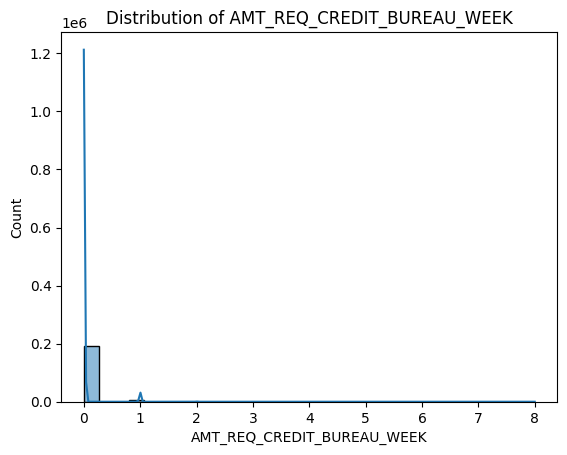

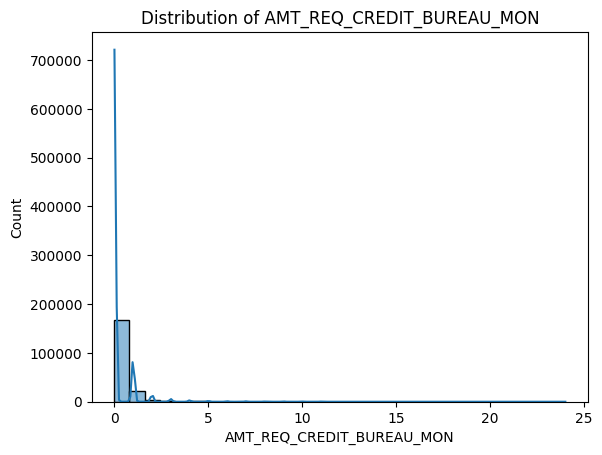

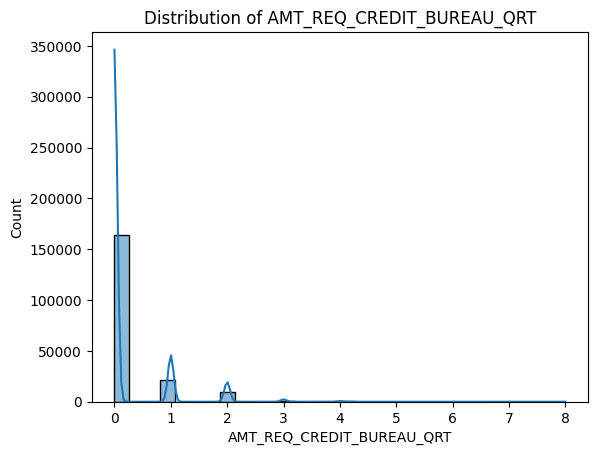

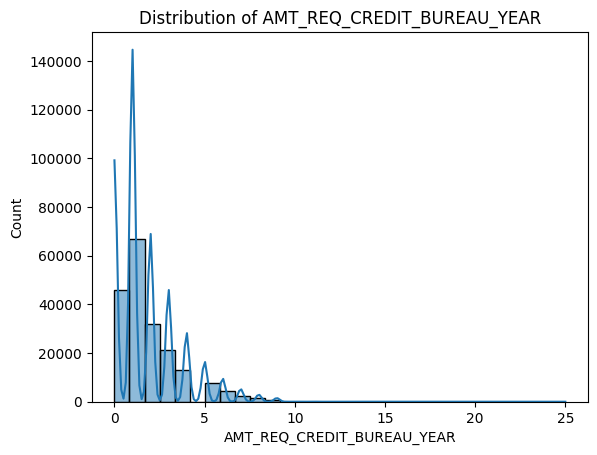

In [ ]:
# Step 3: Data Storytelling
# Visualize numeric features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if col != 'TARGET':
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset, handling potential errors
try:
    data = pd.read_csv('/content/application_train.csv', on_bad_lines='skip')  # Skip problematic lines
    # or
    # data = pd.read_csv('/content/application_train.csv', on_bad_lines='warn')  # Print warnings for problematic lines
except pd.errors.ParserError as e:
    print(f"Error loading data: {e}")
    print("Check the CSV file for inconsistent delimiters or missing values, especially around line 201.")
    # For further diagnosis, you can open the CSV file in a text editor and examine line 201.

# Overview of the dataset
print(data.info())
print(data.describe())

# ...

<class 'pandas.core.frame.DataFrame'>
Index: 204146 entries, 100002;1;Cash loans;M;N;Y;0;202500.0;406597.5;24700.5;351000.0;Unaccompanied;Working;Secondary / secondary special;Single / not married;House / apartment;0.018801;-9461;-637;-3648.0;-2120;;1;1;0;1;1;0;Laborers;1.0;2;2;WEDNESDAY;10;0;0;0;0;0;0;Business Entity Type 3;0.08303696739132256;0.2629485927471776;0.13937578009978951;0.0247;0.0369;0.9722;0.6192;0.0143;0.0;0.069;0.0833;0.125;0.0369;0.0202;0.019;0.0;0.0;0.0252;0.0383;0.9722;0.6341;0.0144;0.0;0.069;0.0833;0.125;0.0377;0.022;0.0198;0.0;0.0;0.025;0.0369;0.9722;0.6243;0.0144;0.0;0.069;0.0833;0.125;0.0375;0.0205;0.0193;0.0;0.0;reg oper account;block of flats;0.0149;Stone to 338300;0;Cash loans;F;N;Y;0;180000.0;301500.0;18445.5;301500.0;Unaccompanied;Working;Incomplete higher;Single / not married;House / apartment;0.010643000000000001;-8862;-716;-8468.0;-1526;;1;1;0;1;0;0;Laborers;1.0;2;2;WEDNESDAY;15;0;0;0;0;0;0;Business Entity Type 2;0.4360845363161653;0.5885936894845518;0.19

In [ ]:
import pandas as pd

# Load data, specifying the delimiter and error handling
try:
    df = pd.read_csv(
        '/content/application_train.csv',
        sep=',',  # Explicitly set the delimiter (usually comma)
        on_bad_lines='skip',  # Skip lines with errors or
        # on_bad_lines='warn'  # Print warnings for problematic lines
    )
    print("Data loaded successfully.")
except pd.errors.ParserError as e:
    print(f"Error loading data: {e}")
    print("Check the CSV file for inconsistent delimiters or missing values, especially around line 201.")
    # For further diagnosis, you can open the CSV file in a text editor and examine line 201.

df.head(3)

Data loaded successfully.


SK_ID_CURR;TARGET;NAME_CONTRACT_TYPE;CODE_GENDER;FLAG_OWN_CAR;FLAG_OWN_REALTY;CNT_CHILDREN;AMT_INCOME_TOTAL;AMT_CREDIT;AMT_ANNUITY;AMT_GOODS_PRICE;NAME_TYPE_SUITE;NAME_INCOME_TYPE;NAME_EDUCATION_TYPE;NAME_FAMILY_STATUS;NAME_HOUSING_TYPE;REGION_POPULATION_RELATIVE;DAYS_BIRTH;DAYS_EMPLOYED;DAYS_REGISTRATION;DAYS_ID_PUBLISH;OWN_CAR_AGE;FLAG_MOBIL;FLAG_EMP_PHONE;FLAG_WORK_PHONE;FLAG_CONT_MOBILE;FLAG_PHONE;FLAG_EMAIL;OCCUPATION_TYPE;CNT_FAM_MEMBERS;REGION_RATING_CLIENT;REGION_RATING_CLIENT_W_CITY;WEEKDAY_APPR_PROCESS_START;HOUR_APPR_PROCESS_START;REG_REGION_NOT_LIVE_REGION;REG_REGION_NOT_WORK_REGION;LIVE_REGION_NOT_WORK_REGION;REG_CITY_NOT_LIVE_CITY;REG_CITY_NOT_WORK_CITY;LIVE_CITY_NOT_WORK_CITY;ORGANIZATION_TYPE;EXT_SOURCE_1;EXT_SOURCE_2;EXT_SOURCE_3;APARTMENTS_AVG;BASEMENTAREA_AVG;YEARS_BEGINEXPLUATATION_AVG;YEARS_BUILD_AVG;COMMONAREA_AVG;ELEVATORS_AVG;ENTRANCES_AVG;FLOORSMAX_AVG;FLOORSMIN_AVG;LANDAREA_AVG;LIVINGAPARTMENTS_AVG;LIVINGAREA_AVG;NONLIVINGAPARTMENTS_AVG;NONLIVINGAREA_AVG;APARTMENTS_MODE;BASEMENTAREA_MODE;YEARS_BEGINEXPLUATATION_MODE;YEARS_BUILD_MODE;COMMONAREA_MODE;ELEVATORS_MODE;ENTRANCES_MODE;FLOORSMAX_MODE;FLOORSMIN_MODE;LANDAREA_MODE;LIVINGAPARTMENTS_MODE;LIVINGAREA_MODE;NONLIVINGAPARTMENTS_MODE;NONLIVINGAREA_MODE;APARTMENTS_MEDI;BASEMENTAREA_MEDI;YEARS_BEGINEXPLUATATION_MEDI;YEARS_BUILD_MEDI;COMMONAREA_MEDI;ELEVATORS_MEDI;ENTRANCES_MEDI;FLOORSMAX_MEDI;FLOORSMIN_MEDI;LANDAREA_MEDI;LIVINGAPARTMENTS_MEDI;LIVINGAREA_MEDI;NONLIVINGAPARTMENTS_MEDI;NONLIVINGAREA_MEDI;FONDKAPREMONT_MODE;HOUSETYPE_MODE;TOTALAREA_MODE;WALLSMATERIAL_MODE;EMERGENCYSTATE_MODE;OBS_30_CNT_SOCIAL_CIRCLE;DEF_30_CNT_SOCIAL_CIRCLE;OBS_60_CNT_SOCIAL_CIRCLE;DEF_60_CNT_SOCIAL_CIRCLE;DAYS_LAST_PHONE_CHANGE;FLAG_DOCUMENT_2;FLAG_DOCUMENT_3;FLAG_DOCUMENT_4;FLAG_DOCUMENT_5;FLAG_DOCUMENT_6;FLAG_DOCUMENT_7;FLAG_DOCUMENT_8;FLAG_DOCUMENT_9;FLAG_DOCUMENT_10;FLAG_DOCUMENT_11;FLAG_DOCUMENT_12;FLAG_DOCUMENT_13;FLAG_DOCUMENT_14;FLAG_DOCUMENT_15;FLAG_DOCUMENT_16;FLAG_DOCUMENT_17;FLAG_DOCUMENT_18;FLAG_DOCUMENT_19;FLAG_DOCUMENT_20;FLAG_DOCUMENT_21;AMT_REQ_CREDIT_BUREAU_HOUR;AMT_REQ_CREDIT_BUREAU_DAY;AMT_REQ_CREDIT_BUREAU_WEEK;AMT_REQ_CREDIT_BUREAU_MON;AMT_REQ_CREDIT_BUREAU_QRT;AMT_REQ_CREDIT_BUREAU_YEAR
100002;1;Cash loans;M;N;Y;0;202500.0;406597.5;2...   brick;No;2.0;2.0;2.0;2.0;-1134.0;0;1;0;0;0;0;...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1LgPzkjm2FbIQmgrs2MMe6Ke2OFCyePRCFq9HcMl8TrE#gid=0


In [ ]:
import pandas as pd

# Load the data, skipping the problematic line 201
df = pd.read_csv('/content/application_train.csv', on_bad_lines='skip')

# Or, you can try to handle the error using the 'error_bad_lines' parameter
# This will print warnings about the error and continue processing
# df = pd.read_csv('/content/application_train.csv', on_bad_lines='warn')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the correct data file into a new DataFrame
# Make sure the file path and separator are correct

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the correct data file into a new DataFrame
# Make sure the file path and separator are correct
df_train = pd.read_csv('/content/application_train.csv', sep=',', on_bad_lines='skip')

# Print the columns to verify if 'AMT_INCOME_TOTAL' is present
print(df_train.columns)

# Check if 'AMT_INCOME_TOTAL' is in the columns, if not, handle the error
if 'AMT_INCOME_TOTAL' in df_train.columns:
    # Now, use the correct DataFrame for plotting
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train['AMT_INCOME_TOTAL'], bins=30)  # Use df_train instead of df
    plt.title('Distribution of Total Income')
    plt.xlabel('Total Income')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'AMT_INCOME_TOTAL' not found in the DataFrame.")
    # Handle the error, e.g., by skipping the plot or using a different column

Index(['SK_ID_CURR;TARGET;NAME_CONTRACT_TYPE;CODE_GENDER;FLAG_OWN_CAR;FLAG_OWN_REALTY;CNT_CHILDREN;AMT_INCOME_TOTAL;AMT_CREDIT;AMT_ANNUITY;AMT_GOODS_PRICE;NAME_TYPE_SUITE;NAME_INCOME_TYPE;NAME_EDUCATION_TYPE;NAME_FAMILY_STATUS;NAME_HOUSING_TYPE;REGION_POPULATION_RELATIVE;DAYS_BIRTH;DAYS_EMPLOYED;DAYS_REGISTRATION;DAYS_ID_PUBLISH;OWN_CAR_AGE;FLAG_MOBIL;FLAG_EMP_PHONE;FLAG_WORK_PHONE;FLAG_CONT_MOBILE;FLAG_PHONE;FLAG_EMAIL;OCCUPATION_TYPE;CNT_FAM_MEMBERS;REGION_RATING_CLIENT;REGION_RATING_CLIENT_W_CITY;WEEKDAY_APPR_PROCESS_START;HOUR_APPR_PROCESS_START;REG_REGION_NOT_LIVE_REGION;REG_REGION_NOT_WORK_REGION;LIVE_REGION_NOT_WORK_REGION;REG_CITY_NOT_LIVE_CITY;REG_CITY_NOT_WORK_CITY;LIVE_CITY_NOT_WORK_CITY;ORGANIZATION_TYPE;EXT_SOURCE_1;EXT_SOURCE_2;EXT_SOURCE_3;APARTMENTS_AVG;BASEMENTAREA_AVG;YEARS_BEGINEXPLUATATION_AVG;YEARS_BUILD_AVG;COMMONAREA_AVG;ELEVATORS_AVG;ENTRANCES_AVG;FLOORSMAX_AVG;FLOORSMIN_AVG;LANDAREA_AVG;LIVINGAPARTMENTS_AVG;LIVINGAREA_AVG;NONLIVINGAPARTMENTS_AVG;NONLIVINGAREA_A

# VISUALISASI DATA

In [ ]:
train = df_train.copy()


In [ ]:
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

In [ ]:
target_grp = (train[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_grp.style.background_gradient(cmap='Blues')

Dari data diatas menunjukan bahwa debitur yang mempunyani proporsi atau jumlah yang tinggi dan  yang tidak terdapat adanya kesulitan membayar berjumlah sekitar 37.483 ribu rupiah.
Sedangkan dengan jumlah sekitar 3.299 yaitu adalah debitur yang mengalami adanya kesulitan membayar atau termasuk kecil prosentasenya.

Jadi sebagian besar kemungkinan debitur memiliki portofolio yang cukup baik sehingga rendah yang mengalami adanya kesulitan dalam membayar. Meskipun hanya beberapa yang mengalami keuslitan dalam hal membayar sangat penting bagi perusaaahn mencari faktor-faktor apa saja mempengaruhinya.

Ide Bisnis : Manajemen Risiko : Meskipun proporsi debitur yang mengalami kesulitan pembayaran rendah, perusahaan harus tetap mengoordinasikan dan menganalisis faktor-faktor yang dapat menyebabkan kesulitan ini.
Peningkatan Layanan : memperingatkan untuk menawarkan program dukungan atau pendidikan keuangan bagi debitur yang berisiko untuk membantu mereka mengelola utang mereka dengan lebih baik.
Analisis Lebih Lanjut : Lakukan analisis lebih lanjut untuk memahami karakteristik debitur yang mengalami kesulitan pembayaran dan mengidentifikasi pola yang dapat membantu dalam pengambilan keputusan kredit di masa depan



In [ ]:
grp = train['TARGET'].value_counts(normalize=True)
grp.reset_index().style.background_gradient(cmap='Blues')

Dari Data diatas mengatakan bahwa

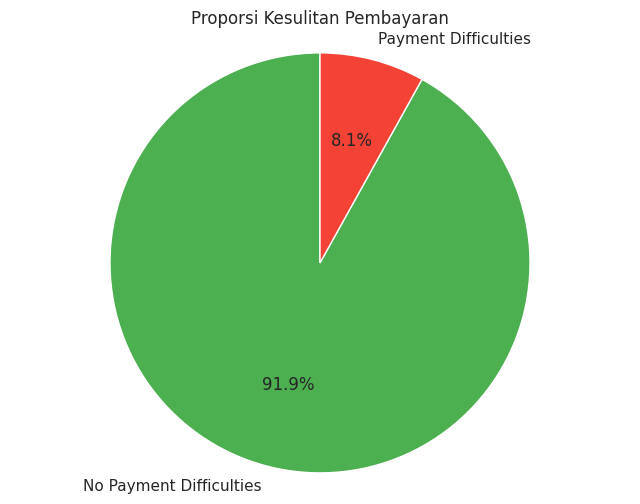

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df_train = pd.read_csv('/content/application_train.csv', sep=',', on_bad_lines='skip')

# Copy the dataframe to avoid modifications to the original
train = df_train.copy()

# Define a function to decode the sentiment labels
decode_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return decode_map[int(label)]

# Apply the decode_sentiment function to the 'TARGET' column of the 'train' dataframe
train['TARGET'] = train['TARGET'].apply(lambda x: decode_sentiment(x))

# Calculate the value counts of 'TARGET' column in the 'train' dataframe and normalize them.
grp = train['TARGET'].value_counts(normalize=True)

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Assuming 'grp' contains the proportions, create a DataFrame for the pie chart
df_pie = grp.reset_index()
df_pie.columns = ['TARGET', 'proportion']  # Rename columns for clarity

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_pie['proportion'], labels=df_pie['TARGET'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Proporsi Kesulitan Pembayaran')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Dari data diatas mengatakan bahwa untuk no payment difficult memiliki presentase 91,9% yang berarti tinggi,jadi menunjukan sebagian besar debitur tidak mengalami kesulitan dalam hal membayar hutang, Sedangkan proporsi 8,1% ini payment difficult memiliki proporsi yang sangat rendah dibandingkan dengan no payment difficult ,jadi menunjukan hanya sebagian kecil debitu yang mengalami kesulitan dalam hal pembayaran.

Sebagian besar debitu dalam data set ini menunjukan bahwa rata rata mereka tidak mengalami kesulitan dalam hal pembayaran , jadi portofolio mereka menujukan cukup sehat. Meskipun ada sedikit prosentase kesulitan dalam hal pembayaran perusahan harus mengetahui faktor faktor apa saja yang mempengaruhi atau menyebabkan adanya kesulitan dalam hal membayar hutang guna untuk mengurangi risiko kegagalan di masa yang akan datang.

Rekomendasi ataua ide bisnis dalam permasalahan ini adalah :

1. Perusahaan harus mengatahui adanya proporsi yang rendah dalam hal kesulitan membayar dengan cara tetap mengkoordinasikan dan menganalisis faktor-faktor apa saja yang menyebabkan adanya kegagalam membayar.
2. Perusahaan harus meningkatkan adanya kualitas pelayanan debitur yang berisiko untuk membantu mereka untuk menawarkan dukungan berupa edukasi untuk meminimalkan kegagalan dalam hal membayar dan membatu mereka mengelola hutang mereka dengan baik dan menjaga data keamanan debitur agar tidak mengalami penipuan untuk disebarkan kepada orang yang tidak bertanggungjawab dan menawarkan hutang kembali.
3. Perusahaan harus melakukan sebuah analisis lebih lanjut mengenai pola atau kesulitas serta keamaman mereka dalam hal pengambilan keputusan kredit di masa depan yang di awasi Otoritas jasa keuangan.



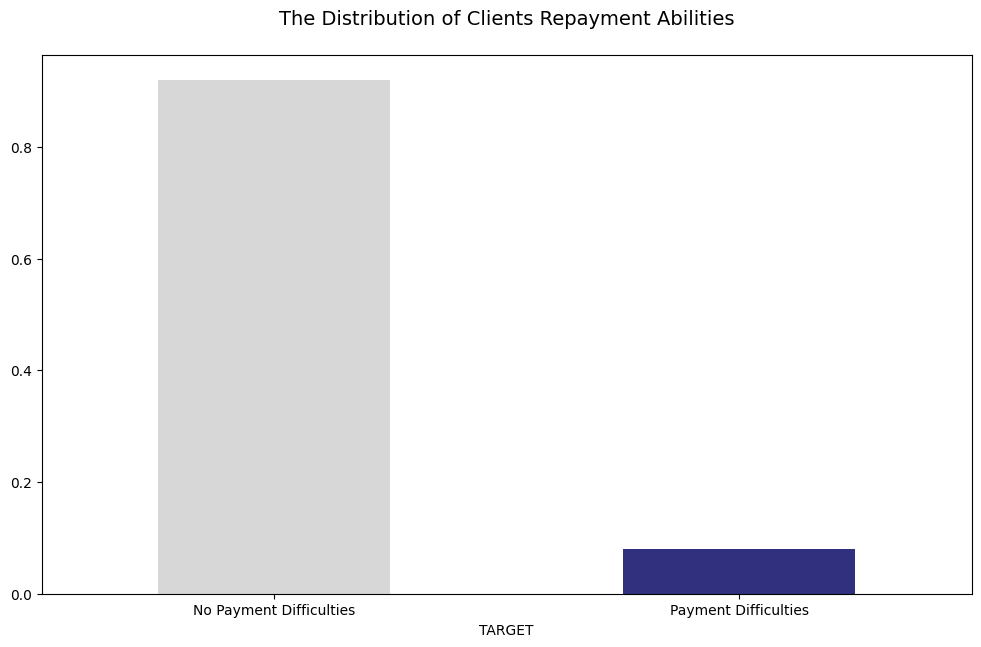

In [ ]:
import matplotlib.pyplot as plt # Import the necessary library

fig = plt.figure(figsize = (12,7))
grp.plot(kind='bar', color= ['lightgrey','midnightblue'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.show()

Terdapat sekitar 91,9% pinjaman yang setara dengan sekitar 37.483K dengan TARGET = 0, yang menunjukkan bahwa klien tidak mengalami kesulitan dalam melunasi pinjaman dalam waktu tertentu. Meskipun hanya 8,1% dari total pinjaman (sekitar 3 ribu pemohon) dalam kumpulan data ini yang melibatkan klien yang mengalami masalah dalam membayar kembali pinjamannya.

<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

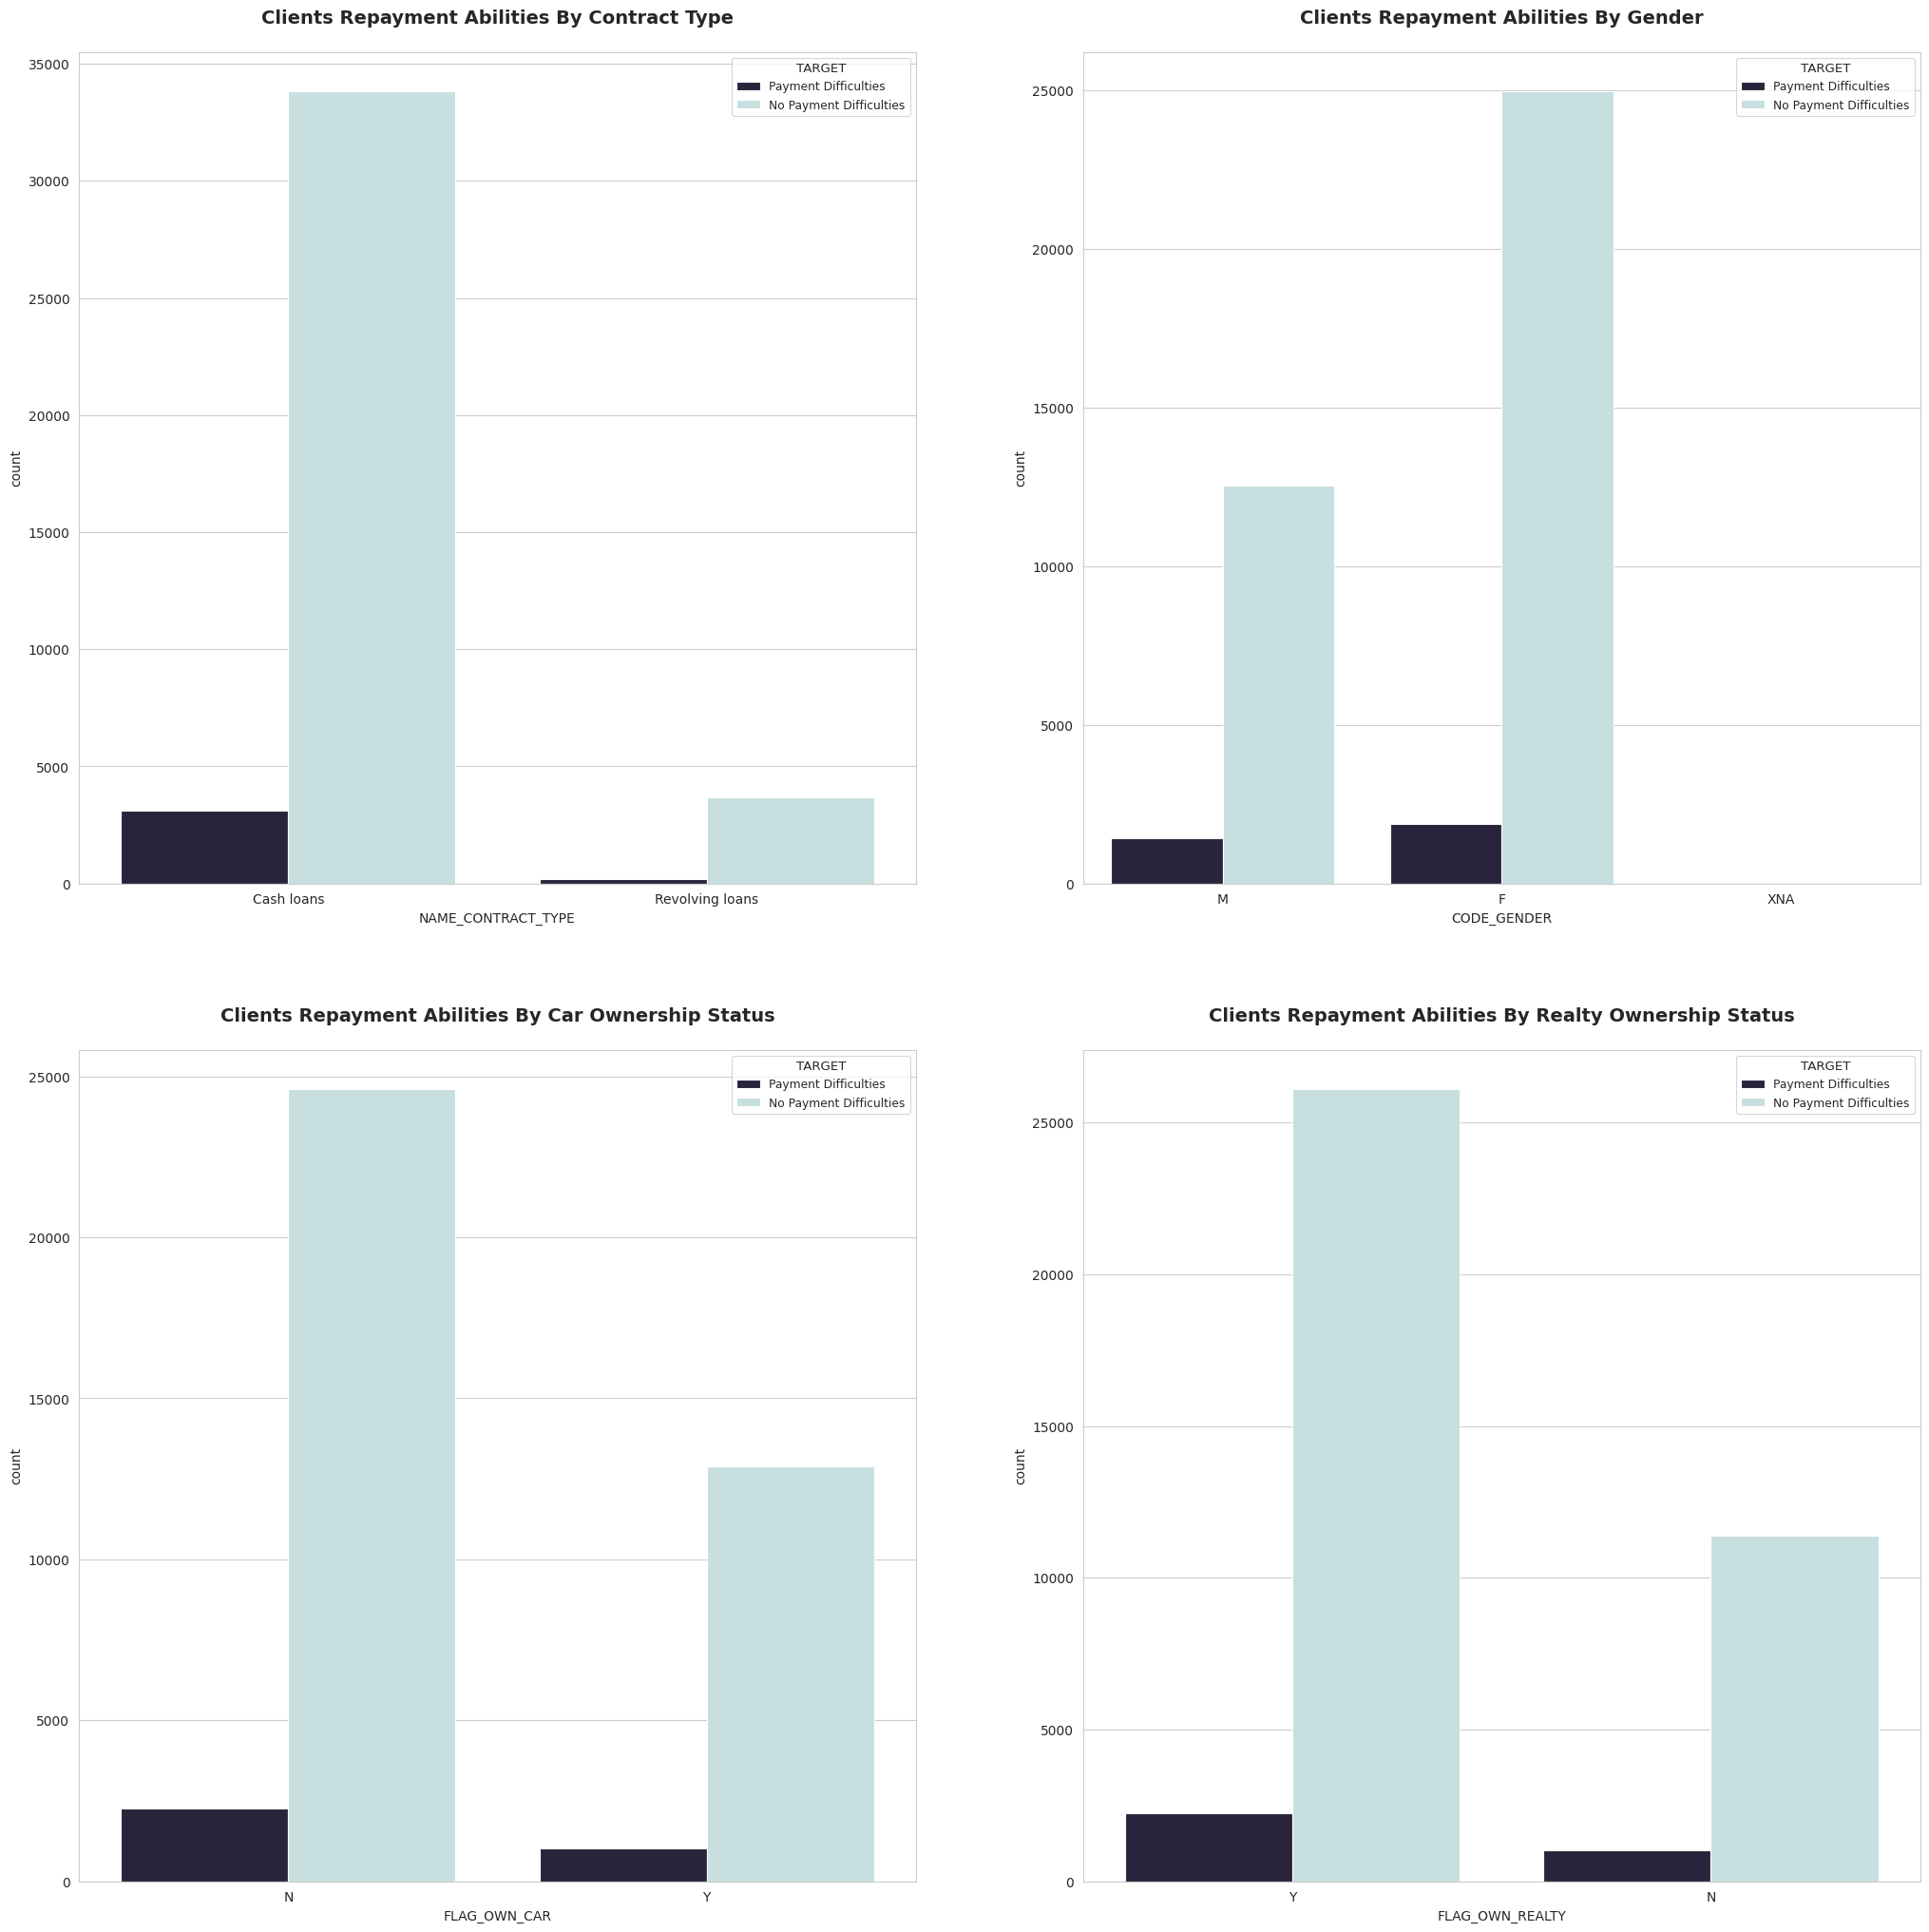

In [ ]:
# visualization pt 1
import seaborn as sns # Import seaborn with the alias 'sns'
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is also imported

sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

1. cash loan atau pinjaman cash Dari tabel grafik yang pertama menunjukan bahwa seseorang yang melakukan pinjaman tunai dan tidak mengalami kesulitan membayar lebih banyak daripada yang kesulitan membayar,jadi lebih efektif metode cash dalam hal meminjam. revolving loan atau pinjaman kredit secara bergulir ini kebanyakan tidak mengalami kesulitan dalam hal pembayaran yaitu contoh produknya kartu kredit yang setiap bulannya terdapat bunga yang harus dibayar.
2. gender atau jenis kelamin dari tabel yang kedua menunjukan bahwa Perempuan lebih rentan dalam hal kesulitan membayar tetapi debitur paling banyak daripada laki- laki sedikit tetapi mudah dalam hal pembayaran atau melakukan sebuah transaksi
3. Berdasarkan seseorang yang mempunyai atau tidakanya kendaraan pribadi yaitu mobil paling banyak yang tidak mempunyai mobil adalah palaing banyak yang melakukan pembayaran atau debitur terbanyak tetapi paling banyak melakukan kegagalam pembayaran sedangkan yang mempunyai mobil berhasil melakukan pembayaran tetapi sedikit yang melakukan pinjaman.
4. dari realitas kebanyakan seseorang yang mempunyai realitas atas kepemilikan terhadap barang atau mempunyai barang lebih banyak melakukan peminjaman tetapi kesulitan dalam hal pembayaran,sedangkan yang tidak mempunyai realitas yang bagus tetapi mudah untuk melakukan transaksi pembayaran.

In [ ]:
ct = train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Contract Type


Clients Repayment Abilities By Contract Type


<Figure size 1000x600 with 0 Axes>

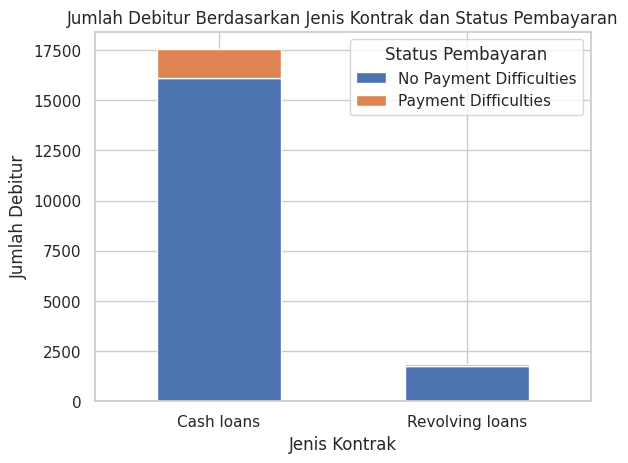

In [ ]:
# ipython-input-0-bc19f4630e35
import seaborn as sns
import matplotlib.pyplot as plt

# ... (rest of the code remains unchanged)

# ipython-input-0-bc19f4630e35
ct = train.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

# ipython-input-7-bc19f4630e35
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Now 'ct' is defined from the previous cell and can be used here
# Assuming 'ct' contains the grouped data
# Reshape the 'ct' DataFrame for plotting
summary = ct.pivot_table(index='NAME_CONTRACT_TYPE', columns='TARGET', values='SK_ID_CURR', fill_value=0)

# Rename the columns for better readability
summary.columns = ['No Payment Difficulties', 'Payment Difficulties']  # Rename columns for clarity


# Membuat bar plot
plt.figure(figsize=(10, 6))
summary[['No Payment Difficulties', 'Payment Difficulties']].plot(kind='bar', stacked=True)
plt.title('Jumlah Debitur Berdasarkan Jenis Kontrak dan Status Pembayaran')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Debitur')
plt.xticks(rotation=0)
plt.legend(title='Status Pembayaran', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

Dari Plot show diatas menunjukan bahwa jumlah debitur berdasarkan jenis kontrak dan status pembayaran yang mengatakan bahwa jumlah debitur paling banyak adalah jenis peminjaman cash daripada peminjaman bergulir.
Peminjaman cash atau cash loan berjumlah 16.000 dengan proposi debitur paling banyak dan yang tidak mengalami kesulitan pembayaran. cash loan yang berjumlah 1.500 ini atau sisa dari total jumlah debitur 17.500 mengalami kesulitan pembayaran.
Revolving loan ini jumlah debitur hanya 2.400k tetapi tidak mengalami kesulitan membayar.

## Gender of the cliet

In [ ]:
train['CODE_GENDER'] = train['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [ ]:
gt = train.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='SK_ID_CURR', ascending=False)
gt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Gender


In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'ODE_GENDER': ['Female', 'Female', 'Male', 'Male', 'XNA'],
    'TARGET': ['No Payment Difficulties', 'Payment Difficulties', 'No Payment Difficulties', 'Payment Difficulties', 'No Payment Difficulties'],
    'SK_ID_CURR': [24953, 1870, 12528, 1429, 2]
}

df = pd.DataFrame(data)
print(df)

  ODE_GENDER                   TARGET  SK_ID_CURR
0     Female  No Payment Difficulties       24953
1     Female     Payment Difficulties        1870
2       Male  No Payment Difficulties       12528
3       Male     Payment Difficulties        1429
4        XNA  No Payment Difficulties           2


In [ ]:
# Menghitung jumlah debitur berdasarkan jenis kelamin dan status pembayaran
summary = df.groupby(['ODE_GENDER', 'TARGET']).size().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['No Payment Difficulties (%)'] = (summary['No Payment Difficulties'] / summary['Total']) * 100
summary['Payment Difficulties (%)'] = (summary['Payment Difficulties'] / summary['Total']) * 100

print(summary)

TARGET      No Payment Difficulties  Payment Difficulties  Total  \
ODE_GENDER                                                         
Female                            1                     1      2   
Male                              1                     1      2   
XNA                               1                     0      1   

TARGET      No Payment Difficulties (%)  Payment Difficulties (%)  
ODE_GENDER                                                         
Female                             50.0                      50.0  
Male                               50.0                      50.0  
XNA                               100.0                       0.0  


<Figure size 1000x600 with 0 Axes>

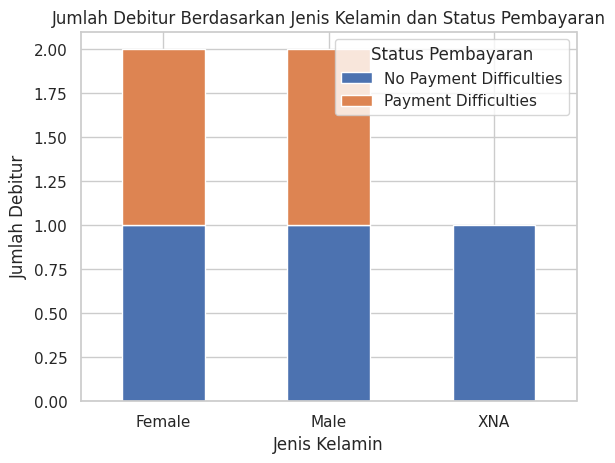

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(10, 6))
summary[['No Payment Difficulties', 'Payment Difficulties']].plot(kind='bar', stacked=True)
plt.title('Jumlah Debitur Berdasarkan Jenis Kelamin dan Status Pembayaran')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Debitur')
plt.xticks(rotation=0)
plt.legend(title='Status Pembayaran', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

Dari data diatas kita akan menganalisis jumlah debitur berdasarkan jenis kelamin dan status pembayaran. status gender perempuan dan laki-laki memiliki jumlah debitur sama sama banyak tetapi perbedaan dari mereka adalah proporsi yang mengalami kesulitan pembayaran dan tidak mengalami kesulitan pembayaran.
Sedangkan Status XNA ini jumlahnya setengah dari jumlah laki-laki dan perempuan tetapi paling stabil tidak mengalami kesulitan pembayaran.

In [ ]:
df_train[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

CODE_GENDER    TARGET
1           M  0.102386
0           F  0.069716
2         XNA  0.000000

In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'CODE_GENDER': ['M', 'F', 'XNA'],
    'TARGET': [0.102386, 0.069716, 0.000000]
}

df = pd.DataFrame(data)
print(df)

  CODE_GENDER    TARGET
0           M  0.102386
1           F  0.069716
2         XNA  0.000000


<ipython-input-17-8acbbca6fe2e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CODE_GENDER', y='TARGET', data=df, palette='viridis')


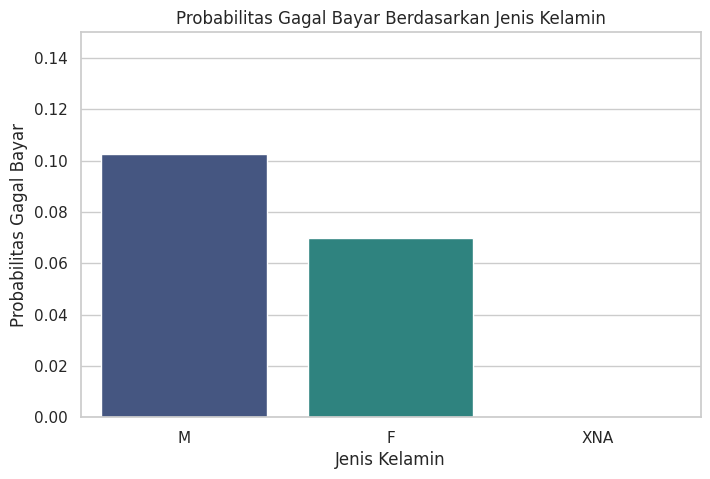

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='CODE_GENDER', y='TARGET', data=df, palette='viridis')
plt.title('Probabilitas Gagal Bayar Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Probabilitas Gagal Bayar')
plt.ylim(0, 0.15)  # Mengatur batas sumbu y
plt.show()

Dari plot show diats mengatakan bahwa gender laki laki mempunyai prosentase 0,10 atau 10% yang berarti tinggi,jadi menunjukan bahwa laki-laki ini memiliki probabilitas risiko kegagalam pembayran yang lebih tinggi daripada perempuan yang hanya mempunyai prosentase 6,97%,jadi menunjukan bahwa individu perempuan mempunayi risiko yang rendah dalam melkukan kegagalan pembayran dan cenderung lebih mudah membayar peminjaman daripada laki-laki.

jadi dari penjelasan diatas mengatakan bahwa jenis kelamin atau gender memiliki hubungan yang berkaitan dengan risiko kegagalam dalam pembayaran. Individu laki-laki menunjukan bahwa mereka lebih rentan dalam melakukan kegagalam membayar daripada perempuan lebih sedikit. Sedangkan dengan status jender XNA ini cenderung stabil atau tidak ada risiko dalam hal kegagalam pembayaran.

Ide Bisnis :
1. Perusahaan harus lebih berhati-hati dalam hal menargetkan melakukan peminjaman terhadap laki laki daripada perempuan.
2. Perusahaan harus memahami setiap update informasi mengenai preferensi mana yang lebih berisko tinggi atau rendah dengan melihat portofolio yang berkualitas baik.
3. Perusahaan harus melakukan sebuah analisis lebih lanjut mengenai jenis kelamin atau gender baik perempuan,laki-laki,dan XNA.

## Car Ownership Vs Target

In [ ]:
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [ ]:
ot = train.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Car Ownership Status


In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'FLAG_OWN_CAR': ['No', 'No', 'Yes', 'Yes'],
    'TARGET': ['No Payment Difficulties', 'Payment Difficulties',
               'No Payment Difficulties', 'Payment Difficulties'],
    'SK_ID_CURR': [24595, 2279, 12888, 1020]
}

df = pd.DataFrame(data)
print(df)

  FLAG_OWN_CAR                   TARGET  SK_ID_CURR
0           No  No Payment Difficulties       24595
1           No     Payment Difficulties        2279
2          Yes  No Payment Difficulties       12888
3          Yes     Payment Difficulties        1020


In [ ]:
# Menghitung jumlah debitur berdasarkan kepemilikan mobil dan status pembayaran
summary = df.groupby(['FLAG_OWN_CAR', 'TARGET']).size().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['No Payment Difficulties (%)'] = (summary['No Payment Difficulties'] / summary['Total']) * 100
summary['Payment Difficulties (%)'] = (summary['Payment Difficulties'] / summary['Total']) * 100

print(summary)

TARGET        No Payment Difficulties  Payment Difficulties  Total  \
FLAG_OWN_CAR                                                         
No                                  1                     1      2   
Yes                                 1                     1      2   

TARGET        No Payment Difficulties (%)  Payment Difficulties (%)  
FLAG_OWN_CAR                                                         
No                                   50.0                      50.0  
Yes                                  50.0                      50.0  


<Figure size 1000x600 with 0 Axes>

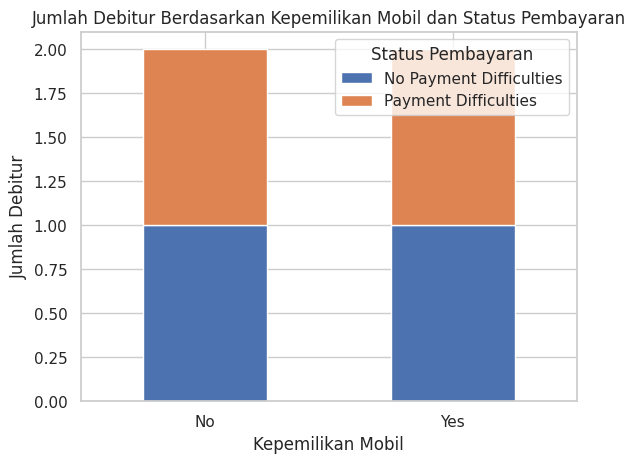

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(10, 6))
summary[['No Payment Difficulties', 'Payment Difficulties']].plot(kind='bar', stacked=True)
plt.title('Jumlah Debitur Berdasarkan Kepemilikan Mobil dan Status Pembayaran')
plt.xlabel('Kepemilikan Mobil')
plt.ylabel('Jumlah Debitur')
plt.xticks(rotation=0)
plt.legend(title='Status Pembayaran', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

Dari data diatas mennunjukan bahwa seseorang yang tidak mempunyai mobil dan yang mempunyai mobil jumlahnya sama  mereka juga sama sama berdasarkan tidak mempunyai kesulitan atau kegagalan pembayaran dan mempunyai kegagalan pembayaran.


In [ ]:
df_train[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

FLAG_OWN_CAR    TARGET
0            N  0.084803
1            Y  0.073339

In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'FLAG_OWN_CAR': ['N', 'Y'],
    'TARGET': [0.084803, 0.073339]
}

df = pd.DataFrame(data)
print(df)

  FLAG_OWN_CAR    TARGET
0            N  0.084803
1            Y  0.073339


<ipython-input-27-ad562ff57af7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=df, palette='viridis')


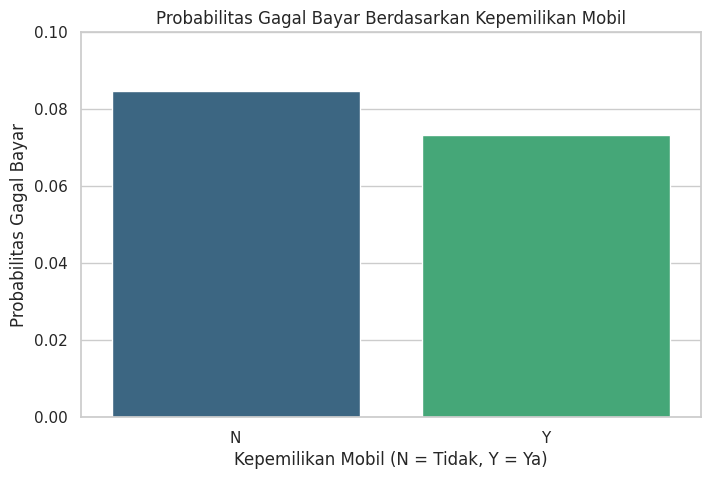

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=df, palette='viridis')
plt.title('Probabilitas Gagal Bayar Berdasarkan Kepemilikan Mobil')
plt.xlabel('Kepemilikan Mobil (N = Tidak, Y = Ya)')
plt.ylabel('Probabilitas Gagal Bayar')
plt.ylim(0, 0.1)  # Mengatur batas sumbu y
plt.show()

Non-Pemilik Mobil (N): Memiliki probabilitas gagal bayar yang lebih tinggi (8.48%) dibandingkan dengan pemilik mobil.

Pemilik Mobil (Y): Memiliki probabilitas gagal bayar yang lebih rendah (7.33%), menunjukkan bahwa individu yang memiliki mobil cenderung lebih mampu membayar pinjaman.

Terdapat perbedaan yang cukup signifikan anatara non pemilik mobil dan pemilik mobil. Non-Pemilik mobil adalah yang paling tinggi adanya risiko gagal bayar daripada pemilik mobil yang tidak ada risiko gagal bayar.

Meskipun prosentasenya tidak terlalu jauh tetapi cukup memberikan gambaran perbedaan probabilitas gagal bayar tetapi tetap menjadi tolak ukur atau indikator dalam hal pembayaran.

## Reality Ownership Status Vs Target

In [ ]:
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])


In [ ]:
rt = train.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Realty Ownership Status


In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'FLAG_OWN_CAR': ['N', 'Y'],
    'TARGET': [0.084803, 0.073339]
}

df = pd.DataFrame(data)
print(df)

  FLAG_OWN_CAR    TARGET
0            N  0.084803
1            Y  0.073339


<ipython-input-30-6dabf69655dd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=df, palette='viridis')


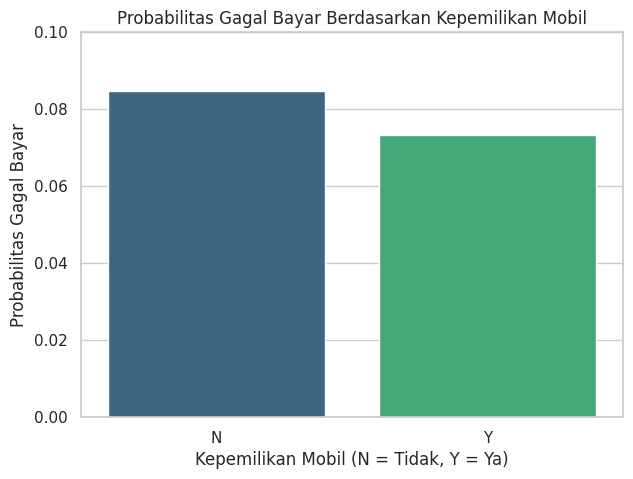

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=df, palette='viridis')
plt.title('Probabilitas Gagal Bayar Berdasarkan Kepemilikan Mobil')
plt.xlabel('Kepemilikan Mobil (N = Tidak, Y = Ya)')
plt.ylabel('Probabilitas Gagal Bayar')
plt.ylim(0, 0.1)  # Mengatur batas sumbu y
plt.show()

In [ ]:
df_train[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

FLAG_OWN_REALTY    TARGET
0               N  0.083689
1               Y  0.079668

In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'FLAG_OWN_REALTY': ['N', 'Y'],
    'TARGET': [0.083689, 0.079668]
}

df = pd.DataFrame(data)
print(df)

  FLAG_OWN_REALTY    TARGET
0               N  0.083689
1               Y  0.079668


<ipython-input-33-d891c265e2f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FLAG_OWN_REALTY', y='TARGET', data=df, palette='viridis')


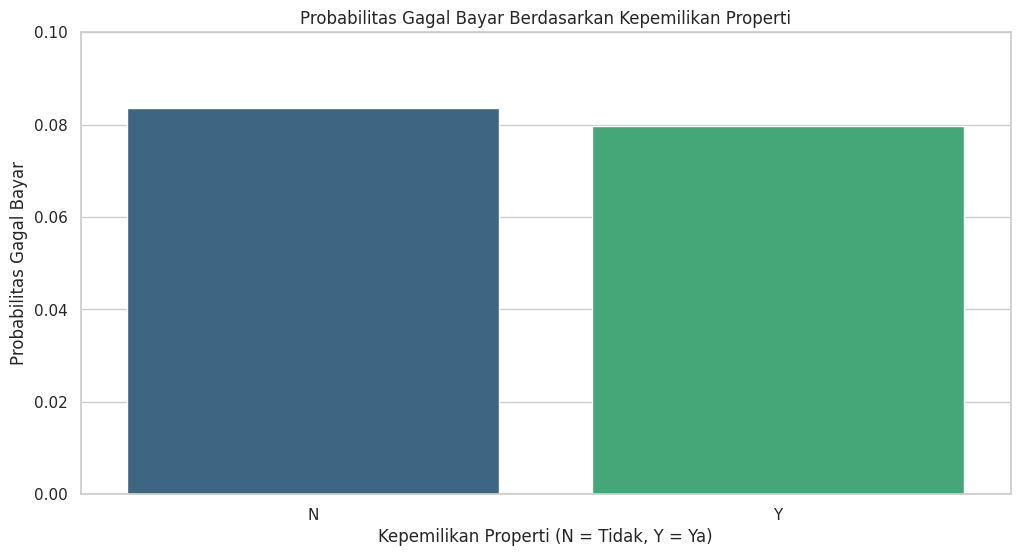

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET', data=df, palette='viridis')
plt.title('Probabilitas Gagal Bayar Berdasarkan Kepemilikan Properti')
plt.xlabel('Kepemilikan Properti (N = Tidak, Y = Ya)')
plt.ylabel('Probabilitas Gagal Bayar')
plt.ylim(0, 0.1)  # Mengatur batas sumbu y
plt.show()

Non-Pemilik Properti (N): Memiliki probabilitas gagal bayar yang lebih tinggi (9% atau 0,09) dibandingkan dengan pemilik mobil.

Pemilik Properti (Y): Memiliki probabilitas gagal bayar yang lebih rendah (8% atau 0,08), menunjukkan bahwa individu yang memiliki mobil cenderung lebih mampu membayar pinjaman.

Terdapat perbedaan yang cukup signifikan anatara non pemilik Properti dan pemilik Properti. Non-Pemilik properti adalah yang paling tinggi adanya risiko gagal bayar daripada pemilik properti yang tidak ada risiko gagal bayar.

Meskipun prosentasenya tidak terlalu jauh tetapi cukup memberikan gambaran perbedaan probabilitas gagal bayar tetapi tetap menjadi tolak ukur atau indikator dalam hal pembayaran.

## Suite Type,Income type,Education Type,and family status

## Suite type Vs Target

In [ ]:
st = train.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
st.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'NAME_TYPE_SUITE': [
        'Children', 'Children', 'Family', 'Family',
        'Group of people', 'Group of people', 'Other_A',
        'Other_A', 'Other_B', 'Other_B', 'Spouse, partner',
        'Spouse, partner', 'Unaccompanied', 'Unaccompanied'
    ],
    'TARGET': [
        'No Payment Difficulties', 'Payment Difficulties',
        'No Payment Difficulties', 'Payment Difficulties',
        'No Payment Difficulties', 'Payment Difficulties',
        'No Payment Difficulties', 'Payment Difficulties',
        'No Payment Difficulties', 'Payment Difficulties',
        'No Payment Difficulties', 'Payment Difficulties',
        'No Payment Difficulties', 'Payment Difficulties'
    ],
    'SK_ID_CURR': [
        404, 40, 4958, 409,
        31, 1, 105, 8,
        189, 23, 1377, 111,
        30266, 2703
    ]
}

df = pd.DataFrame(data)
print(df)

    NAME_TYPE_SUITE                   TARGET  SK_ID_CURR
0          Children  No Payment Difficulties         404
1          Children     Payment Difficulties          40
2            Family  No Payment Difficulties        4958
3            Family     Payment Difficulties         409
4   Group of people  No Payment Difficulties          31
5   Group of people     Payment Difficulties           1
6           Other_A  No Payment Difficulties         105
7           Other_A     Payment Difficulties           8
8           Other_B  No Payment Difficulties         189
9           Other_B     Payment Difficulties          23
10  Spouse, partner  No Payment Difficulties        1377
11  Spouse, partner     Payment Difficulties         111
12    Unaccompanied  No Payment Difficulties       30266
13    Unaccompanied     Payment Difficulties        2703


In [ ]:
# Menghitung jumlah debitur berdasarkan jenis kelompok dan status pembayaran
summary = df.groupby(['NAME_TYPE_SUITE', 'TARGET']).size().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['No Payment Difficulties (%)'] = (summary['No Payment Difficulties'] / summary['Total']) * 100
summary['Payment Difficulties (%)'] = (summary['Payment Difficulties'] / summary['Total']) * 100

print(summary)

TARGET           No Payment Difficulties  Payment Difficulties  Total  \
NAME_TYPE_SUITE                                                         
Children                               1                     1      2   
Family                                 1                     1      2   
Group of people                        1                     1      2   
Other_A                                1                     1      2   
Other_B                                1                     1      2   
Spouse, partner                        1                     1      2   
Unaccompanied                          1                     1      2   

TARGET           No Payment Difficulties (%)  Payment Difficulties (%)  
NAME_TYPE_SUITE                                                         
Children                                50.0                      50.0  
Family                                  50.0                      50.0  
Group of people                         50.0      

<Figure size 1200x600 with 0 Axes>

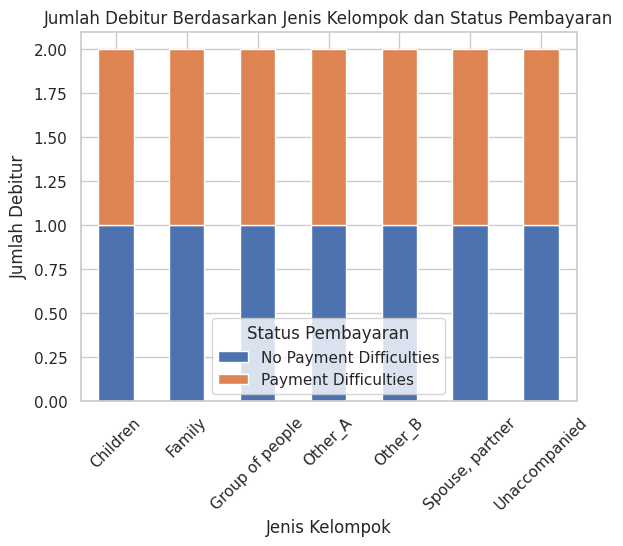

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 6))
summary[['No Payment Difficulties', 'Payment Difficulties']].plot(kind='bar', stacked=True)
plt.title('Jumlah Debitur Berdasarkan Jenis Kelompok dan Status Pembayaran')
plt.xlabel('Jenis Kelompok')
plt.ylabel('Jumlah Debitur')
plt.xticks(rotation=45)
plt.legend(title='Status Pembayaran', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

Dari data diatas menunjukan jumlah debitur berdasarkan jenis kelompok dan jenis pembayaran semua sama sama banyak tidak ada perbedaan penyimpangan prosentae hanya saja status pembayaran yang memiliki gagal bayar dan tidak memiliki gagal bayar

In [ ]:
df_train[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

NAME_TYPE_SUITE    TARGET
4          Other_B  0.108491
0         Children  0.090090
6    Unaccompanied  0.081986
1           Family  0.076206
5  Spouse, partner  0.074597
3          Other_A  0.070796
2  Group of people  0.031250

from matplotlib import pyplot as plt
_df_0['TARGET'].plot(kind='hist', bins=20, title='TARGET')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('NAME_TYPE_SUITE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TARGET'].plot(kind='line', figsize=(8, 4), title='TARGET')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['NAME_TYPE_SUITE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='TARGET', y='NAME_TYPE_SUITE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

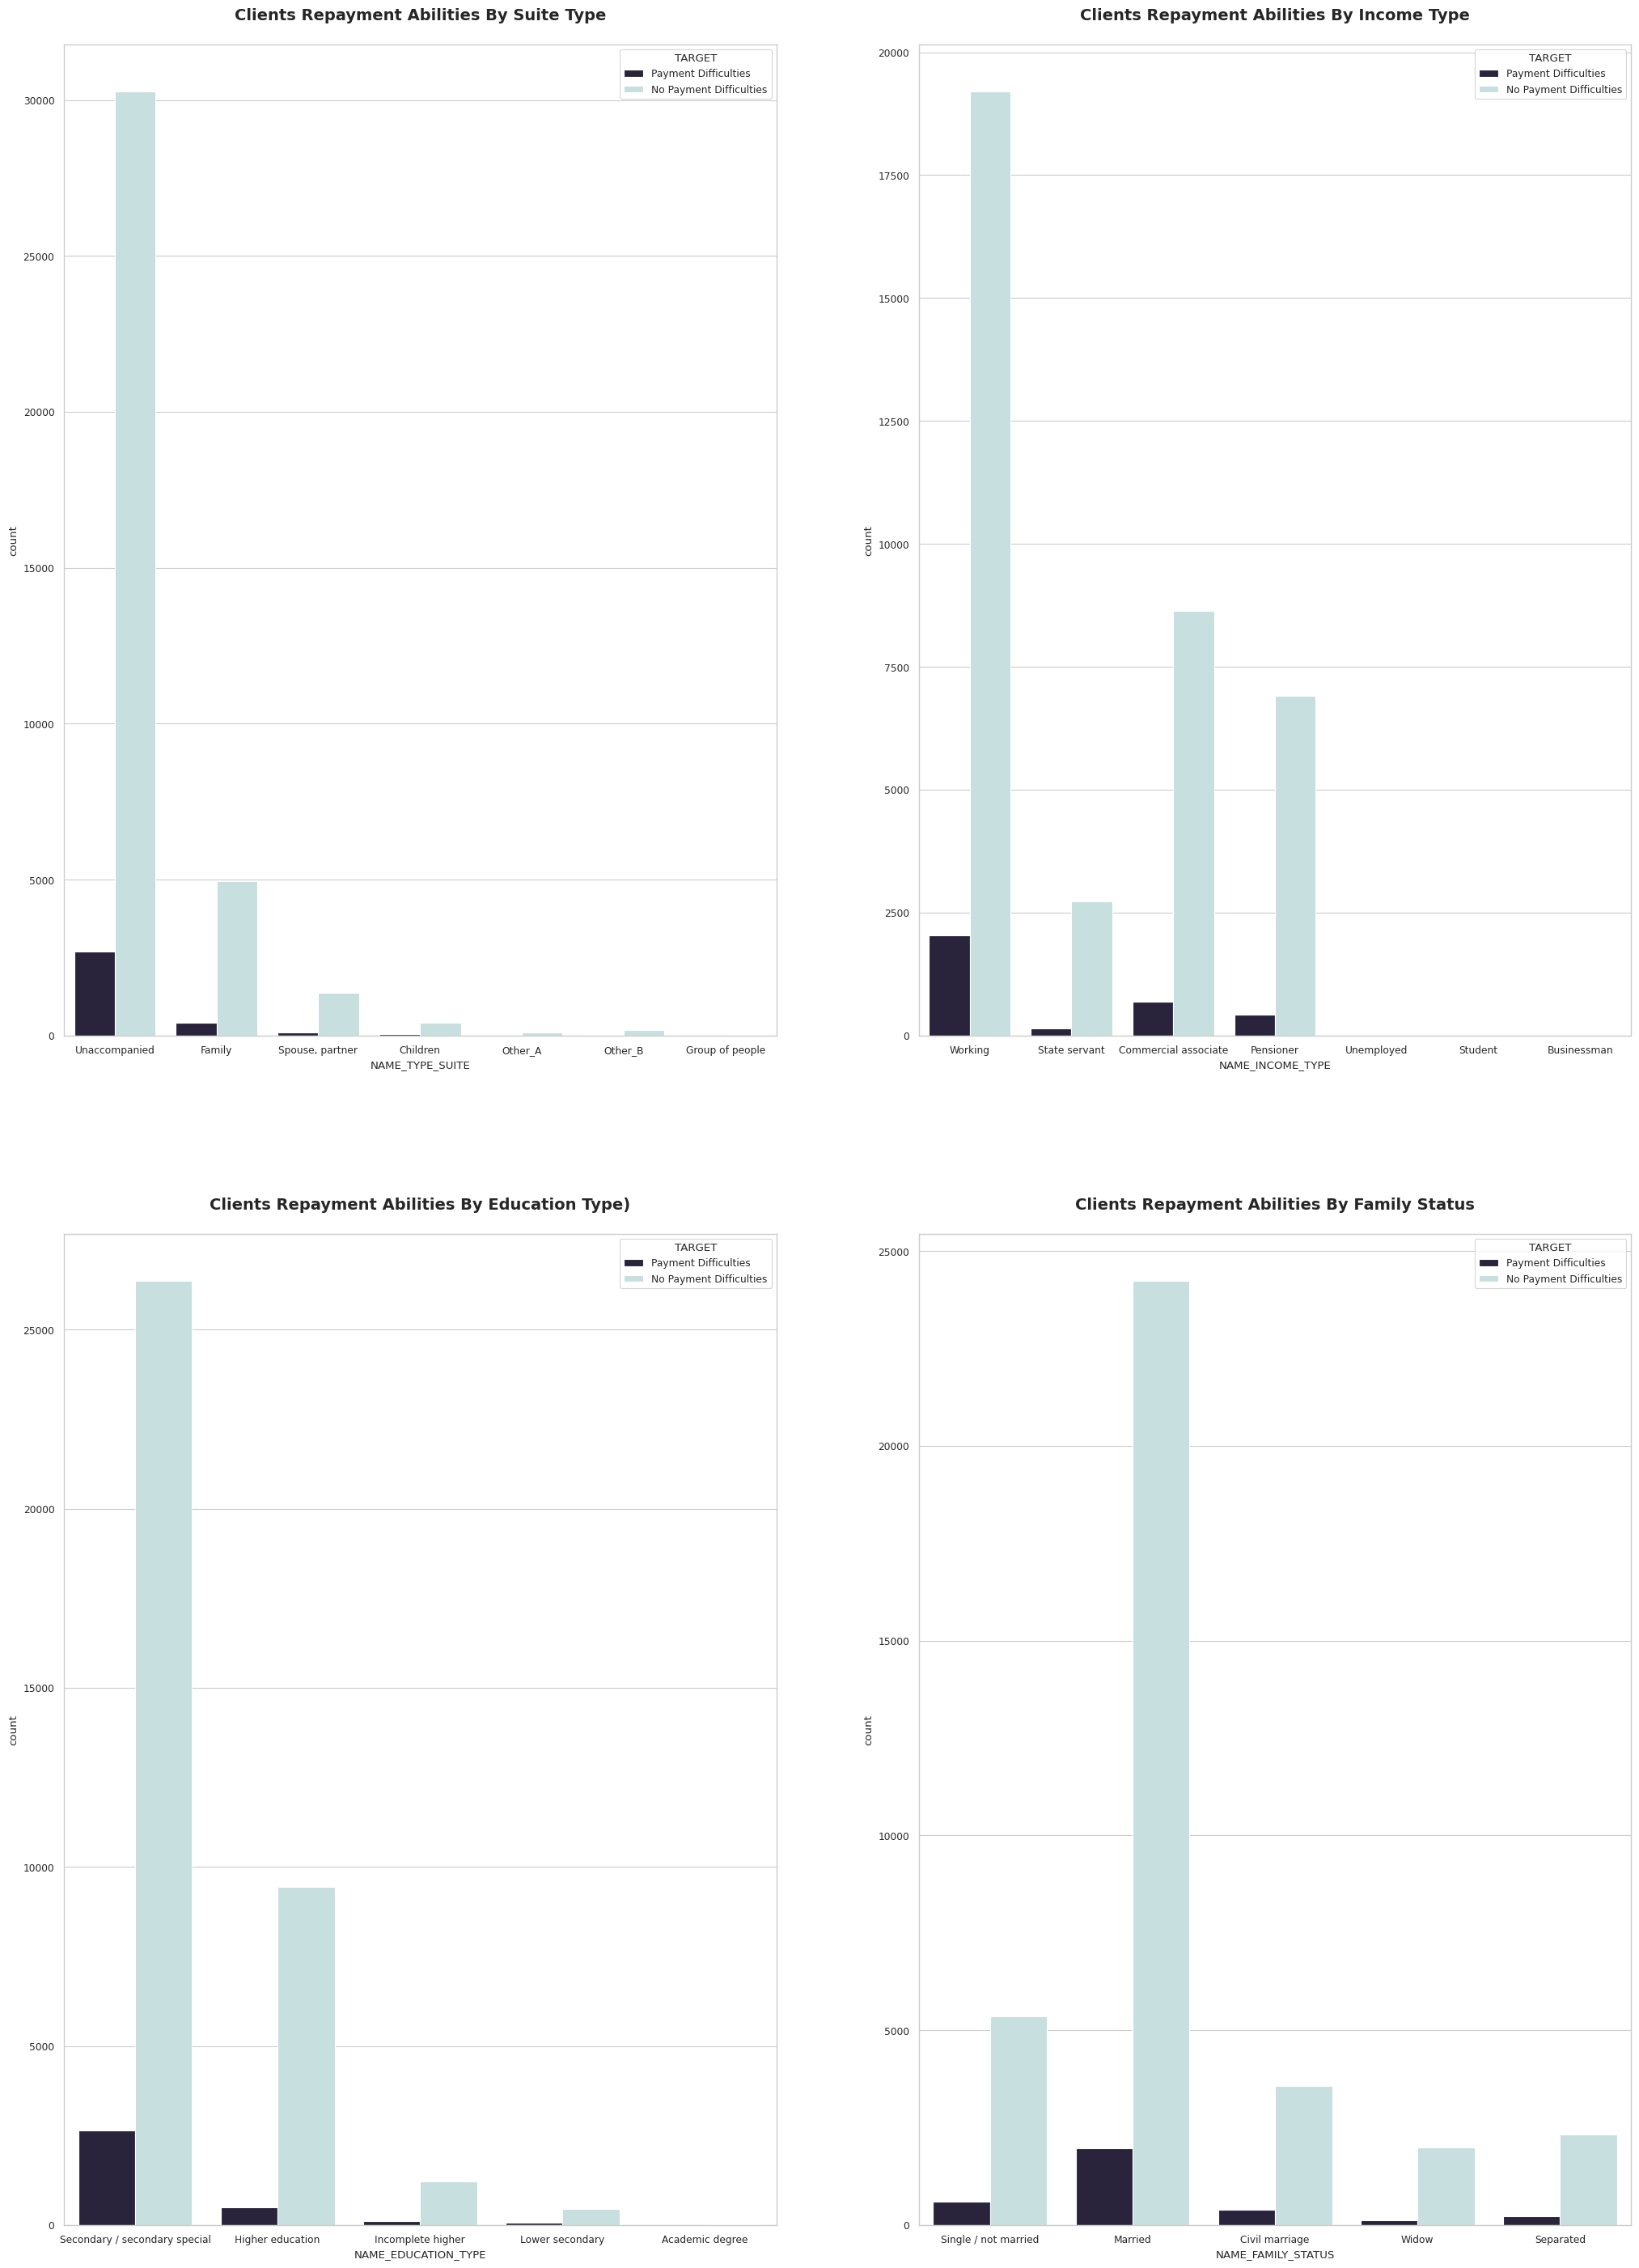

In [ ]:
# visualization pt. 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'NAME_TYPE_SUITE': [
        'Other_B', 'Children', 'Unaccompanied',
        'Family', 'Spouse, partner', 'Other_A',
        'Group of people'
    ],
    'TARGET': [
        0.108491, 0.090090, 0.081986,
        0.076206, 0.074597, 0.070796,
        0.031250
    ]
}

df = pd.DataFrame(data)
print(df)

   NAME_TYPE_SUITE    TARGET
0          Other_B  0.108491
1         Children  0.090090
2    Unaccompanied  0.081986
3           Family  0.076206
4  Spouse, partner  0.074597
5          Other_A  0.070796
6  Group of people  0.031250


<ipython-input-39-6f9e2249f4ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TARGET', y='NAME_TYPE_SUITE', data=df, palette='viridis')


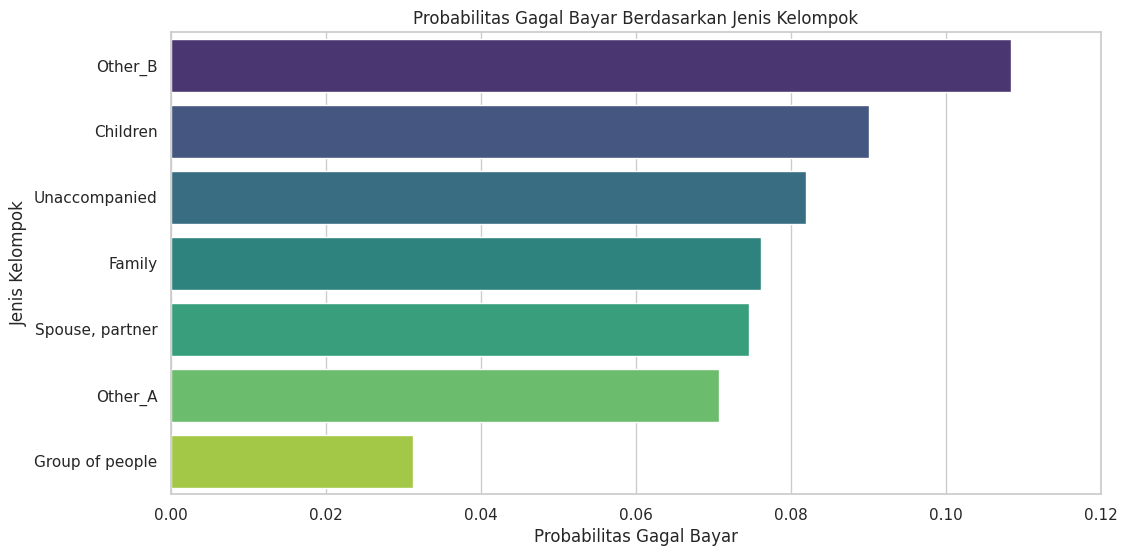

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TARGET', y='NAME_TYPE_SUITE', data=df, palette='viridis')
plt.title('Probabilitas Gagal Bayar Berdasarkan Jenis Kelompok')
plt.xlabel('Probabilitas Gagal Bayar')
plt.ylabel('Jenis Kelompok')
plt.xlim(0, 0.12)  # Mengatur batas sumbu x
plt.show()

## Income Type Vs Target

In [ ]:
rt = train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


In [ ]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

NAME_INCOME_TYPE    TARGET
5            Unemployed  0.400000
6               Working  0.095714
1  Commercial associate  0.073717
2             Pensioner  0.057716
3         State servant  0.053454
0           Businessman  0.000000
4               Student  0.000000

In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'NAME_INCOME_TYPE': ['Unemployed', 'Working', 'Commercial associate', 'Pensioner', 'State servant', 'Businessman', 'Student'],
    'TARGET': [0.400000, 0.095714, 0.073717, 0.057716, 0.053454, 0.000000, 0.000000]
}

df = pd.DataFrame(data)
print(df)

       NAME_INCOME_TYPE    TARGET
0            Unemployed  0.400000
1               Working  0.095714
2  Commercial associate  0.073717
3             Pensioner  0.057716
4         State servant  0.053454
5           Businessman  0.000000
6               Student  0.000000


<ipython-input-42-e5d018f22a8d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TARGET', y='NAME_INCOME_TYPE', data=df, palette='viridis')


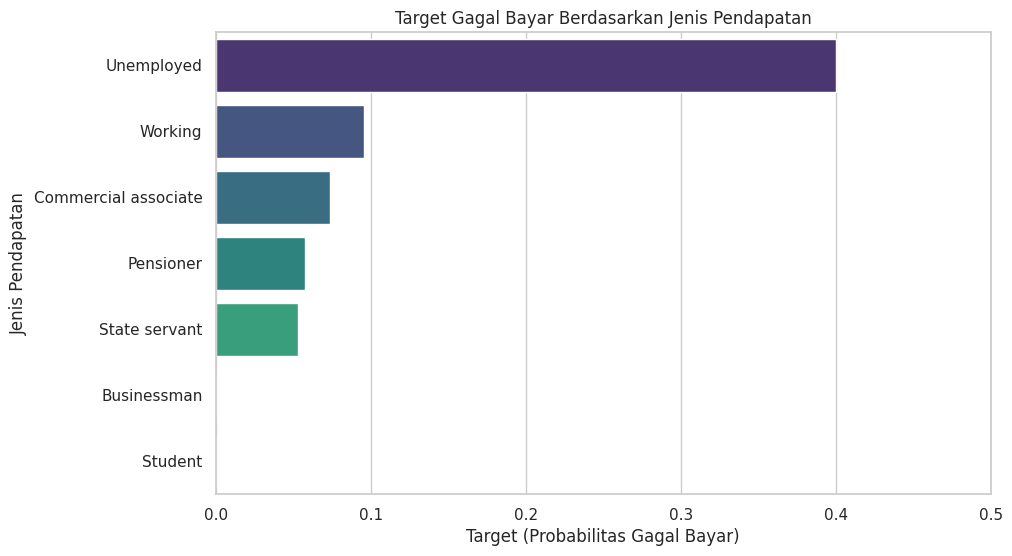

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TARGET', y='NAME_INCOME_TYPE', data=df, palette='viridis')
plt.title('Target Gagal Bayar Berdasarkan Jenis Pendapatan')
plt.xlabel('Target (Probabilitas Gagal Bayar)')
plt.ylabel('Jenis Pendapatan')
plt.xlim(0, 0.5)  # Mengatur batas sumbu x
plt.show()

Dari plot show diatas menunjukan target bayar berdasarkan jenis pendapatan. unemployed memiliki prosentase paling tinggi kategori probabilitas gagal bayar daripada yang working,commercial assciate,pensioner,state servant,Businesman,stuent mereka yang lebih rendah tidak memiliki atau mudah dalam hal melakukan sebuah pembayaran

## Education Type Vs Target

In [ ]:
et = train.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='SK_ID_CURR', ascending=False)
et.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Education Type


In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'NAME_EDUCATION_TYPE': [
        'Academic degree', 'Higher education', 'Higher education',
        'Incomplete higher', 'Incomplete higher', 'Lower secondary',
        'Lower secondary', 'Secondary / secondary special',
        'Secondary / secondary special'
    ],
    'TARGET': [
        'No Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties'
    ],
    'SK_ID_CURR': [17, 9443, 494, 1217, 113, 446, 58, 26360, 2634]
}

df = pd.DataFrame(data)
print(df)

             NAME_EDUCATION_TYPE                   TARGET  SK_ID_CURR
0                Academic degree  No Payment Difficulties          17
1               Higher education  No Payment Difficulties        9443
2               Higher education     Payment Difficulties         494
3              Incomplete higher  No Payment Difficulties        1217
4              Incomplete higher     Payment Difficulties         113
5                Lower secondary  No Payment Difficulties         446
6                Lower secondary     Payment Difficulties          58
7  Secondary / secondary special  No Payment Difficulties       26360
8  Secondary / secondary special     Payment Difficulties        2634


<Figure size 1400x600 with 0 Axes>

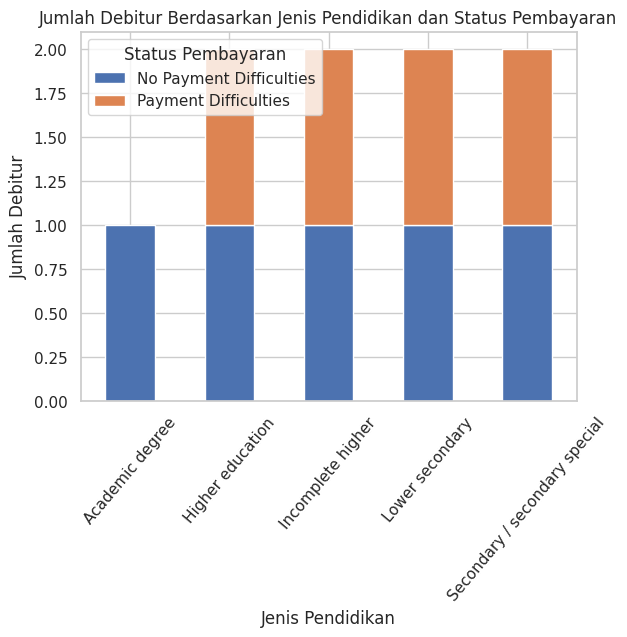

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(14, 6))
summary[['No Payment Difficulties', 'Payment Difficulties']].plot(kind='bar', stacked=True)
plt.title('Jumlah Debitur Berdasarkan Jenis Pendidikan dan Status Pembayaran')
plt.xlabel('Jenis Pendidikan')
plt.ylabel('Jumlah Debitur')
plt.xticks(rotation=50)
plt.legend(title='Status Pembayaran')
plt.show()

In [ ]:
df_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)


NAME_EDUCATION_TYPE    TARGET
3                Lower secondary  0.115079
4  Secondary / secondary special  0.090846
2              Incomplete higher  0.084962
1               Higher education  0.049713
0                Academic degree  0.000000

<ipython-input-2-d7ea96221dea>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TARGET', y='NAME_EDUCATION_TYPE', data=df, palette='viridis')


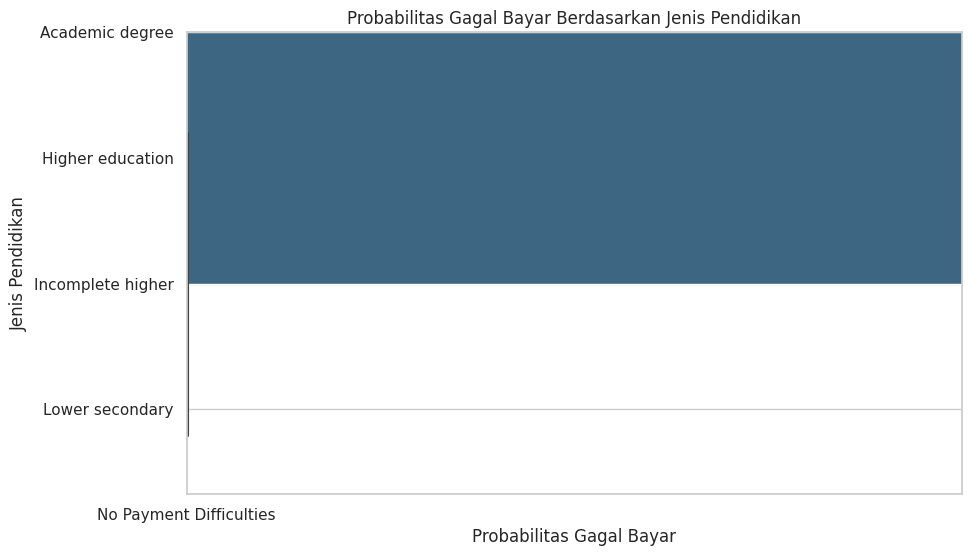

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Assuming your data is in the 'data' dictionary from previous cells
# If not, replace 'data' with your actual data source
data = {
    'NAME_EDUCATION_TYPE': [
        'Academic degree', 'Higher education', 'Higher education',
        'Incomplete higher', 'Incomplete higher', 'Lower secondary',
        'Lower secondary', 'Secondary / secondary special',
        'Secondary / secondary special'
    ],
    'TARGET': [
        'No Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties', 'No Payment Difficulties',
        'Payment Difficulties'
    ],
    'SK_ID_CURR': [17, 9443, 494, 1217, 113, 446, 58, 26360, 2634]
}

df = pd.DataFrame(data)  # Create the DataFrame 'df'

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TARGET', y='NAME_EDUCATION_TYPE', data=df, palette='viridis')
plt.title('Probabilitas Gagal Bayar Berdasarkan Jenis Pendidikan')
plt.xlabel('Probabilitas Gagal Bayar')
plt.ylabel('Jenis Pendidikan')
plt.xlim(0, 0.15)  # Mengatur batas sumbu x
plt.show()

Dari plot show diatas menujukan probabilitas berdasarkan adanya jenis pendidikan yang ditempuh.
1.Lower Secondary: Memiliki probabilitas gagal bayar tertinggi (11.51%), menunjukkan bahwa individu dengan pendidikan rendah lebih berisiko untuk gagal bayar.
2. Secondary / Secondary Special: Memiliki probabilitas gagal bayar yang cukup tinggi (9.08%).
3. Incomplete Higher: Memiliki probabilitas gagal bayar yang lebih rendah (8.50%) dibandingkan dengan dua kategori sebelumnya.
4. Higher Education: Memiliki probabilitas gagal bayar yang lebih rendah (4.97%).
5. Academic Degree: Tidak ada individu dalam kategori ini yang mengalami kesulitan pembayaran, menunjukkan bahwa mereka adalah kelompok yang paling stabil.

- Jadi dapat disimpulkan bahwa Terdapat hubungan yang jelas antara tingkat pendidikan dan risiko gagal bayar. Individu dengan pendidikan yang lebih rendah menunjukkan risiko yang lebih tinggi untuk gagal bayar.
- Individu dengan gelar akademik menunjukkan stabilitas yang lebih baik dalam hal pembayaran, yang mungkin menunjukkan bahwa pendidikan yang lebih tinggi berhubungan dengan kemampuan finansial yang lebih baik.

Ide bisnis atau Rekomendasi Bisnis dalam hal ini yaitu
1. Perusahaan harus mempertimbangkan tingkat pendidikan sebagai salah satu faktor dalam penilaian risiko saat memberikan pinjaman. Individu dengan pendidikan yang lebih rendah mungkin lebih berisiko untuk gagal bayar.
2. Fokus pada segmen pasar dengan pendidikan yang lebih tinggi untuk meningkatkan kualitas portofolio pinjaman.
3. Lakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi perbedaan risiko antara kategori pendidikan ini.




In [ ]:
# Menghitung jumlah debitur berdasarkan jenis pendidikan dan status pembayaran
summary = df.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['No Payment Difficulties (%)'] = (summary['No Payment Difficulties'] / summary['Total']) * 100
summary['Payment Difficulties (%)'] = (summary['Payment Difficulties'] / summary['Total']) * 100

print(summary)

TARGET                         No Payment Difficulties  Payment Difficulties  \
NAME_EDUCATION_TYPE                                                            
Academic degree                                      1                     0   
Higher education                                     1                     1   
Incomplete higher                                    1                     1   
Lower secondary                                      1                     1   
Secondary / secondary special                        1                     1   

TARGET                         Total  No Payment Difficulties (%)  \
NAME_EDUCATION_TYPE                                                 
Academic degree                    1                        100.0   
Higher education                   2                         50.0   
Incomplete higher                  2                         50.0   
Lower secondary                    2                         50.0   
Secondary / secondary spe

## Family Status Vs Target

In [ ]:
df_train = pd.read_csv('/content/application_train.csv', sep=',', on_bad_lines='skip')
train = df_train.copy()  # Create the 'train' DataFrame by copying df_train
ft = train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()

In [ ]:
ft = train.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
ft.sort_values(by='SK_ID_CURR', ascending=False)
ft.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Family Status


In [ ]:
import pandas as pd

# Membuat DataFrame
data = {
    'NAME_FAMILY_STATUS': [
        'Civil marriage', 'Civil marriage', 'Married', 'Married',
        'Separated', 'Separated', 'Single / not married',
        'Single / not married', 'Unknown', 'Widow', 'Widow'
    ],
    'TARGET': [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    'SK_ID_CURR': [
        26814, 2961, 181582, 14850, 18150, 1620,
        40987, 4457, 2, 15151, 937
    ]
}

df = pd.DataFrame(data)
print(df)

      NAME_FAMILY_STATUS  TARGET  SK_ID_CURR
0         Civil marriage       0       26814
1         Civil marriage       1        2961
2                Married       0      181582
3                Married       1       14850
4              Separated       0       18150
5              Separated       1        1620
6   Single / not married       0       40987
7   Single / not married       1        4457
8                Unknown       0           2
9                  Widow       0       15151
10                 Widow       1         937


In [ ]:
# Menghitung jumlah debitur berdasarkan status keluarga dan status pembayaran
summary = df.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack(fill_value=0)
summary['Total'] = summary.sum(axis=1)
summary['No Payment Difficulties (%)'] = (summary[0] / summary['Total']) * 100
summary['Payment Difficulties (%)'] = (summary[1] / summary['Total']) * 100

print(summary)

TARGET                0  1  Total  No Payment Difficulties (%)  \
NAME_FAMILY_STATUS                                               
Civil marriage        1  1      2                         50.0   
Married               1  1      2                         50.0   
Separated             1  1      2                         50.0   
Single / not married  1  1      2                         50.0   
Unknown               1  0      1                        100.0   
Widow                 1  1      2                         50.0   

TARGET                Payment Difficulties (%)  
NAME_FAMILY_STATUS                              
Civil marriage                            50.0  
Married                                   50.0  
Separated                                 50.0  
Single / not married                      50.0  
Unknown                                    0.0  
Widow                                     50.0  


<Figure size 1400x600 with 0 Axes>

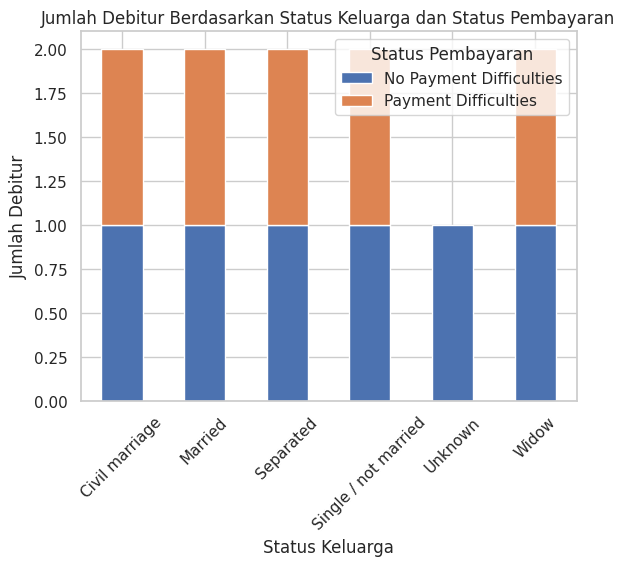

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat bar plot
plt.figure(figsize=(14, 6))
# Use column names 0 and 1 instead of 'No Payment Difficulties' and 'Payment Difficulties'
summary[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Jumlah Debitur Berdasarkan Status Keluarga dan Status Pembayaran')
plt.xlabel('Status Keluarga')
plt.ylabel('Jumlah Debitur')
plt.xticks(rotation=45)
# Update legend labels to reflect the actual column names
plt.legend(title='Status Pembayaran', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

Data Dari Visualisasi diatas menunjukan bahwa Seseorang yang sudah menikah Mempunyai jumlah debitur paling banyak atau peminjam paling banyak yaitu berjumlah 181.525 orang mudah dalam hal pembayaran karean financial sudah cukup untuk membayar hutang,berbalik dengan yang mempunyai status single atau belum menikah mereka berjumlah 40.987 lebih sedikit jumlahnya dibandingan dengan yang sudah menikah dalam hal peminjaman atau debitur,tetapi kesulitan dalam hal pembayaran. Sedangkan dengan status janda merak cukup mempunyai proposi yang tinggi yaitu berjumlah 15.151 tetapi mereka paling banyak atau persentase kesulitan paling tinggi untuk melakukan pembayran hutang.

Dalam hal ini terdapat hubungan erat antara status keluarga dengan target debitur yang akan kita jadikan sebuah pemasukan dalam perusahaan. Maka dari itu status keluarga dengan risiko adanya kegagalan dalam hal membayar hutang baik individu yang sudah menikah secara sah atau tidak memiliki kecenderungan lebih rendal gagal bayar.

Ide Bisnis nya : Perusahaan harus lebih berhati hati dalam menarjetkan debitur karena itu secara langsung mempengaruhi kemajuan atau keuntungan perusahaan dalam hal memberikan pinjaman online kepada indidvidu yang sudah bercerai atau status janda dan lajang karena mereka memiliki risiko kegagalan dalam hal pembayaran.

In [ ]:
df_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

NAME_FAMILY_STATUS    TARGET
0        Civil marriage  0.099446
3  Single / not married  0.098077
2             Separated  0.081942
1               Married  0.075599
5                 Widow  0.058242
4               Unknown  0.000000

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the correct data file into a new DataFrame
# Make sure the file path and separator are correct
df_train = pd.read_csv('/content/application_train.csv', sep=',', on_bad_lines='skip')

# Check if 'AMT_INCOME_TOTAL' is in the columns, if not, handle the error
if 'AMT_INCOME_TOTAL' in df_train.columns:
    # Create the histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train['AMT_INCOME_TOTAL'], bins=30)
    plt.title('Distribution of Total Income')
    plt.xlabel('Total Income')
    plt.ylabel('Frequency')
    plt.show()

    # Create a box plot to visualize income distribution by target variable (if available)
    if 'TARGET' in df_train.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_train)
        plt.title('Total Income Distribution by Target Variable')
        plt.xlabel('Target Variable')
        plt.ylabel('Total Income')
        plt.show()
    else:
        print("Column 'TARGET' not found for box plot visualization.")

else:
    print("Column 'AMT_INCOME_TOTAL' not found in the DataFrame.")
    # Handle the error, e.g., by skipping the plot or using a different column

Column 'AMT_INCOME_TOTAL' not found in the DataFrame.


In [ ]:
df = pd.read_csv('/content/bureau.csv')

In [ ]:
df.head(3)

SK_ID_CURR;SK_ID_BUREAU;CREDIT_ACTIVE;CREDIT_CURRENCY;DAYS_CREDIT;CREDIT_DAY_OVERDUE;DAYS_CREDIT_ENDDATE;DAYS_ENDDATE_FACT;AMT_CREDIT_MAX_OVERDUE;CNT_CREDIT_PROLONG;AMT_CREDIT_SUM;AMT_CREDIT_SUM_DEBT;AMT_CREDIT_SUM_LIMIT;AMT_CREDIT_SUM_OVERDUE;CREDIT_TYPE;DAYS_CREDIT_UPDATE;AMT_ANNUITY
0  215354;5714462;Closed;currency 1;-497;0;-153.0...                                                                                                                                                                                                                                            
1  215354;5714463;Active;currency 1;-208;0;1075.0...                                                                                                                                                                                                                                            
2  215354;5714464;Active;currency 1;-203;0;528.0;...

## Housing Type, Occupation Type, Process Day, and Organization Type Housing Type Vs Target

In [ ]:
ht = train.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Housing Type


In [ ]:
df_train[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

NAME_HOUSING_TYPE    TARGET
4     Rented apartment  0.119205
5         With parents  0.118590
2  Municipal apartment  0.077029
0      Co-op apartment  0.076923
1    House / apartment  0.075854
3     Office apartment  0.062112

Text(0.5, 0, '\nHousing Type')

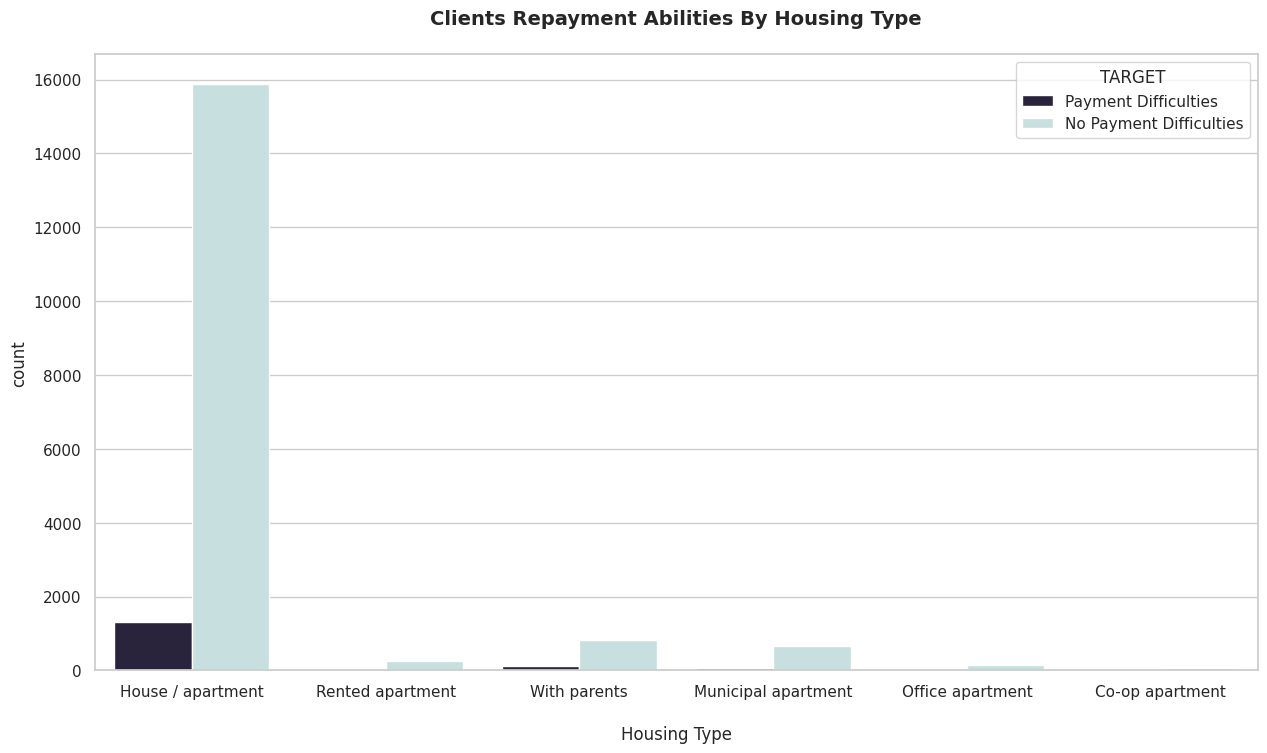

In [ ]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Dari plot show diatas kita dapat menyimpulkan yaitu
1. House / apartement menunjukkan bahwa memliki jumlah sekitar 15.000 peminjam atau debitur terbanyak tetapi mempunyai probabilitas gagal yang rendah prosentasenya sekitar 7,5 % dan sisanya memiliki probabilitas gagal bayar  yang tinggi berjumlah 1500 peminjam
2. Rented apartemen menunjukan bahwa memiliki jumlah debitur sekitar 3000 peminjam atau debitur yang terbanyak tetapi mempunyai probabilitas yang rendah yang prosentasenya sekitar 11,9% artinya tidak mempunyai riwayat kesulitan dalam hal pembayaran,sedangkan yang mempunyai riwayat mempunyai probabilitas gagal bayar yang tinggi hanya sekitar 500 peminjam
3. Memiliki probabilitas gagal bayar yang sangat tinggi (11.86%), menunjukkan bahwa individu yang tinggal dengan orang tua juga berisiko tinggi.
4. Municipal Apartement Memiliki probabilitas gagal bayar yang lebih rendah (7.70%) dibandingkan dengan dua kategori sebelumnya.
5. Office apartemen Memiliki probabilitas gagal bayar terendah (6.21%).
6. CO-OP Apartement  Memiliki probabilitas gagal bayar yang sedikit lebih rendah (7.69%).

## Occupation Type Vs Target

In [ ]:
ot = train.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Occupation Type


In [ ]:
df_train[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

OCCUPATION_TYPE    TARGET
9                 9  0.148148
1                 1  0.127907
2                 2  0.104348
4                 4  0.098901
16               16  0.096000
14               14  0.091195
12               12  0.090909
11               11  0.082840
8                 8  0.073927
6                 6  0.071429
13               13  0.066667
10               10  0.066489
15               15  0.062500
3                 3  0.058608
0                 0  0.057292
17               17  0.047619
7                 7  0.000000
5                 5  0.000000

Terlihat bahwa klien dengan jenis pekerjaan Pekerja Berketerampilan Rendah mempunyai persentase tertinggi (sekitar 14%) dari TARGET = 1, yaitu. mengalami kesulitan dalam membayar kembali pinjamannya.

## Process Day Vs Target

In [ ]:
pt = train.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
pt.sort_values(by='SK_ID_CURR', ascending=False)
pt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Process Day


In [ ]:
df_train[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

WEEKDAY_APPR_PROCESS_START    TARGET
3                     SUNDAY  0.084066
4                   THURSDAY  0.083307
1                     MONDAY  0.082099
2                   SATURDAY  0.081412
6                  WEDNESDAY  0.078480
5                    TUESDAY  0.072991
0                     FRIDAY  0.072423

Text(0.5, 0, '\nProcess Day')

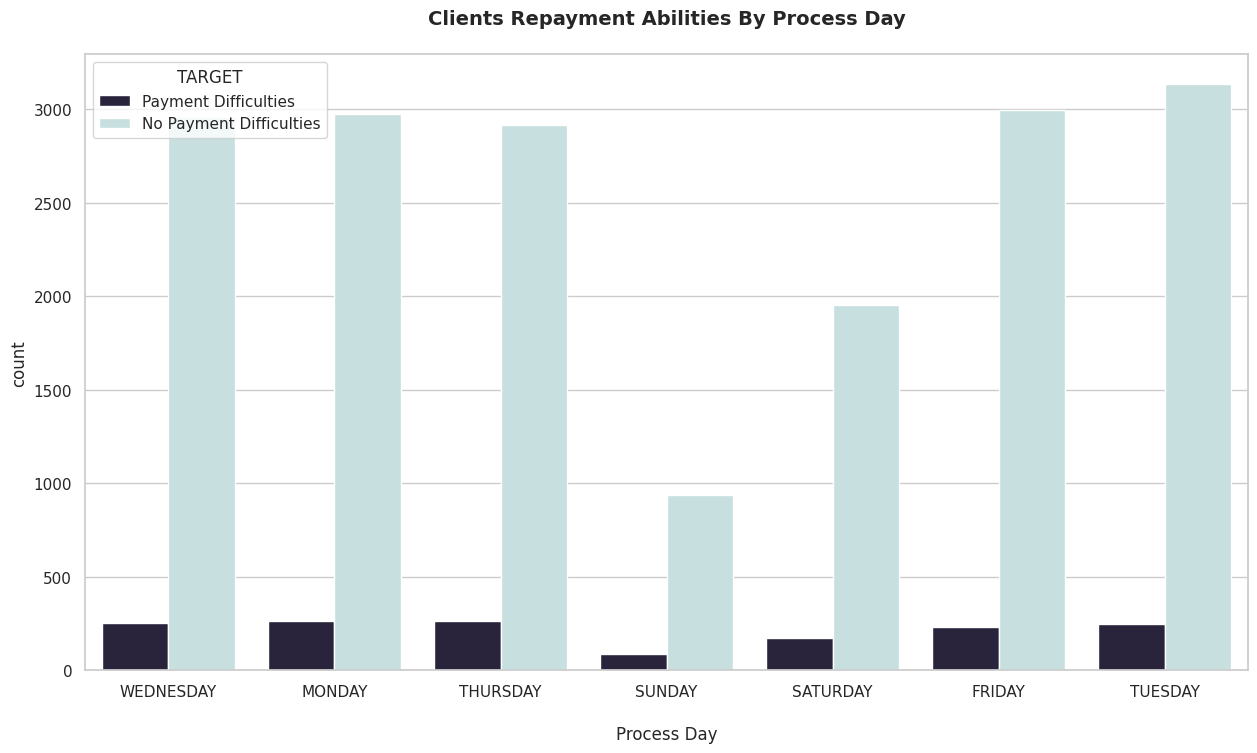

In [ ]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = train, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

1. SUNDAY: Memiliki probabilitas gagal bayar tertinggi (8.41%), menunjukkan bahwa aplikasi yang dimulai pada hari 2. Minggu lebih berisiko untuk gagal bayar.
2. THURSDAY: Memiliki probabilitas gagal bayar yang sedikit lebih rendah (8.33%).
3. MONDAY: Memiliki probabilitas gagal bayar (8.21%) yang juga cukup tinggi.
4. SATURDAY: Memiliki probabilitas gagal bayar (8.14%).
WEDNESDAY: Memiliki probabilitas gagal bayar (7.85%).
5. TUESDAY: Memiliki probabilitas gagal bayar terendah (7.30%).
6. FRIDAY: Memiliki probabilitas gagal bayar yang sangat rendah (7.24%).

- Insight 1: Terdapat perbedaan dalam risiko gagal bayar berdasarkan hari aplikasi dimulai. Aplikasi yang dimulai pada akhir pekan (SUNDAY dan SATURDAY) menunjukkan risiko yang lebih tinggi.
- Insight 2: Aplikasi yang dimulai pada hari kerja, terutama pada TUESDAY dan FRIDAY, menunjukkan risiko yang lebih rendah untuk gagal bayar.

Ide Bisnis atau rekomendasi Bisnis :
-  Perusahaan harus mempertimbangkan hari dalam minggu saat aplikasi dimulai sebagai salah satu faktor dalam penilaian risiko saat memberikan pinjaman. Aplikasi yang dimulai pada akhir pekan mungkin memerlukan perhatian lebih.
- Lakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi perbedaan risiko berdasarkan hari aplikasi dimulai. Ini dapat membantu dalam pengambilan keputusan yang lebih baik.


## Organization Type VS Target

In [ ]:
import pandas as pd

# Assuming 'df_train' is already defined and contains the data
# Load the data if it's not already loaded
df_train = pd.read_csv('/content/application_train.csv', sep=',', on_bad_lines='skip')

# Create a copy of 'df_train' and assign it to 'train'
train = df_train.copy()

# Now you can use 'train' in your code
tt = train.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
tt.sort_values(by='SK_ID_CURR', ascending=False)
tt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


Clients Repayment Abilities By Suite Type


In [ ]:
df_train[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

ORGANIZATION_TYPE    TARGET
0              Advertising  0.285714
18       Industry: type 13  0.250000
14        Industry: type 1  0.238095
40                Security  0.183673
17       Industry: type 12  0.181818
45           Trade: type 1  0.166667
20        Industry: type 3  0.156250
47           Trade: type 3  0.142857
13                 Housing  0.126761
19        Industry: type 2  0.125000
9              Electricity  0.117647
21        Industry: type 4  0.111111
29          Legal Services  0.111111
55       Transport: type 4  0.109890
3   Business Entity Type 1  0.106383
16       Industry: type 11  0.100000
24        Industry: type 7  0.095238
5   Business Entity Type 3  0.093041
51           Trade: type 7  0.091667
1              Agriculture  0.090909
54       Transport: type 3  0.086957
2                     Bank  0.086957
42           Self-employed  0.086275
50           Trade: type 6  0.083333
34                  Police  0.081081
43                Services  0.080000
27               Insurance  0.076923
30                Medicine  0.075472
35                  Postal  0.073171
53       Transport: type 2  0.070175
39                  School  0.065789
46           Trade: type 2  0.064516
33                   Other  0.060423
57                     XNA  0.058095
11              Government  0.055838
41     Security Ministries  0.055556
7             Construction  0.043860
56              University  0.043478
38              Restaurant  0.040000
4   Business Entity Type 2  0.038043
28            Kindergarten  0.035714
26        Industry: type 9  0.034483
31                Military  0.022222
32                  Mobile  0.000000
6                 Cleaning  0.000000
15       Industry: type 10  0.000000
10               Emergency  0.000000
8                  Culture  0.000000
52       Transport: type 1  0.000000
23        Industry: type 6  0.000000
49           Trade: type 5  0.000000
48           Trade: type 4  0.000000
22        Industry: type 5  0.000000
25        Industry: type 8  0.000000
44                 Telecom  0.000000
37                Religion  0.000000
36                 Realtor  0.000000
12                   Hotel  0.000000

Terlihat bahwa klien dengan jenis transportasi organisasi: tipe 3 memiliki persentase tertinggi (sekitar 15%) dari TARGET = 1, yaitu. mengalami kesulitan dalam membayar kembali pinjamannya.

## Bivaret Numerical Target Vs Target

### Amount Credit Of the loan VS Target

<ipython-input-12-d45e8e50a19e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette = 'ch:start=0.2,rot=-.3_r')


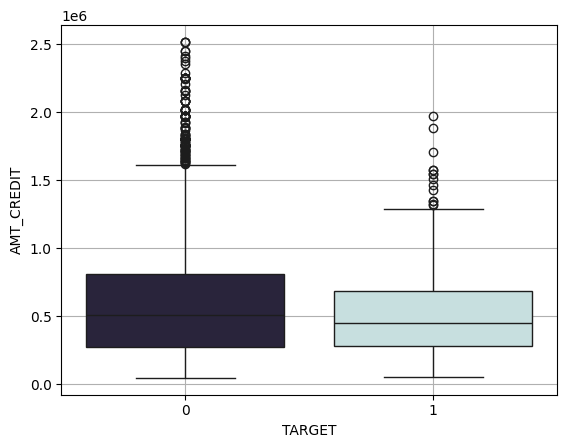

In [ ]:
import seaborn as sns # This line imports the seaborn library and assigns it the alias 'sns'
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is also imported

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=train, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Terlihat bahwa nilai median jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih besar dibandingkan dengan nilai median nasabah yang mengalami kesulitan pembayaran. Artinya, nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang sedikit lebih tinggi untuk mampu membayar kembali pinjamannya dibandingkan nasabah dengan jumlah kredit yang lebih rendah.


### Amount Income VS Target

<ipython-input-13-fcbdbe54d106>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette = 'ch:start=0.2,rot=-.3_r')


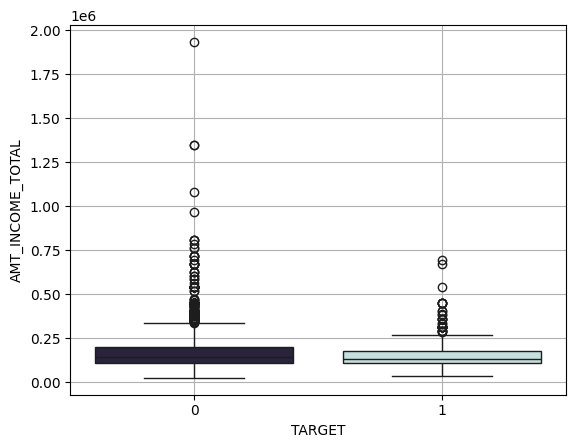

In [ ]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Terlihat bahwa baik klien yang mengalami kesulitan pembayaran maupun klien yang tidak mengalami kesulitan pembayaran, sebagian besar mempunyai nilai yang sama. Namun, seiring dengan meningkatnya pendapatan nasabah, kemungkinan klien tidak mengalami kesulitan dalam membayar kembali pinjamannya juga meningkat.


### Age Vs Target

In [ ]:
no_age = df_train[df_train['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/-365

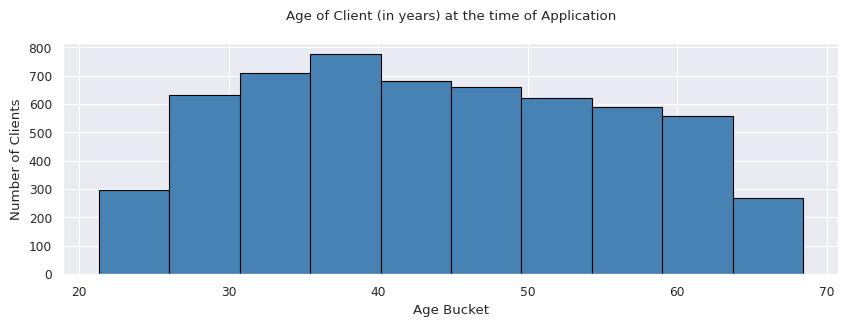

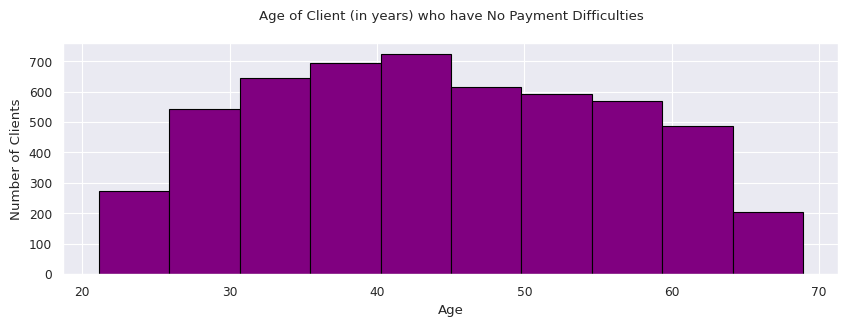

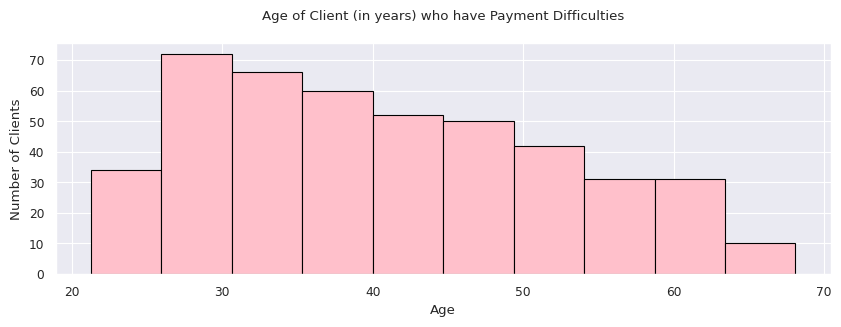

In [134]:
plt.figure(figsize=(10,3))
plt.hist(df_train['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='purple')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='pink')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Jumlah nasabah yang mengajukan pinjaman terbanyak berada pada rentang usia 35-40 tahun, disusul nasabah pada rentang usia 40-45 tahun. Sementara itu, jumlah pelamar untuk klien berusia <25 atau >65 tahun sangat sedikit.

Klien yang tidak mengalami kesulitan pembayaran adalah klien rentang 35-45 tahun. Sedangkan klien yang mengalami kesulitan pembayaran adalah klien rentang 25-35 tahun.


## Multivariat Variabel

### Grouped by Realty Ownership Status

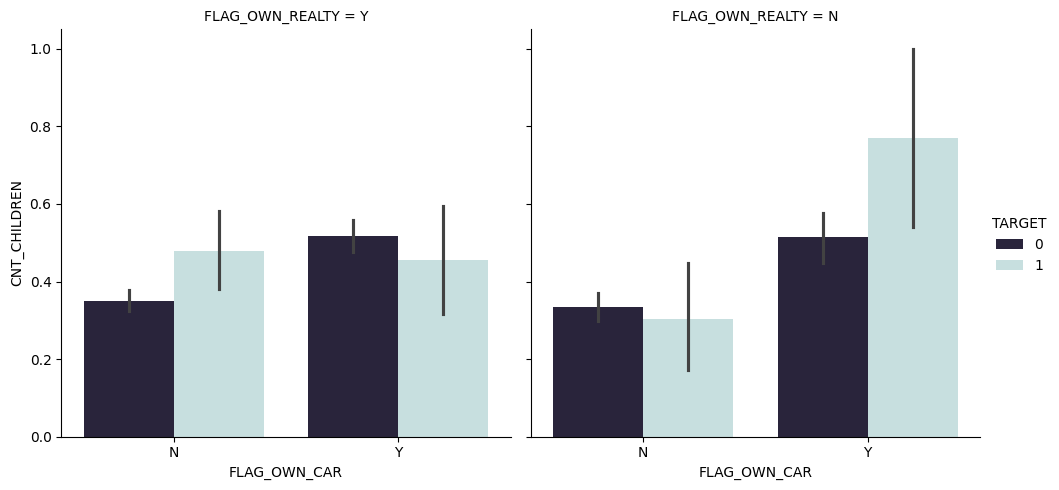

In [ ]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)
plt.show()

Nasabah yang mempunyai mobil dan rumah/rumah susun memiliki permasalahan dalam membayar cicilan anak dalam jumlah yang banyak dibandingkan dengan nasabah yang tidak memiliki rumah/rumah susun.


### Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

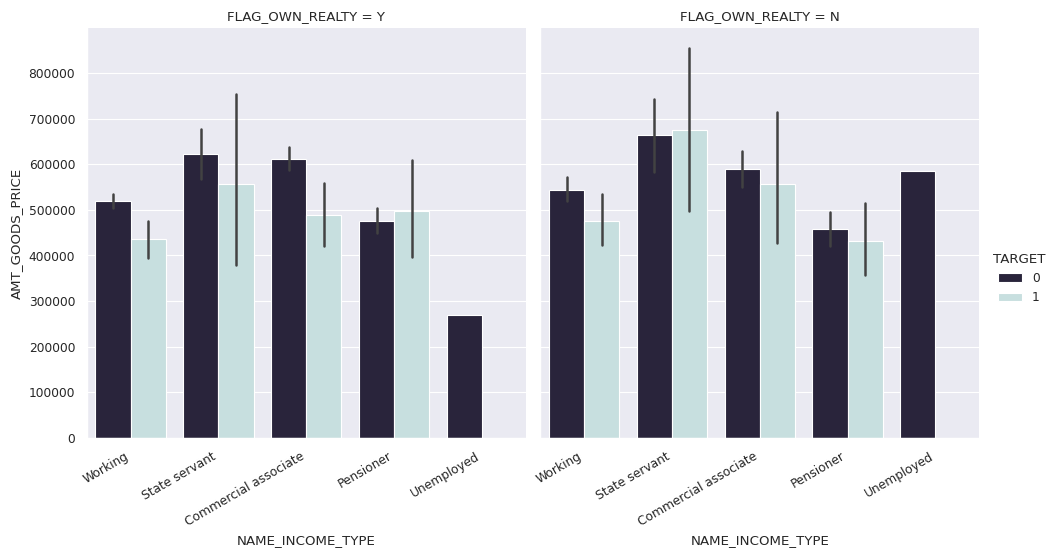

In [135]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=30, horizontalalignment='right')
plt.show()

Klien dengan jenis cuti hamil berpenghasilan di FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/flat) mengalami kesulitan dalam membayar pinjaman dibandingkan ketika FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/flat).

### Family Status, Amount of Income, Target, and House/Flat Ownership Status

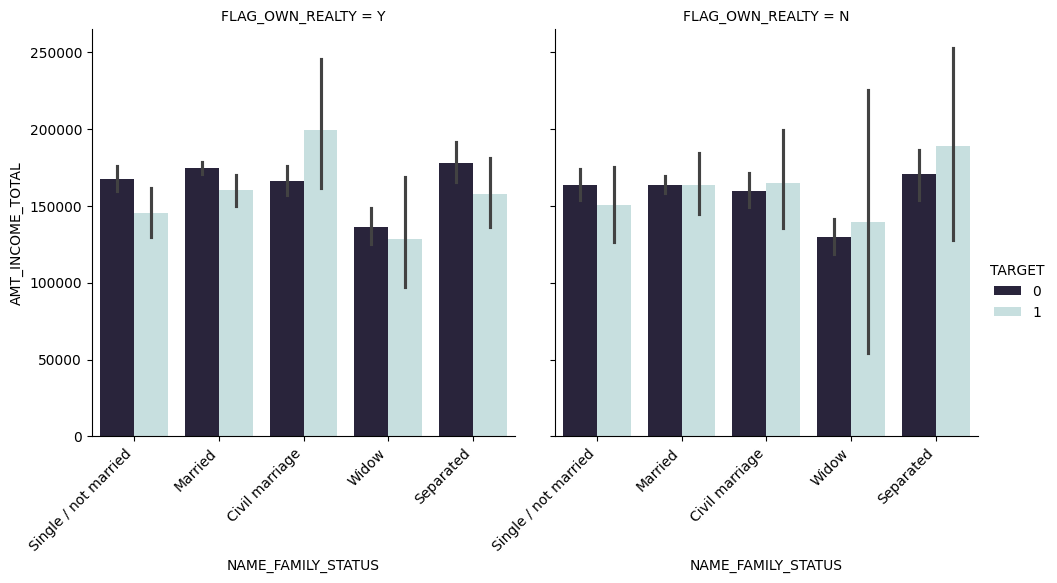

In [ ]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
#train.groupby(by=['NAME_FAMILY_STATUS','FLAG_OWN_REALTY', 'TARGET'], as_index=False)['AMT_INCOME_TOTAL'].mean()

Nasabah yang sudah berkeluarga dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) mengalami kesulitan dalam melunasi pinjaman dengan pendapatan menengah dibandingkan saat klien tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

## Grouped by Car Ownership Status

### Contract Type, The Number of Children, Target, and Car Ownership Status

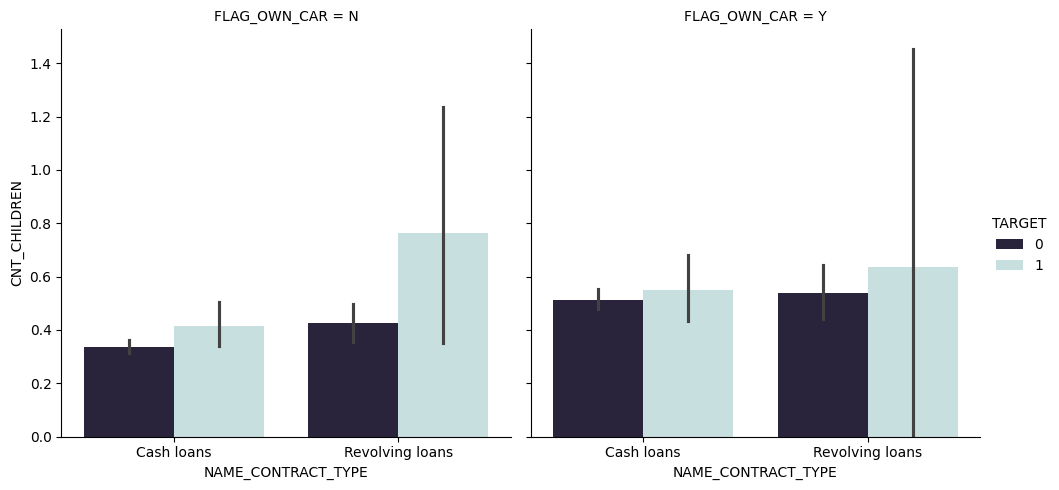

In [ ]:
sns.catplot(x = 'NAME_CONTRACT_TYPE',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_CAR',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)
plt.show()

Untuk pinjaman bergulir di FLAG_OWN_CAR = Tidak (yaitu tidak memiliki mobil) mengalami kesulitan dalam membayar pinjaman dibandingkan ketika FLAG_OWN_CAR = Ya (yaitu memiliki mobil).


### Grouped by Contract Type

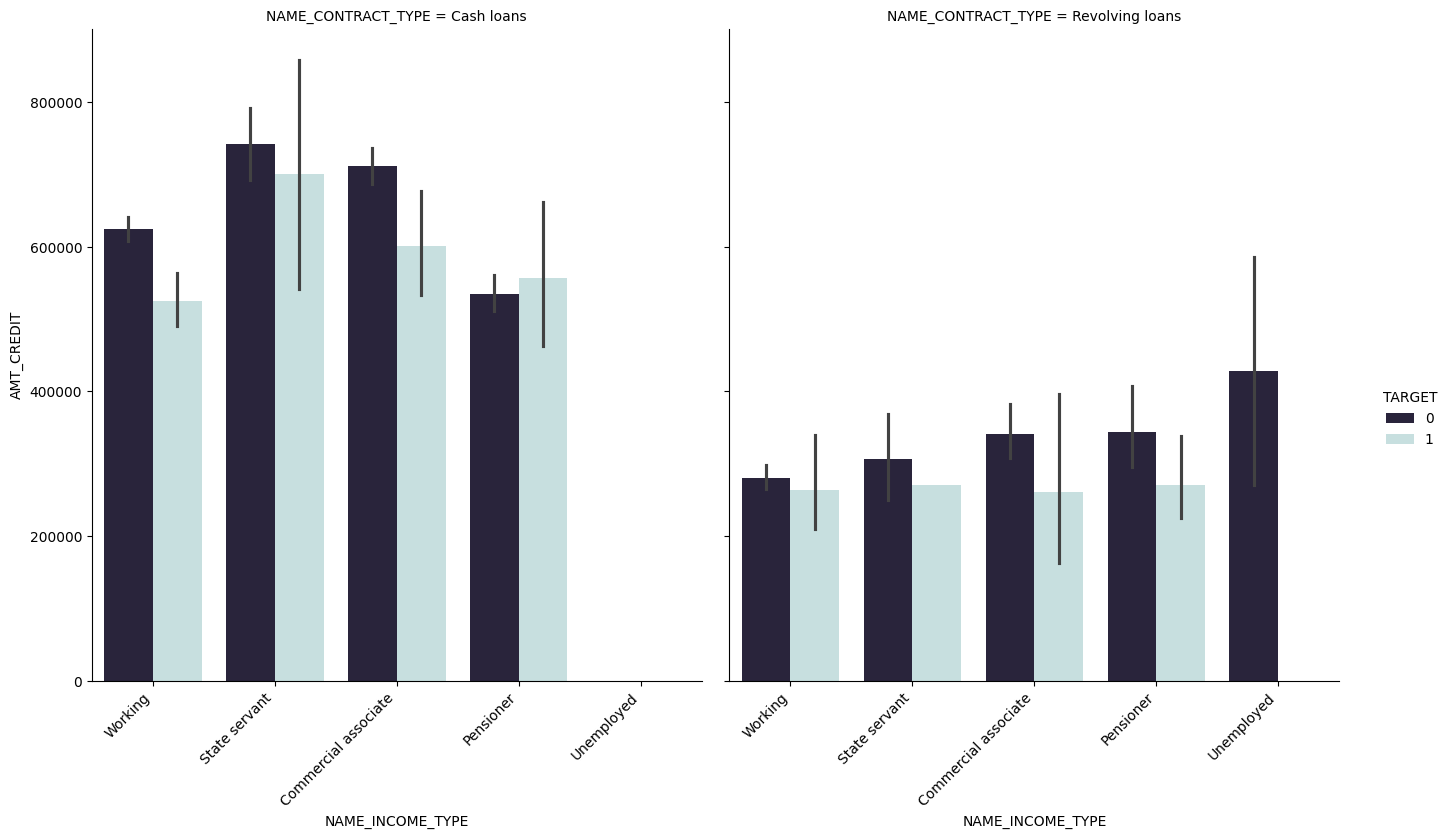

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [ ]:
#train.groupby(by=['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
#train.groupby(by=['NAME_INCOME_TYPE','NAME_CONTRACT_TYPE', 'TARGET'], as_index=False)['AMT_CREDIT'].mean()

Untuk jenis cuti hamil dengan pinjaman tunai, semua klien mengalami kesulitan dalam membayar kembali pinjaman dengan jumlah kredit menengah. Sementara semua klien yang memiliki cuti hamil dan pinjaman bergulir tidak mengalami kesulitan dalam membayar kembali pinjamannya.

Untuk klien yang menganggur dengan pinjaman tunai, lebih dari 50% klien mengalami masalah dalam membayar kembali pinjaman dengan jumlah pinjaman sedang. Sementara semua klien yang menganggur dengan pinjaman bergulir tidak mengalami kesulitan dalam membayar kembali pinjamannya.

Semua klien pelajar tidak mengalami kesulitan dalam membayar kembali pinjaman baik dengan pinjaman tunai atau pinjaman bergulir dengan jumlah pinjaman kredit rendah hingga menengah.


## Grouped by Rating of Region where Client Lives

### Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

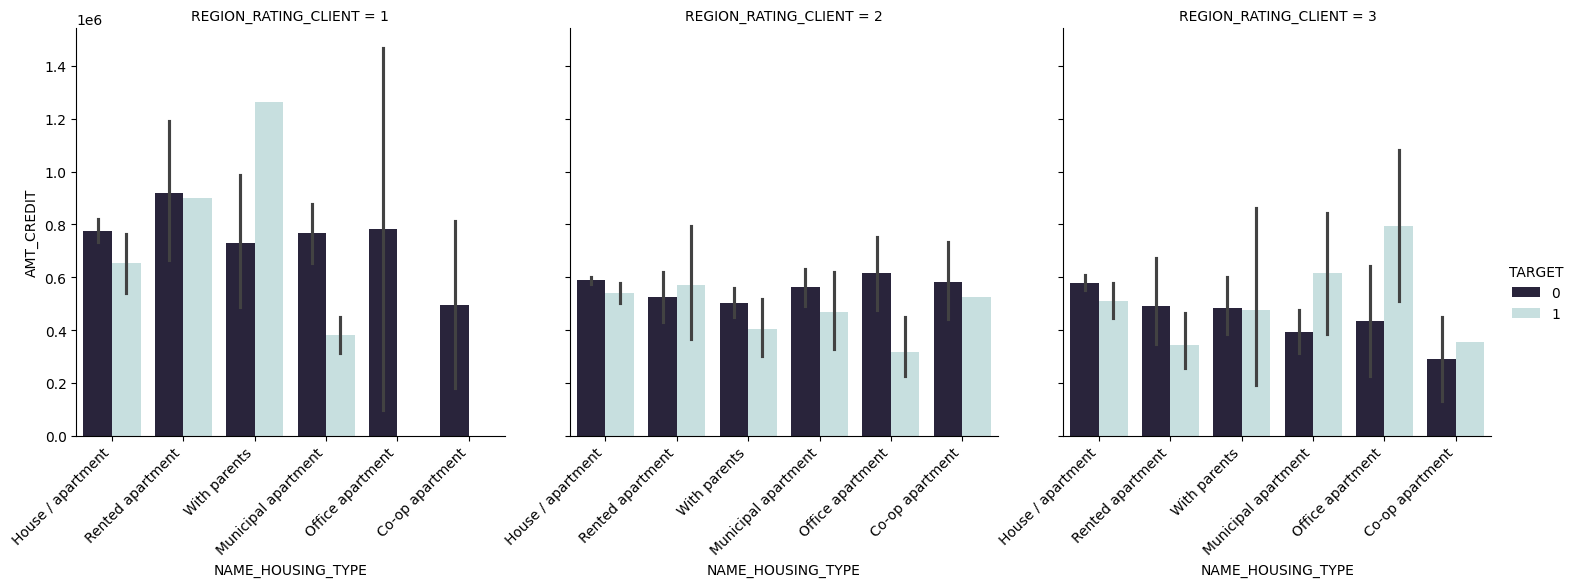

In [ ]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang tinggal di apartemen sewaan dan apartemen perkantoran serta wilayahnya memiliki peringkat 1, memiliki masalah dalam membayar kembali pinjaman dibandingkan dengan klien di wilayah dengan peringkat 2 untuk jumlah pinjaman kredit menengah.

### Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

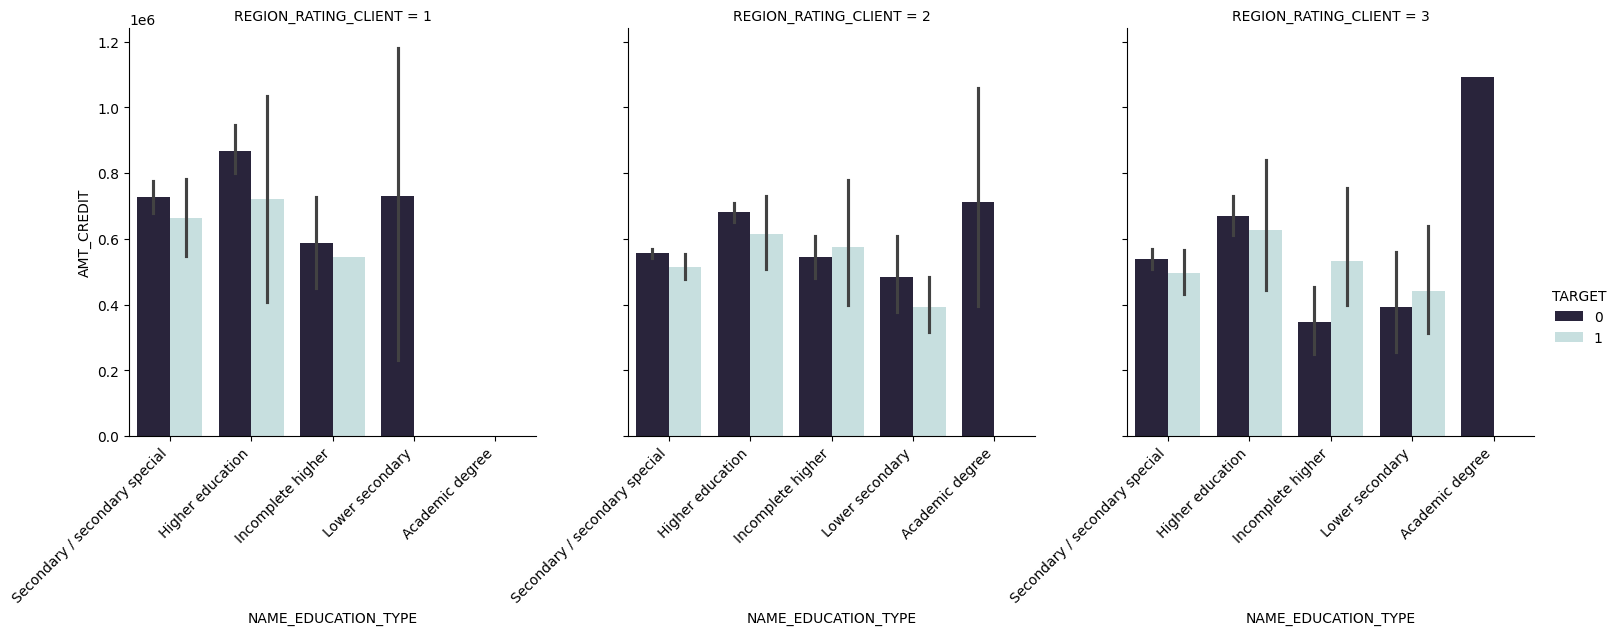

In [ ]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk klien yang memiliki gelar akademik dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang lebih tinggi. Dan, klien dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang sedang.

### Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

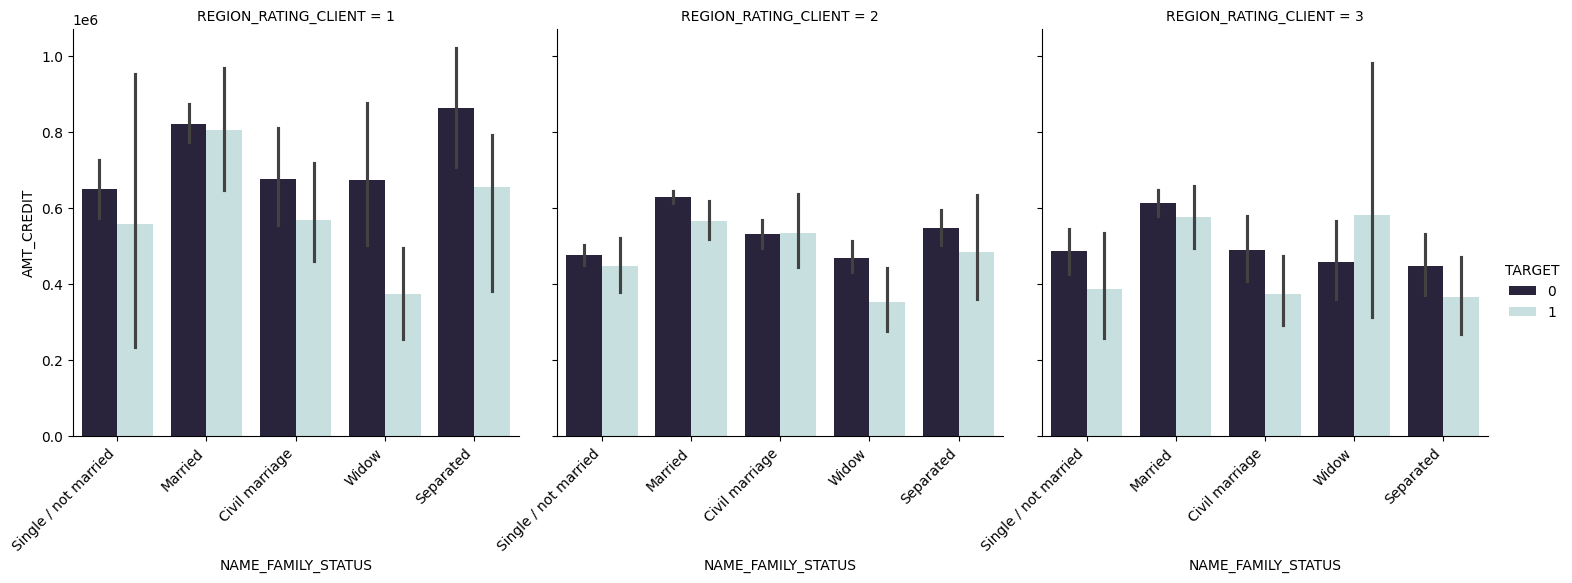

In [ ]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk klien yang memiliki gelar akademik dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang lebih tinggi. Dan, klien dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar kembali pinjaman untuk jumlah kredit pinjaman yang sedang.

# DATA CLEANING

## Detecting Data Duplication

In [ ]:
print('The number of duplication is:', df_train.duplicated().sum())
# there is no duplication

The number of duplication is: 0


## Detecting Missing Values

In [ ]:
# check for empty elements
print('Missing values status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0             COMMONAREA_MODE               3990   68.923821
1              COMMONAREA_AVG               3990   68.923821
2             COMMONAREA_MEDI               3990   68.923821
3    NONLIVINGAPARTMENTS_MODE               3970   68.578338
4     NONLIVINGAPARTMENTS_AVG               3970   68.578338
..                        ...                ...         ...
117        NAME_FAMILY_STATUS                  0    0.000000
118       NAME_EDUCATION_TYPE                  0    0.000000
119          NAME_INCOME_TYPE                  0    0.000000
120               AMT_ANNUITY                  0    0.000000
121                SK_ID_CURR                  0    0.000000

[122 rows x 3 columns]

In [ ]:
# drop features that have large number of missing values (± 50%)
df_train.drop(df_train.iloc[:, 44:91], inplace=True, axis=1)
df_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [ ]:
# after drop some features
print('Missing values status:', df_train.isnull().values.any())
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0              OCCUPATION_TYPE               1795   31.007082
1                 EXT_SOURCE_3               1128   19.485231
2   AMT_REQ_CREDIT_BUREAU_YEAR                779   13.456556
3    AMT_REQ_CREDIT_BUREAU_MON                779   13.456556
4   AMT_REQ_CREDIT_BUREAU_WEEK                779   13.456556
..                         ...                ...         ...
68                 CODE_GENDER                  0    0.000000
69          NAME_CONTRACT_TYPE                  0    0.000000
70                      TARGET                  0    0.000000
71           DAYS_REGISTRATION                  0    0.000000
72                  DAYS_BIRTH                  0    0.000000

[73 rows x 3 columns]

<ipython-input-31-1f7a2c8e7b6e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
<ipython-input-31-1f7a2c8e7b6e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])
<ipython-input-31-1f7a2c8e7b6

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_DAY', ylabel='Density'>

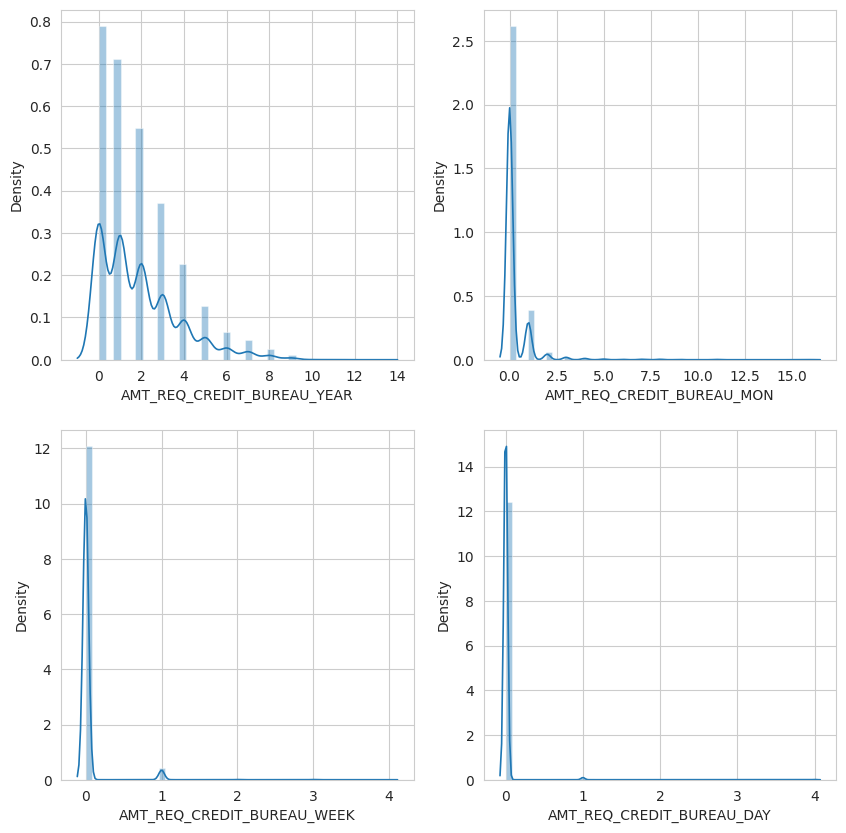

In [ ]:
# distribution of numerical features that have missing values pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

<ipython-input-32-35458342b1a4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])
<ipython-input-32-35458342b1a4>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])
<ipython-input-32-35458342b1a

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

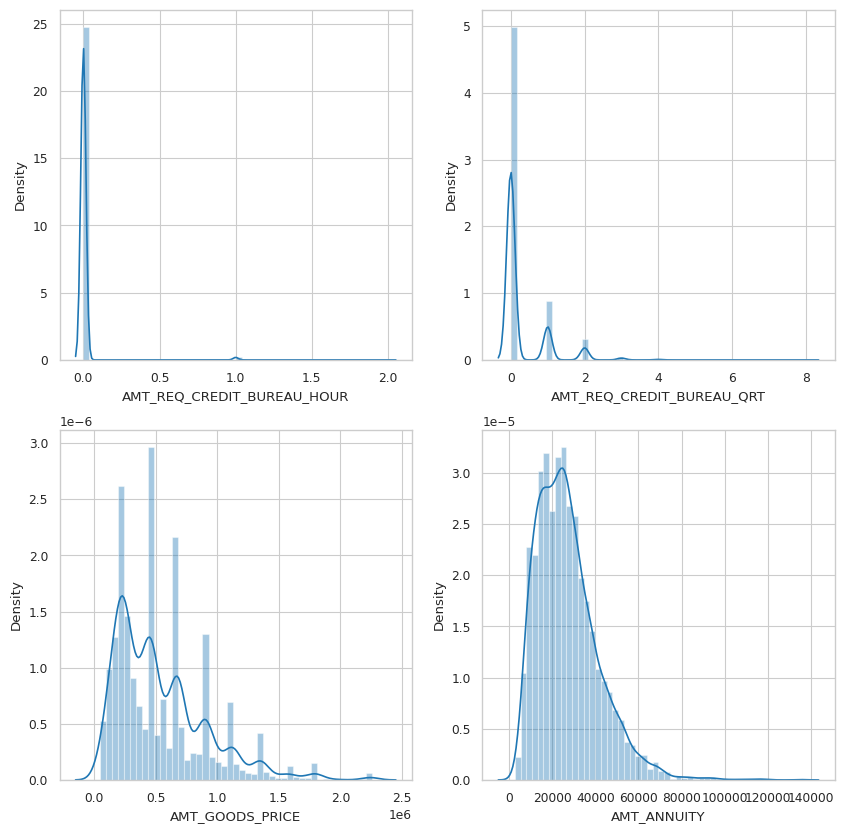

In [ ]:
# distribution of numerical features that have missing values pt.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])

sns.distplot(df_train['AMT_GOODS_PRICE'], ax=ax[1][0])

sns.distplot(df_train['AMT_ANNUITY'], ax=ax[1][1])

<ipython-input-33-bed2f5d7a654>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
<ipython-input-33-bed2f5d7a654>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])
<ipython-input-33-bed2f5d7a654>:

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

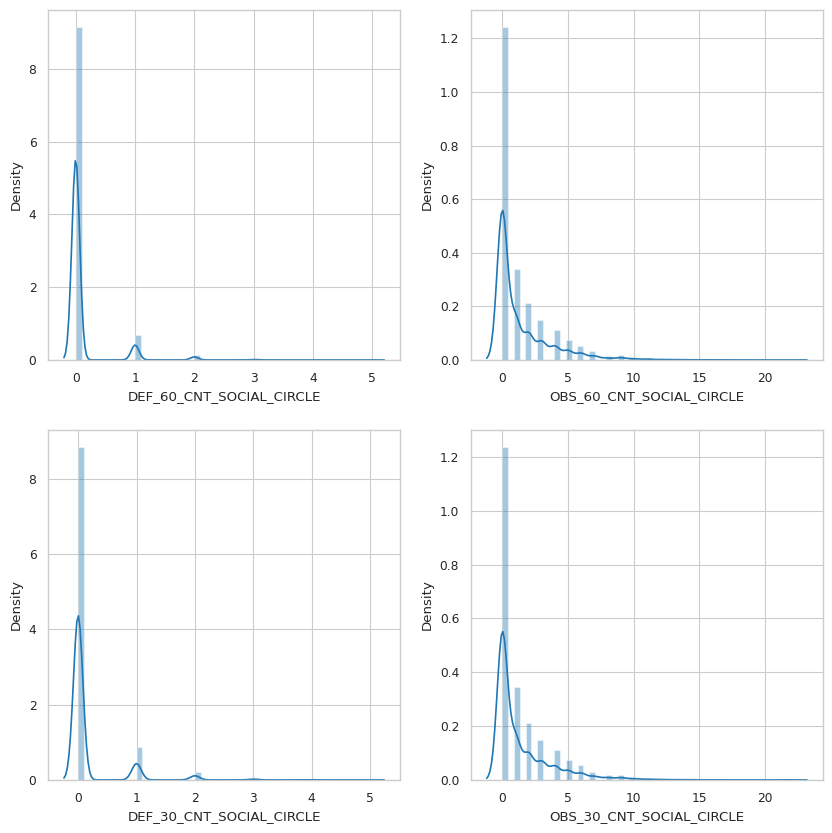

In [ ]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(df_train['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(df_train['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

<ipython-input-34-56256c11fde1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])
<ipython-input-34-56256c11fde1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])


<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

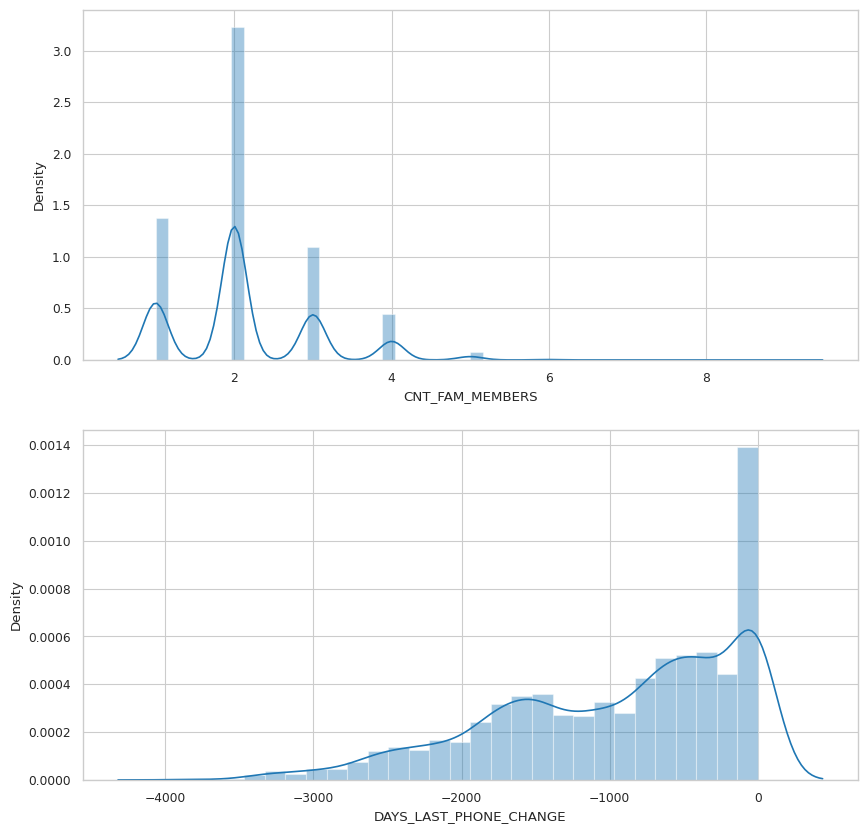

In [ ]:
# distribution of numerical features that have missing values pt.3
sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(df_train['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(df_train['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

Terlihat sebaran ciri-ciri numerik yang disebutkan di atas bersifat miring, sehingga nilai yang hilang pada ciri-ciri tersebut akan diperhitungkan dengan median.

In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_train.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column]=df_train[column].fillna(df_train[column].mode()[0])
        else:
            df_train[column]=df_train[column].fillna(df_train[column].median())

In [ ]:
# after imputation
print('Missing values status:', df_train.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
nvc = pd.DataFrame(df_train.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df_train.shape[0])*100
nvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False

The number of missing values for each columns (after imputation): 



index  Total Null Values  Percentage
0                   SK_ID_CURR                  0         0.0
1   REG_REGION_NOT_WORK_REGION                  0         0.0
2   REGION_POPULATION_RELATIVE                  0         0.0
3             AMT_INCOME_TOTAL                  0         0.0
4                       TARGET                  0         0.0
..                         ...                ...         ...
68            FLAG_DOCUMENT_20                  0         0.0
69            FLAG_DOCUMENT_21                  0         0.0
70  AMT_REQ_CREDIT_BUREAU_HOUR                  0         0.0
71   AMT_REQ_CREDIT_BUREAU_DAY                  0         0.0
72  AMT_REQ_CREDIT_BUREAU_YEAR                  0         0.0

[73 rows x 3 columns]

## Detecting Outliers

In [ ]:
# dataset that only consist numerical features pt.1
int_features = df_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

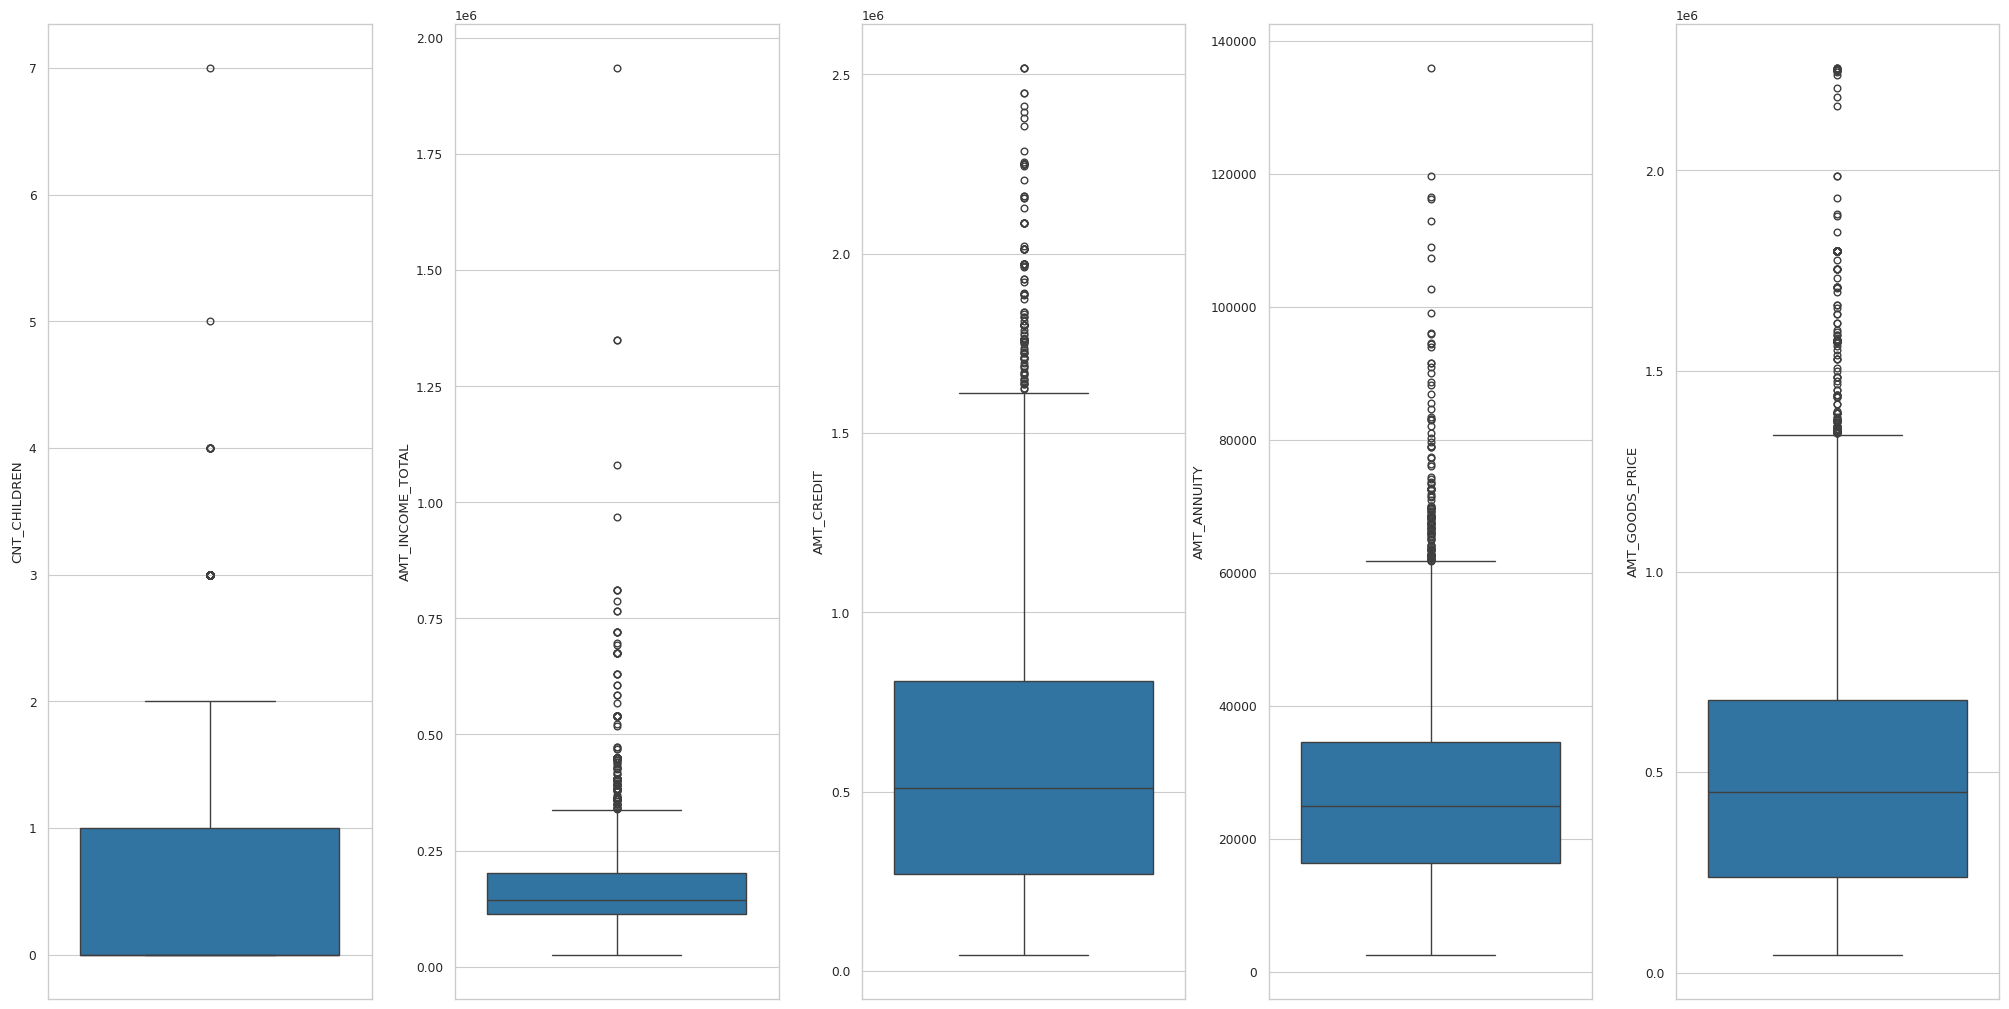

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# dataset that only consist numerical features pt.2
int_features = df_train[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

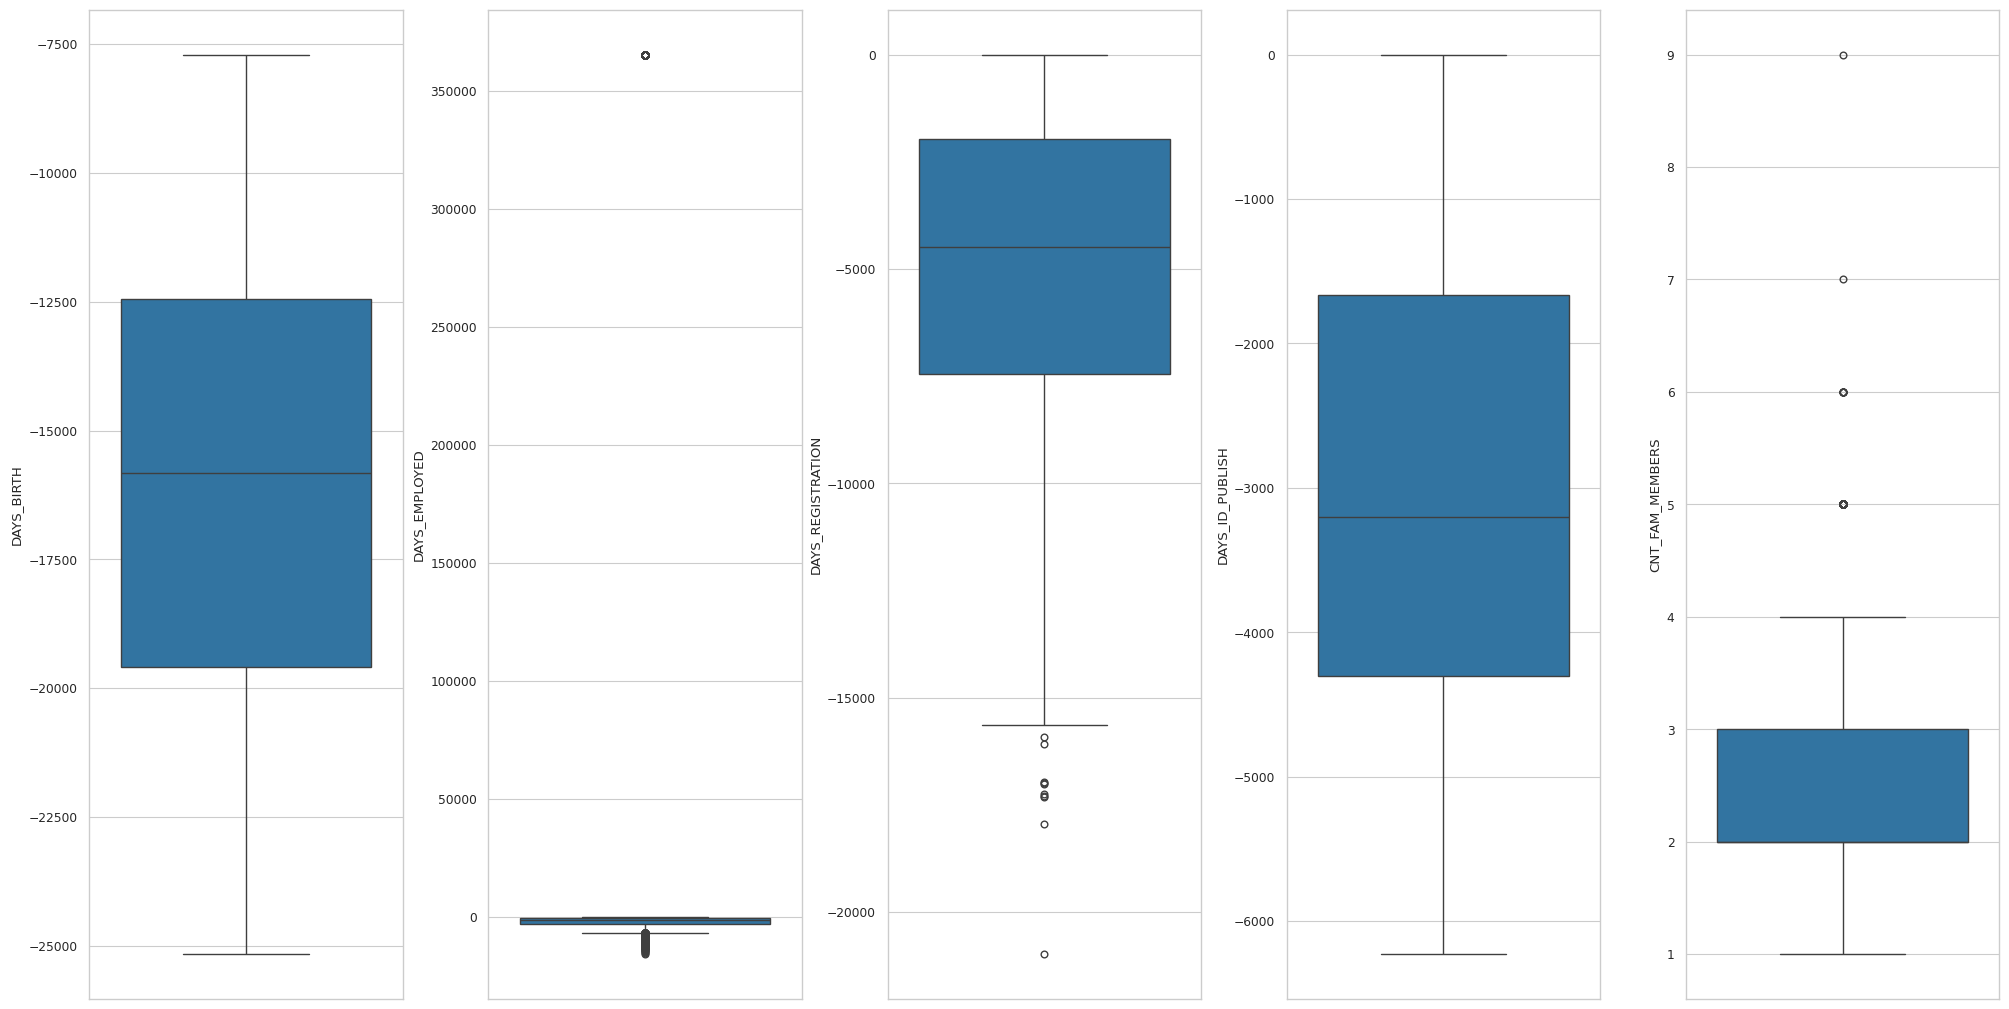

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# dataset that only consist numerical features pt.3
int_features = df_train[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

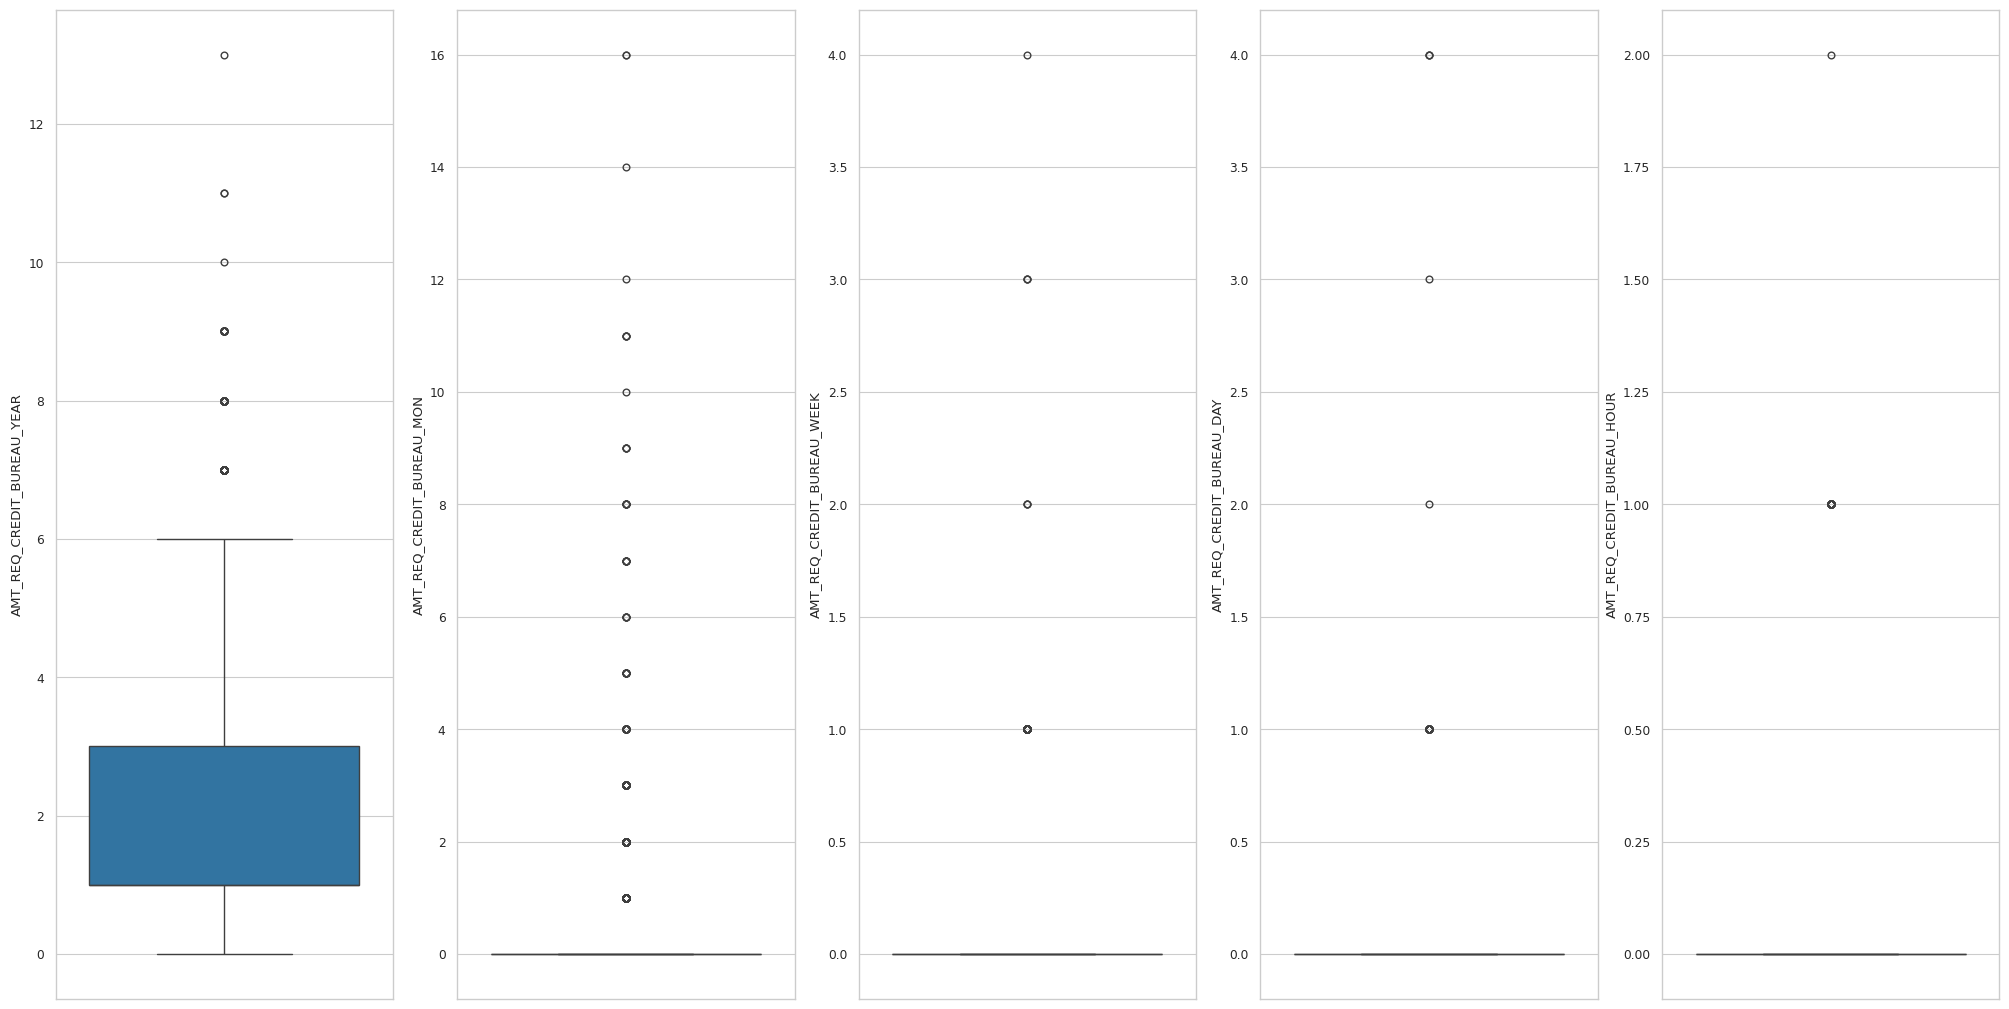

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# dataset that only consist numerical features pt.4
int_features = df_train[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

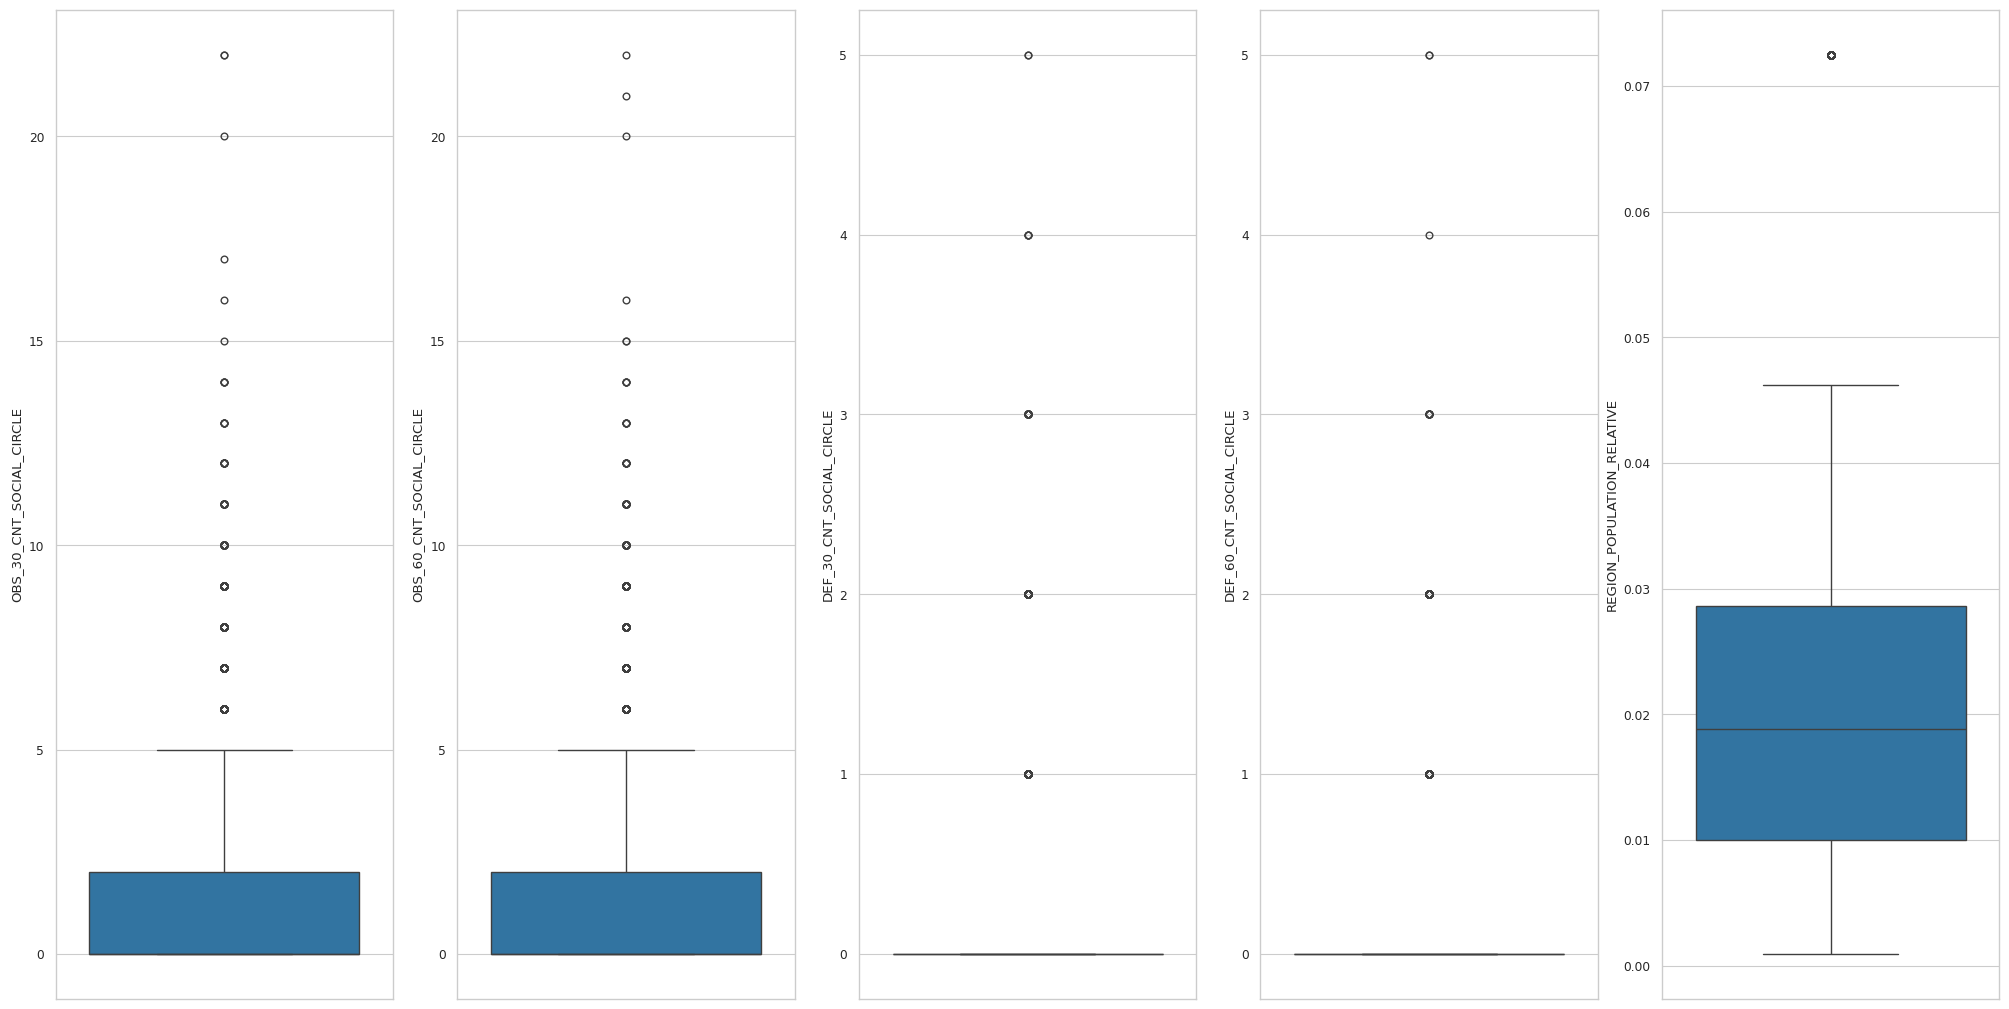

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# dataset that only consist numerical features pt.5
int_features = df_train[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

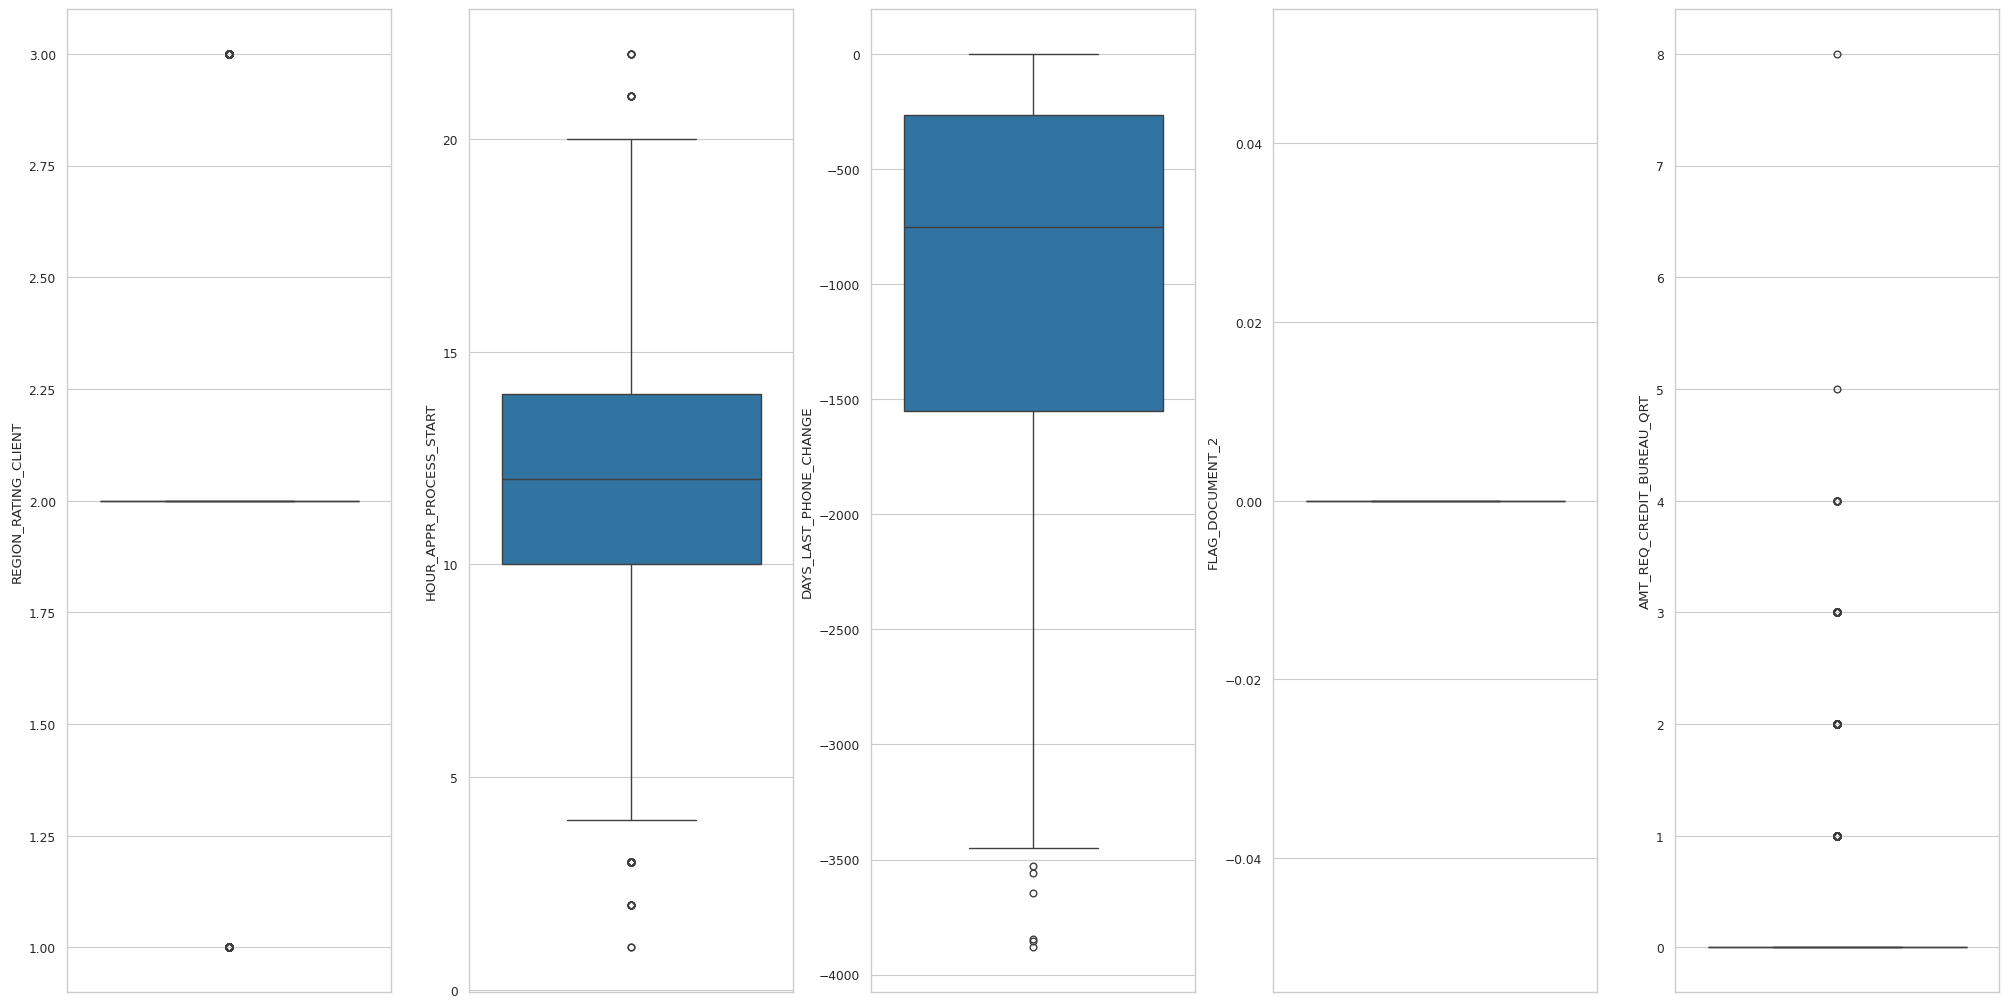

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# MACHINE LEARNING MODELLING

# LABEL ANCODING

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# label encoder for object features
df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_train[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [ ]:
df_train.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...               0.0               0.0               0.0   
1  ...               0.0               0.0               0.0   
2  ...               0.0               0.0               0.0   
3  ...               0.0               0.0               0.0   
4  ...               0.0               0.0               0.0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0               0.0                         0.0                        0.0   
1               0.0                         0.0                        0.0   
2               0.0                         0.0                        0.0   
3               0.0                         0.0                        0.0   
4               0.0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 73 columns]

# FEATURE SELECTION

## Drop Unnecessary Feature

In [ ]:
df_train.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [ ]:
df_train.head()

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   0            1             0                1   
1       0                   0            0             0                0   
2       0                   1            1             1                1   
3       0                   0            0             0                1   
4       0                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...               0.0               0.0               0.0   
1  ...               0.0               0.0               0.0   
2  ...               0.0               0.0               0.0   
3  ...               0.0               0.0               0.0   
4  ...               0.0               0.0               0.0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0               0.0                         0.0                        0.0   
1               0.0                         0.0                        0.0   
2               0.0                         0.0                        0.0   
3               0.0                         0.0                        0.0   
4               0.0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         1.0  
4                        0.0                         0.0  

[5 rows x 72 columns]

## Convert Negative Values to Positive Values

### The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE

In [ ]:
df_train.iloc[:,16:20] = df_train.iloc[:,16:20].abs()
df_train.iloc[:,45] = df_train.iloc[:,45].abs()

# FEATURE SELECTION

In [ ]:
x = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2 # Import the necessary classes

# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10) # Now SelectKBest and chi2 are defined
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



Features         Score
8     AMT_GOODS_PRICE  4.174530e+06
6          AMT_CREDIT  3.425397e+06
16      DAYS_EMPLOYED  2.072912e+06
5    AMT_INCOME_TOTAL  1.160555e+05
17  DAYS_REGISTRATION  4.508756e+04
..                ...           ...
45    FLAG_DOCUMENT_2           NaN
47    FLAG_DOCUMENT_4           NaN
50    FLAG_DOCUMENT_7           NaN
53   FLAG_DOCUMENT_10           NaN
55   FLAG_DOCUMENT_12           NaN

[71 rows x 2 columns]

In [ ]:
!pip install -U scikit-learn
from sklearn.utils import resample # Import the resample function from sklearn.utils

# create two different dataframe of majority and minority class
df_majority = df_train[(df_train['TARGET']==0)]
df_minority = df_train[(df_train['TARGET']==1)]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

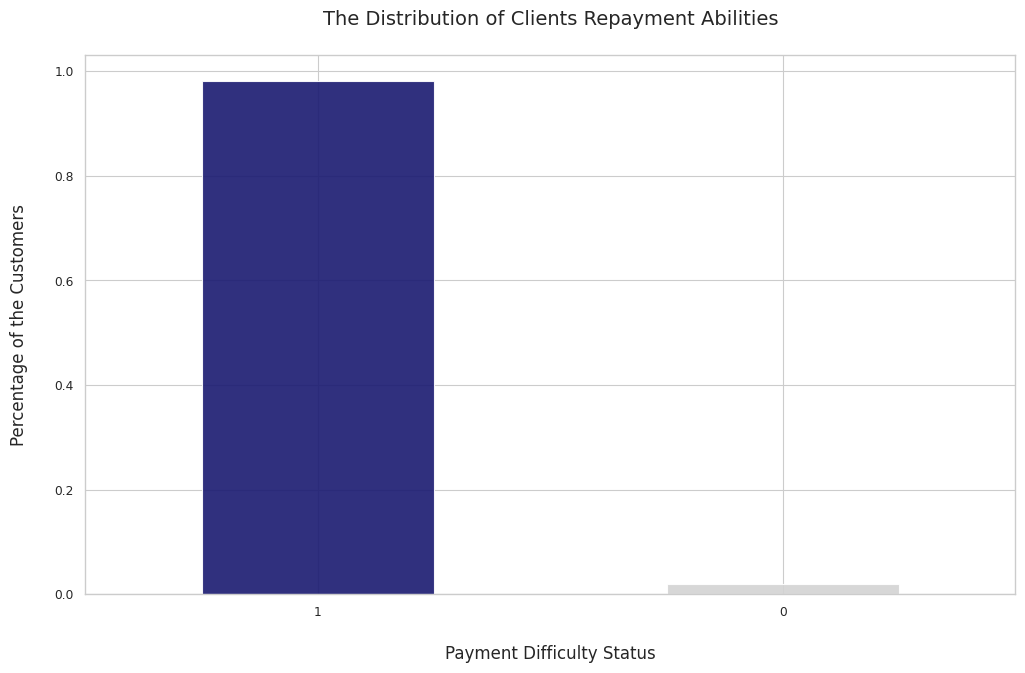

In [ ]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

## Data Splitting

In [ ]:
# define x and y features (top 20 features)
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [ ]:
# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(230421, 20) (57606, 20)


In [ ]:
# Add this import to the beginning of the file/notebook
from sklearn.preprocessing import StandardScaler

# normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# MODEL BUILDING

Here are some algorithms that will be tested to determine the best model:

1.Logistic Regression
2.Gaussian Naive Bayes
3.Decision Tree
4.Random Forest
5.K-Nearest Neighbor
6.Neural Network

## Logistic Regression

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Make sure to import LogisticRegression
from sklearn.linear_model import LogisticRegression

# ... (your existing code) ...

# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


In [ ]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4317
           1       0.98      1.00      0.99    226104

    accuracy                           0.98    230421
   macro avg       0.99      0.50      0.50    230421
weighted avg       0.98      0.98      0.97    230421



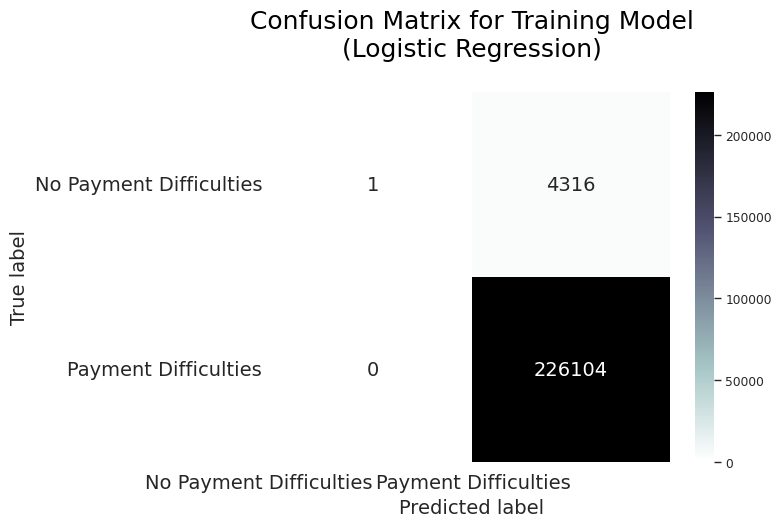

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1024
           1       0.98      1.00      0.99     56582

    accuracy                           0.98     57606
   macro avg       0.49      0.50      0.50     57606
weighted avg       0.96      0.98      0.97     57606



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


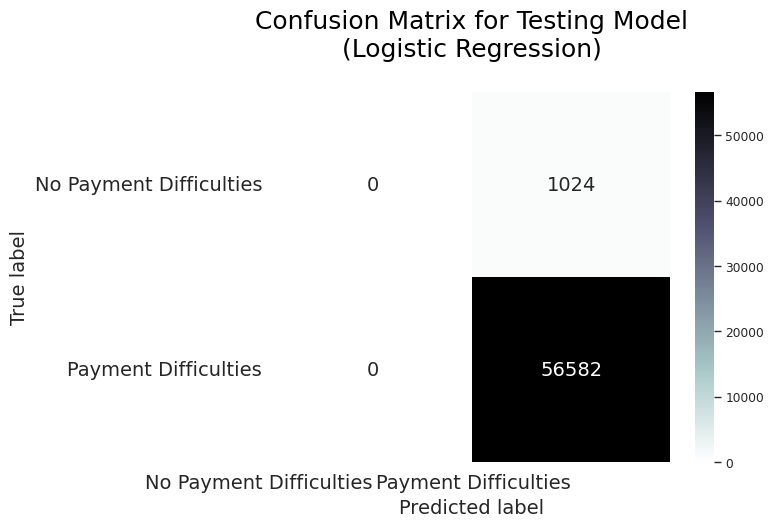

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 98.13
Test Accuracy: % 98.22


In [ ]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.5


## Gaussian Naive Bayes

In [ ]:
# Import the necessary module
from sklearn.naive_bayes import GaussianNB # import GaussianNB

# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

GaussianNB()


In [ ]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.05      0.14      0.07      4317
           1       0.98      0.95      0.96    226104

    accuracy                           0.93    230421
   macro avg       0.52      0.54      0.52    230421
weighted avg       0.97      0.93      0.95    230421



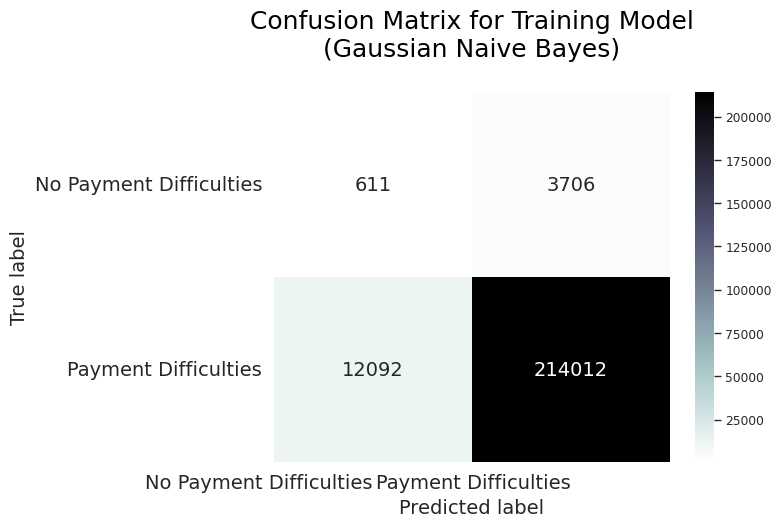

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.05      0.16      0.08      1024
           1       0.98      0.95      0.97     56582

    accuracy                           0.93     57606
   macro avg       0.52      0.55      0.52     57606
weighted avg       0.97      0.93      0.95     57606



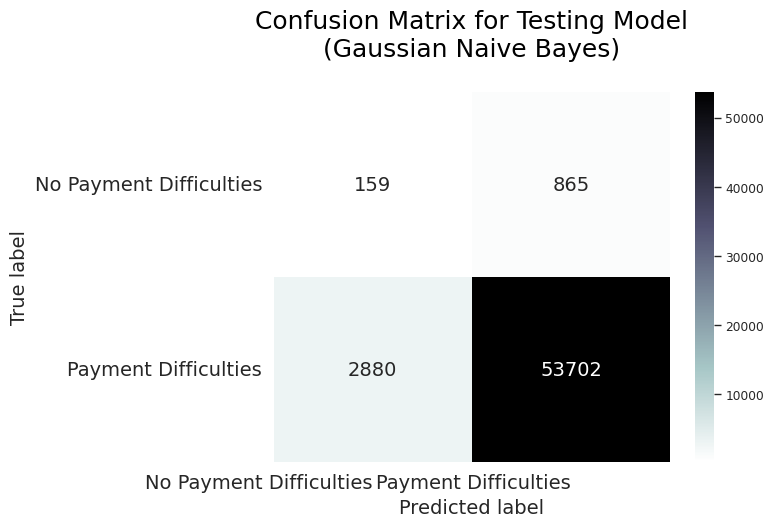

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

Training Accuracy: % 93.14
Test Accuracy: % 93.5


In [ ]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.5522


## Desicision TREE

In [ ]:
# Import necessary library
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model using your training data
dt_model.fit(X_train, y_train)

# Now you can proceed with predictions
y_train_pred_dt = dt_model.predict(X_train)

# ... (rest of your code)

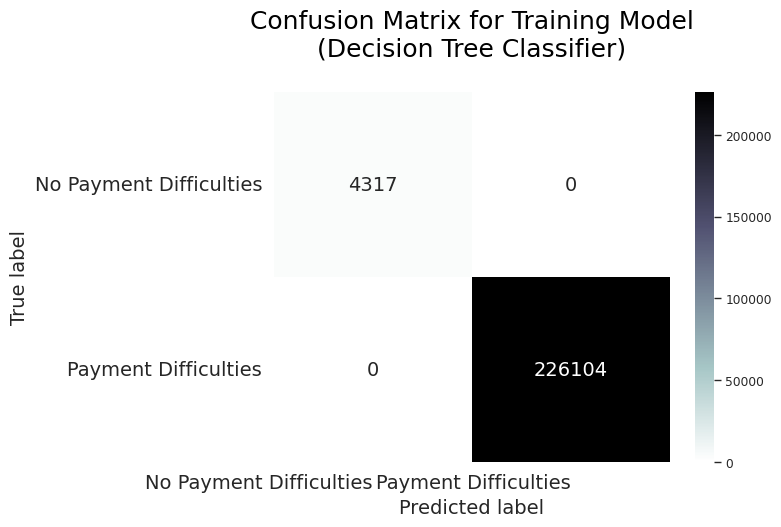

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.09      0.90      0.17      1024
           1       1.00      0.84      0.91     56582

    accuracy                           0.84     57606
   macro avg       0.55      0.87      0.54     57606
weighted avg       0.98      0.84      0.90     57606



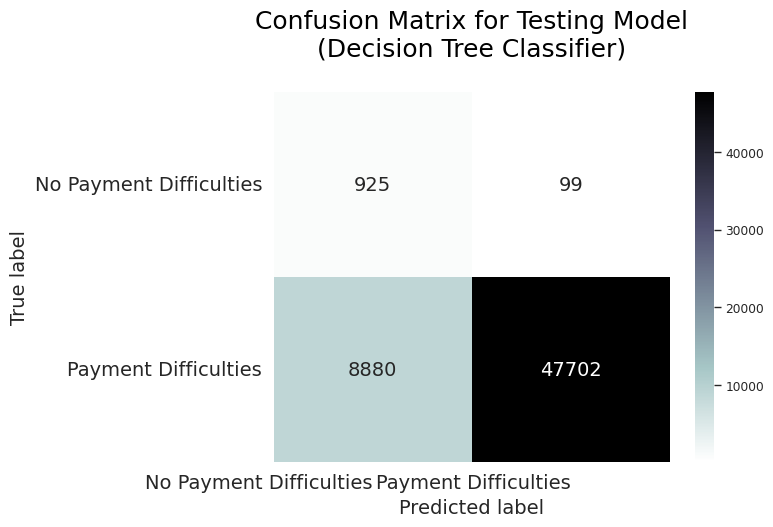

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

Training Accuracy: % 100.0
Test Accuracy: % 84.41


In [ ]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.8732


## Random Forest

In [ ]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [ ]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4317
           1       1.00      1.00      1.00    226104

    accuracy                           1.00    230421
   macro avg       1.00      1.00      1.00    230421
weighted avg       1.00      1.00      1.00    230421



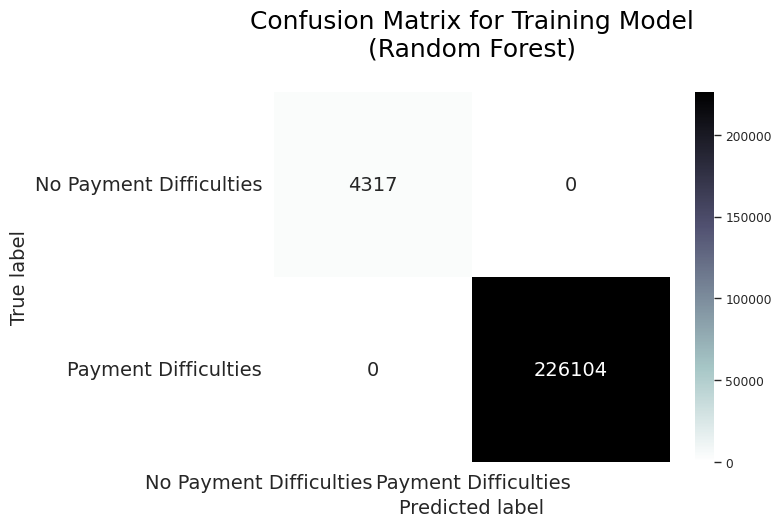

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.58      0.98      0.73      1024
           1       1.00      0.99      0.99     56582

    accuracy                           0.99     57606
   macro avg       0.79      0.99      0.86     57606
weighted avg       0.99      0.99      0.99     57606



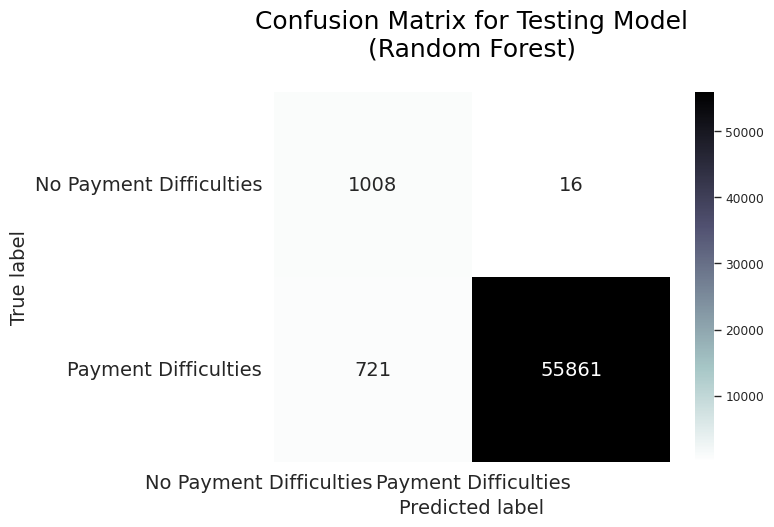

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 98.72


In [ ]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9858


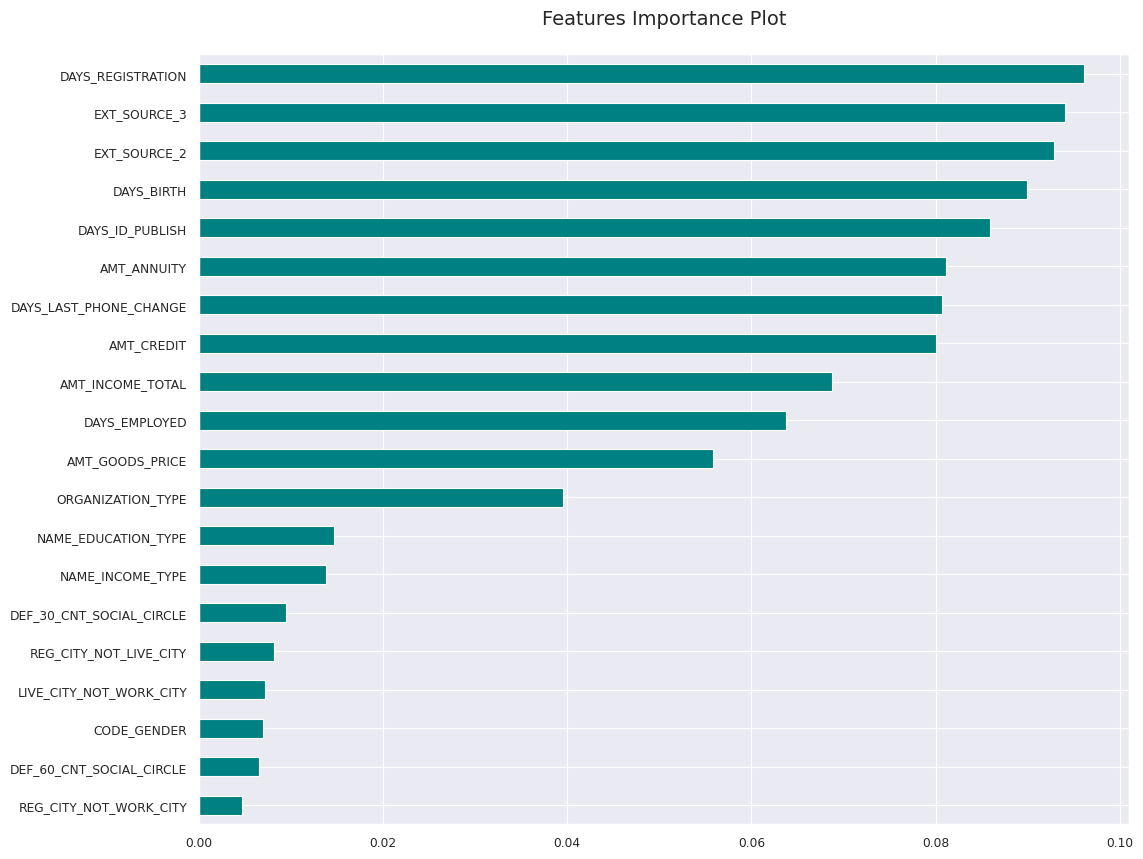

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

# Use seaborn's style setting instead of plt.style.use
sns.set_style('darkgrid')  # Use seaborn's 'darkgrid' style

plt.figure(figsize=(12, 10))
fig = importances_rf.plot(kind='barh', color='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.get_figure().tight_layout()  # Use fig.get_figure() to access the Figure object
fig.get_figure().savefig('top feature.png')  # Use fig.get_figure() to access the Figure object

## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # This line imports the KNeighborsClassifier class from sklearn.neighbors module

# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [ ]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      4317
           1       1.00      1.00      1.00    226104

    accuracy                           1.00    230421
   macro avg       1.00      0.92      0.96    230421
weighted avg       1.00      1.00      1.00    230421



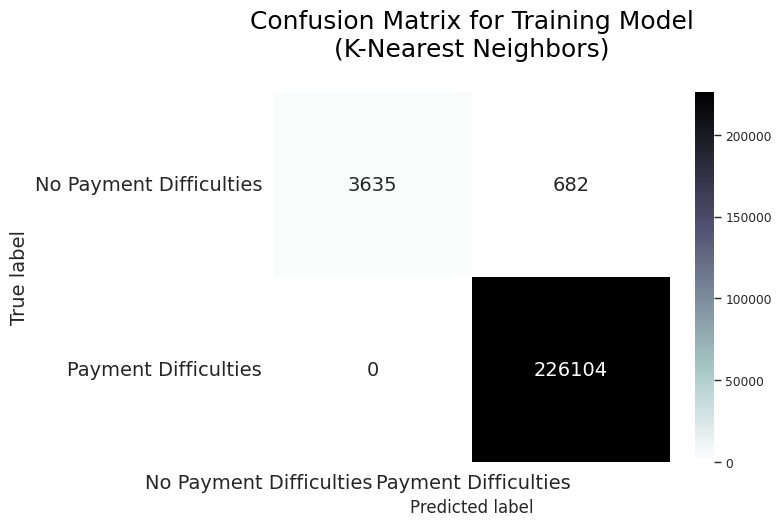

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1024
           1       1.00      1.00      1.00     56582

    accuracy                           1.00     57606
   macro avg       1.00      0.88      0.93     57606
weighted avg       1.00      1.00      1.00     57606



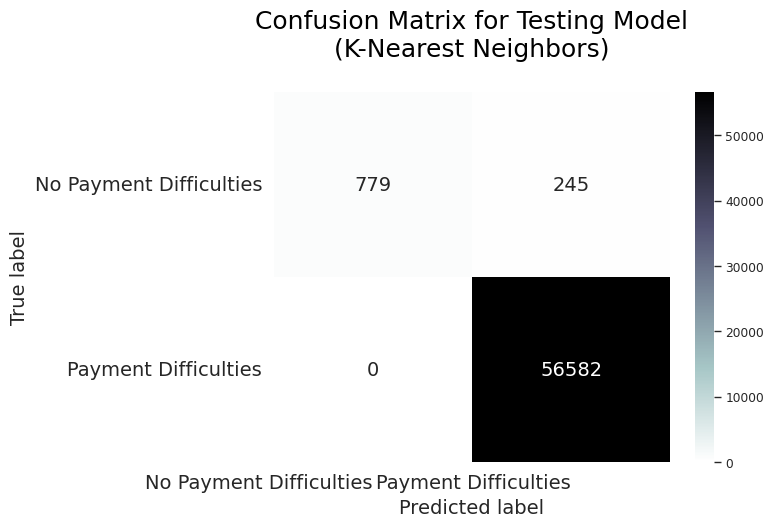

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 99.7
Test Accuracy: % 99.57


In [ ]:
# ROC scores
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.8804


## Neural Network

In [ ]:
!pip install scikit-learn
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier

# train the model
nn_model = MLPClassifier().fit(X_train, y_train)

In [ ]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4317
           1       1.00      1.00      1.00    226104

    accuracy                           1.00    230421
   macro avg       1.00      0.99      0.99    230421
weighted avg       1.00      1.00      1.00    230421



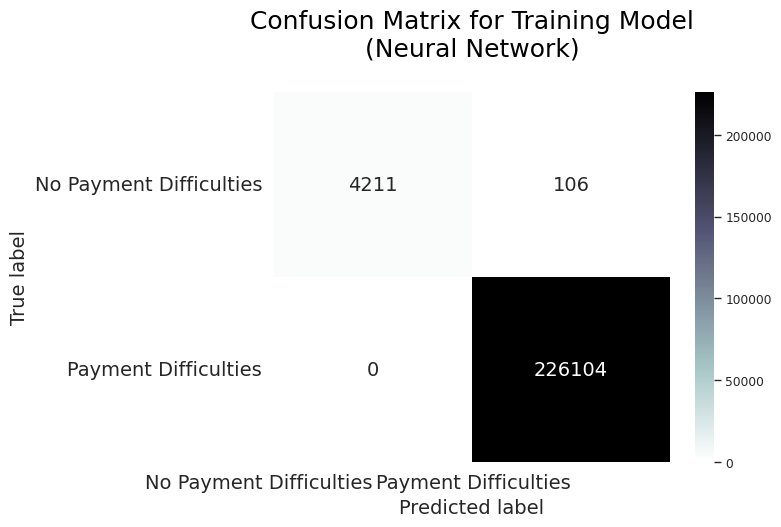

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1024
           1       1.00      1.00      1.00     56582

    accuracy                           1.00     57606
   macro avg       1.00      0.94      0.96     57606
weighted avg       1.00      1.00      1.00     57606



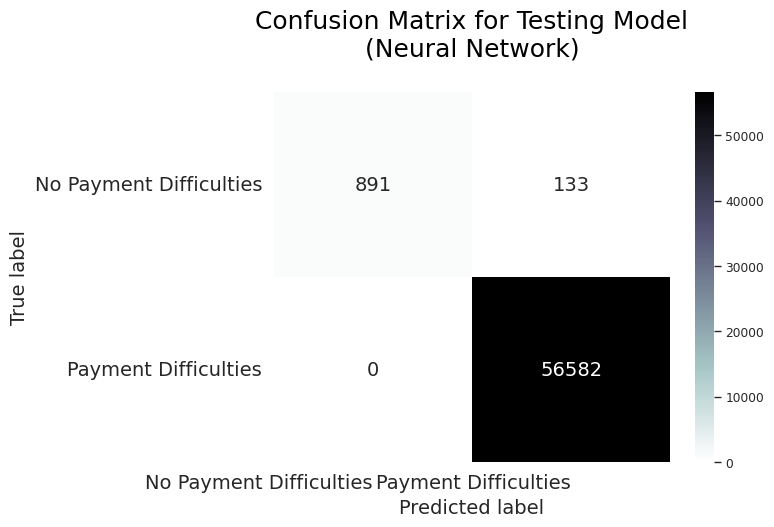

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

Training Accuracy: % 99.95
Test Accuracy: % 99.77


In [ ]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

ROC AUC: 0.9351


# MODEL SELECTION

In [ ]:
results = pd.DataFrame([["Logistic Regression",  0.9813, 0.9822, 0.5],
                       ["Gaussian Naive Bayes", 0.9314, 0.9350, 0.5522],
                       ["Decision Tree", 0.1000, 0.8441, 0.8732],
                       ["Random Forest", 0.1000, 0.9872, 0.9858],
                       ["K-Nearest Neighbor", 0.9970, 0.9970, 0.8804],
                       ["Neural Network", 0.9995, 0.9977, 0.9351]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

In [ ]:
results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

Keakuratan prediksi data train dan test pada model Random Forest mempunyai nilai yang tidak jauh berbeda, dapat dikatakan model sangat baik yaitu tidak terjadi underfitting maupun overfitting. Sehingga model Random Forest dipilih sebagai model terbaik untuk memprediksi kemampuan pembayaran klien.

# PREDICTION

In [ ]:
# data application (test)
df_test = pd.read_csv("application_test.csv", sep=',')
print('This dataset has %d rows dan %d columns.\n' % df_test.shape)
df_test.head()

This dataset has 5792 rows dan 121 columns.



SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...              0.0              0.0              0.0              0.0   
1  ...              0.0              0.0              0.0              0.0   
2  ...              0.0              0.0              0.0              0.0   
3  ...              0.0              0.0              0.0              0.0   
4  ...              0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

# DATA PREPOSECCING

## Detection Dupication

In [ ]:
print('The number of duplication is:', df_test.duplicated().sum())
# there is no duplication

The number of duplication is: 0


## Detection Missing Value

In [ ]:
# check for empty elements
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0     NONLIVINGAPARTMENTS_AVG               3986   68.819061
1    NONLIVINGAPARTMENTS_MODE               3986   68.819061
2    NONLIVINGAPARTMENTS_MEDI               3986   68.819061
3              COMMONAREA_AVG               3980   68.715470
4             COMMONAREA_MODE               3980   68.715470
..                        ...                ...         ...
116       NAME_EDUCATION_TYPE                  0    0.000000
117        NAME_FAMILY_STATUS                  0    0.000000
118         NAME_HOUSING_TYPE                  0    0.000000
119        NAME_CONTRACT_TYPE                  0    0.000000
120                SK_ID_CURR                  0    0.000000

[121 rows x 3 columns]

In [ ]:
# drop features that have large number of missing values (± 50%)
df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)
df_test.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [ ]:
# after drop some features
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: True


index  Total Null Values  Percentage
0              OCCUPATION_TYPE               1848   31.906077
1                 EXT_SOURCE_3               1037   17.904006
2   AMT_REQ_CREDIT_BUREAU_YEAR                722   12.465470
3    AMT_REQ_CREDIT_BUREAU_QRT                722   12.465470
4    AMT_REQ_CREDIT_BUREAU_MON                722   12.465470
..                         ...                ...         ...
67            NAME_INCOME_TYPE                  0    0.000000
68         NAME_EDUCATION_TYPE                  0    0.000000
69           NAME_HOUSING_TYPE                  0    0.000000
70          NAME_CONTRACT_TYPE                  0    0.000000
71                  SK_ID_CURR                  0    0.000000

[72 rows x 3 columns]

In [ ]:
# impute missing values with median because the data is skewed for numerical features
# impute missing values with mode for categorical features

category_columns = df_test.select_dtypes(include=['object']).columns.tolist()
integer_columns = df_test.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test:
    if df_test[column].isnull().any():
        if(column in category_columns):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [ ]:
# after imputation
print('Missing values status:', df_test.isnull().values.any())
tvc = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/df_test.shape[0])*100
tvc.sort_values(by=['Percentage'], ascending=False).reset_index()

Missing values status: False


index  Total Null Values  Percentage
0                   SK_ID_CURR                  0         0.0
1           NAME_CONTRACT_TYPE                  0         0.0
2              FLAG_DOCUMENT_8                  0         0.0
3              FLAG_DOCUMENT_7                  0         0.0
4              FLAG_DOCUMENT_6                  0         0.0
..                         ...                ...         ...
67            FLAG_CONT_MOBILE                  0         0.0
68             FLAG_WORK_PHONE                  0         0.0
69              FLAG_EMP_PHONE                  0         0.0
70                  FLAG_MOBIL                  0         0.0
71  AMT_REQ_CREDIT_BUREAU_YEAR                  0         0.0

[72 rows x 3 columns]

## Label Encoding

In [ ]:
# label encoder for object features
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [ ]:
df_test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0            0             0                1   
1      100005                   0            1             0                1   
2      100013                   0            1             1                1   
3      100028                   0            0             0                1   
4      100038                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...               0.0               0.0               0.0   
1  ...               0.0               0.0               0.0   
2  ...               0.0               0.0               0.0   
3  ...               0.0               0.0               0.0   
4  ...               0.0               0.0               0.0   

   FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0               0.0                         0.0                        0.0   
1               0.0                         0.0                        0.0   
2               0.0                         0.0                        0.0   
3               0.0                         0.0                        0.0   
4               0.0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        0.0                         2.0  

[5 rows x 72 columns]

## Convert Negative Values to Positive Values
The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, and DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE

In [ ]:
df_test.iloc[:,16:20] = df_test.iloc[:,16:20].abs()
df_test.iloc[:,45] = df_test.iloc[:,45].abs()

# Prediction
Memprediksi kemampuan pembayaran klien pada pengujian data aplikasi dengan model pembelajaran mesin terbaik yang diperoleh sebelumnya, yaitu Random Forest.

In [ ]:
pred_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

DAYS_EMPLOYED  AMT_GOODS_PRICE  AMT_CREDIT  DAYS_BIRTH  AMT_INCOME_TOTAL  \
0         2329.0         450000.0    568800.0     19241.0          135000.0   
1         4469.0         180000.0    222768.0     18064.0           99000.0   
2         4458.0         630000.0    663264.0     20038.0          202500.0   
3         1866.0        1575000.0   1575000.0     13976.0          315000.0   
4         2191.0         625500.0    625500.0     13040.0          180000.0   

   DAYS_REGISTRATION  DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  AMT_ANNUITY  \
0             5170.0                  1740.0            812.0      20560.5   
1             9118.0                     0.0           1623.0      17370.0   
2             2175.0                   856.0           3503.0      69777.0   
3             2000.0                  1805.0           4208.0      49018.5   
4             4000.0                   821.0           4262.0      32067.0   

   ORGANIZATION_TYPE  NAME_INCOME_TYPE  REG_CITY_NOT_WORK_CITY  CODE_GENDER  \
0                 28                 4                     0.0            0   
1                 42                 4                     0.0            1   
2                 53                 4                     0.0            1   
3                  5                 4                     0.0            0   
4                  5                 4                     1.0            1   

   EXT_SOURCE_2  REG_CITY_NOT_LIVE_CITY  NAME_EDUCATION_TYPE  \
0      0.789654                     0.0                    1   
1      0.291656                     0.0                    4   
2      0.699787                     0.0                    1   
3      0.509677                     0.0                    4   
4      0.425687                     0.0                    4   

   DEF_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_3  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       0.0      0.159520                       0.0   
1                       0.0      0.432962                       0.0   
2                       0.0      0.610991                       0.0   
3                       0.0      0.612704                       0.0   
4                       0.0      0.513694                       0.0   

   LIVE_CITY_NOT_WORK_CITY  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      1.0

In [ ]:
# lets predict!
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


SK_ID_CURR  TARGET
0      100001       0
1      100005       0
2      100013       0
3      100028       0
4      100038       0

from matplotlib import pyplot as plt
_df_0['SK_ID_CURR'].plot(kind='hist', bins=20, title='SK_ID_CURR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SK_ID_CURR']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SK_ID_CURR'}, axis=1)
              .sort_values('SK_ID_CURR', ascending=True))
  xs = counted['SK_ID_CURR']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('SK_ID_CURR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_CURR')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TARGET']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TARGET'}, axis=1)
              .sort_values('TARGET', ascending=True))
  xs = counted['TARGET']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('TARGET', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TARGET')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['SK_ID_CURR'].plot(kind='line', figsize=(8, 4), title='SK_ID_CURR')
plt.gca().spines[['top', 'right']].set_visible(False)

# BUSINESS ACUMAN

Rekomendasi :
Buat kampanye agar lebih banyak pelajar, akuntan, staf teknologi berketerampilan tinggi, manajer tertarik untuk mengajukan pinjaman
Perlu analisa lebih lanjut, Anda bisa melakukan survei untuk mengetahui apakah ada masalah jika klien yang sedang cuti hamil atau menganggur mengambil kontrak pinjaman tunai. Jadi, kedepannya jika ada klien dengan pendapatan seperti itu, Anda bisa merekomendasikan jenis kontrak yang tepat agar permohonannya disetujui.
Klien yang tidak mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Anda dapat menargetkan klien ini sebagai prioritas Anda.
